In [ ]:
# --------------------------------------------------------------
# 安裝專案所需的所有套件
# --------------------------------------------------------------
# 1. 爬蟲與網頁自動化 (Selenium, BeautifulSoup)
!pip install selenium webdriver-manager beautifulsoup4 requests lxml

# 2. 數據處理與分析 (Pandas, Scikit-learn, Statsmodels)
!pip install pandas numpy scikit-learn statsmodels

# 3. 視覺化圖表 (Matplotlib, Seaborn, Plotly)
!pip install matplotlib seaborn plotly

     ---------------------------------------- 9.7/9.7 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 4.0/4.0 MB 7.4 MB/s eta 0:00:00
     ------------------------------------- 512.0/512.0 kB 10.7 MB/s eta 0:00:00
     -------------------------------------- 159.4/159.4 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 131.2/131.2 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 44.6/44.6 kB ? eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: certifi
 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
httpcore 1.0.7 requires h11<0.15,>=0.13, but you have h11 0.16.0 which is incompatible.

[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 11.3/11.3 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 9.6/9.6 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 8.0 MB/s eta 0:00:00
     -------------------------------------- 348.5/348.5 kB 7.2 MB/s eta 0:00:00
     -------------------------------------- 309.1/309.1 kB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 41.3/41.3 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 233.3/233.3 kB 7.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 5.8 MB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 8.3 MB/s eta 0:00:00
     ------------------------------------- 221.2/221.2 kB 13.2 MB/s eta 0:00:00
     -------------------------------------- 121.8/121.8 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 73.7/73.7 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 9.0 MB/s eta 0:00:00
     -------------------------------------- 430.8/430.8 kB 9.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install --upgrade typing_extensions


[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
# [關鍵] 解決 Windows 下 KMeans 的記憶體洩漏警告
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# 爬蟲相關
from selenium import webdriver
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from io import StringIO

# 分析相關
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm

# 設定
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 讓圖表能顯示中文
plt.rcParams['axes.unicode_minus'] = False

## 使用selenium以及BeautifulSoup抓取網球男單世界排名前100數據

In [ ]:
# -----------------------------
# 0. 補齊必要的 Import
# -----------------------------
import time # 用於暫停
import tempfile
from io import StringIO # 用於 pd.read_html
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# -----------------------------
# 1️. 設定 Chrome options (本地端修正版)
# -----------------------------
chrome_options = ChromeOptions()

# [修改 1] 移除 Linux 專用路徑 (本地端會自動抓)
# CHROME_BIN_PATH = "/usr/bin/chromium-browser"  <-- 這一行在 Windows 會報錯，刪除
# chrome_options.binary_location = CHROME_BIN_PATH <-- 刪除

# [修改 2] 關閉 Headless，讓視窗跳出來給你看！
# chrome_options.add_argument("--headless=new")
chrome_options.add_argument("--start-maximized") # 最大化視窗，方便操作

# [保留] 這些參數在本地端通常沒壞處，保留您的設定
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-browser-side-navigation")

# [新增] 簡單的偽裝，避免一開始就被擋
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option("useAutomationExtension", False)

# -----------------------------
# 2️. 啟動 WebDriver
# -----------------------------
all_dfs = []
urls = [
    "https://www.tennisabstract.com/cgi-bin/leaders.cgi",
    "https://www.tennisabstract.com/cgi-bin/leaders.cgi?players=51-100"
    # 先測試一個網址就好，成功再打開第二個
]

driver = None
try:
    print("🚀 正在啟動 WebDriver... 請注意您的工作列！")

    # 使用 webdriver-manager 自動下載並管理 ChromeDriver
    service = ChromeService(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    wait = WebDriverWait(driver, 20) # 稍微延長等待時間

    for url in urls:
        print(f"正在抓取網頁：{url}")
        driver.get(url)

        # ==========================================
        # 🚨 [修改 3] 人類介入時間 🚨
        # ==========================================
        print(">>> 請看彈出的視窗！如果有 Cloudflare 驗證(打勾)，請在 10 秒內手動點擊！ <<<")
        time.sleep(10)
        # ==========================================

        print("程式繼續執行...")
        wait.until(EC.presence_of_element_located((By.TAG_NAME, 'table')))
        print("表格已成功載入！")

        html = driver.page_source
        soup = BeautifulSoup(html, "lxml")
        table = soup.find("table", id="matches")

        if table:
            df = pd.read_html(StringIO(str(table)))[0]
            if 'Player' in df.columns:
                df = df[df['Player'] != 'Average']
            all_dfs.append(df)
            print(f"數據已成功加入列表 (筆數: {len(df)})")
        else:
            print(f"在網頁 {url} 中找不到表格。")

except Exception as e:
    print(f"爬蟲過程中發生錯誤: \n {e}")
finally:
    if driver:
        driver.quit()
        # 建議先註解掉 quit，這樣如果出錯，視窗還會留著讓你檢查
        print("\n程式結束。")

# -----------------------------
# 3️. 合併數據
# -----------------------------
if all_dfs:
    df_small = pd.concat(all_dfs, ignore_index=True)
    print("\n✅ 數據獲取成功，已合併。")
    print(df_small.head())
else:
    print("❌ 未抓取到任何數據。")

🚀 正在啟動 WebDriver... 請注意您的工作列！
正在抓取網頁：https://www.tennisabstract.com/cgi-bin/leaders.cgi
>>> 請看彈出的視窗！如果有 Cloudflare 驗證(打勾)，請在 15 秒內手動點擊！ <<<
程式繼續執行...
表格已成功載入！
數據已成功加入列表 (筆數: 50)
正在抓取網頁：https://www.tennisabstract.com/cgi-bin/leaders.cgi?players=51-100
>>> 請看彈出的視窗！如果有 Cloudflare 驗證(打勾)，請在 15 秒內手動點擊！ <<<
程式繼續執行...
表格已成功載入！
數據已成功加入列表 (筆數: 50)

程式結束。

✅ 數據獲取成功，已合併。
    Rk                       Player     M  M W-L   M W%    SPW SPW-InP   Aces  \
0  1.0         Carlos Alcaraz [ESP]  80.0   71-9  88.8%  67.9%   67.9%  463.0   
1  2.0          Jannik Sinner [ITA]  64.0   58-6  90.6%  71.7%   70.5%  405.0   
2  3.0       Alexander Zverev [GER]  82.0  57-25  69.5%  68.1%   66.6%  577.0   
3  4.0         Novak Djokovic [SRB]  50.0  39-11  78.0%  69.7%   68.2%  413.0   
4  5.0  Felix Auger Aliassime [CAN]  74.0  50-24  67.6%  68.4%   66.7%  783.0   

    Ace%    DFs   DF%  DF/2s  1stIn   1st%   2nd% 2%-InP   Hld%  Pts/SG  \
0   7.4%  219.0  3.5%   9.8%  64.3%  74.0%  56.8%  63.0%  87.6%     6.1   


In [ ]:
df_small

Rk                       Player     M  M W-L   M W%    SPW SPW-InP  \
0     1.0         Carlos Alcaraz [ESP]  80.0   71-9  88.8%  67.9%   67.9%   
1     2.0          Jannik Sinner [ITA]  64.0   58-6  90.6%  71.7%   70.5%   
2     3.0       Alexander Zverev [GER]  82.0  57-25  69.5%  68.1%   66.6%   
3     4.0         Novak Djokovic [SRB]  50.0  39-11  78.0%  69.7%   68.2%   
4     5.0  Felix Auger Aliassime [CAN]  74.0  50-24  67.6%  68.4%   66.7%   
..    ...                          ...   ...    ...    ...    ...     ...   
95   96.0        Dalibor Svrcina [CZE]   8.0    4-4  50.0%  56.1%   57.9%   
96   97.0            Hugo Gaston [FRA]  26.0   8-18  30.8%  58.1%   58.7%   
97   98.0            Laslo Djere [SRB]  26.0  13-13  50.0%  65.4%   65.6%   
98   99.0     Tristan Schoolkate [AUS]  15.0    6-9  40.0%  64.5%   63.8%   
99  100.0     Shintaro Mochizuki [JPN]  10.0    4-6  40.0%  59.5%   60.2%   

     Aces   Ace%    DFs   DF%  DF/2s  1stIn   1st%   2nd% 2%-InP   Hld%  \
0   463.0   7.4%  219.0  3.5%   9.8%  64.3%  74.0%  56.8%  63.0%  87.6%   
1   405.0   8.9%   91.0  2.0%   5.3%  62.0%  79.4%  59.1%  62.3%  92.0%   
2   577.0   9.8%  152.0  2.6%   9.2%  72.1%  73.8%  53.5%  59.0%  86.5%   
3   413.0  10.3%  102.0  2.5%   7.6%  66.6%  76.7%  55.7%  60.3%  88.7%   
4   783.0  13.4%  234.0  4.0%  12.1%  67.0%  76.5%  52.1%  59.3%  85.8%   
..    ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
95    3.0   0.7%   15.0  3.7%  10.1%  63.7%  60.2%  49.0%  54.5%  63.6%   
96   63.0   3.2%   66.0  3.4%   7.8%  57.0%  66.2%  47.2%  51.2%  67.8%   
97  134.0   6.7%   74.0  3.7%   9.6%  61.4%  73.4%  52.7%  58.3%  82.9%   
98  147.0  11.4%   68.0  5.3%  12.8%  58.7%  75.9%  48.4%  55.5%  80.2%   
99   46.0   5.6%   40.0  4.9%  10.0%  51.5%  71.2%  47.1%  52.4%  70.3%   

    Pts/SG  PtsL/SG  
0      6.1      2.0  
1      5.9      1.7  
2      6.1      1.9  
3      6.0      1.8  
4      6.1      1.9  
..     ...      ...  
95     6.2      2.7  
96     6.6      2.8  
97     6.4      2.2  
98     6.5      2.3  
99     6.4      2.6  

[100 rows x 19 columns]

In [ ]:
#整理數據中有%的資料，留下純浮點數(資料表示為"多少%")

df = df_small.copy()
#資料處理的階段紀錄點

percent_cols = ['M W%', 'SPW', 'SPW-InP', 'Ace%', 'DF%', 'DF/2s', '1stIn', '1st%', '2nd%', '2%-InP', 'Hld%']
for col in percent_cols:
    df[col] = df[col].str.replace('%', '').astype(float)

#資料處理的階段紀錄點
df_s = df.copy()
df_s

Rk                       Player     M  M W-L  M W%   SPW  SPW-InP  \
0     1.0         Carlos Alcaraz [ESP]  80.0   71-9  88.8  67.9     67.9   
1     2.0          Jannik Sinner [ITA]  64.0   58-6  90.6  71.7     70.5   
2     3.0       Alexander Zverev [GER]  82.0  57-25  69.5  68.1     66.6   
3     4.0         Novak Djokovic [SRB]  50.0  39-11  78.0  69.7     68.2   
4     5.0  Felix Auger Aliassime [CAN]  74.0  50-24  67.6  68.4     66.7   
..    ...                          ...   ...    ...   ...   ...      ...   
95   96.0        Dalibor Svrcina [CZE]   8.0    4-4  50.0  56.1     57.9   
96   97.0            Hugo Gaston [FRA]  26.0   8-18  30.8  58.1     58.7   
97   98.0            Laslo Djere [SRB]  26.0  13-13  50.0  65.4     65.6   
98   99.0     Tristan Schoolkate [AUS]  15.0    6-9  40.0  64.5     63.8   
99  100.0     Shintaro Mochizuki [JPN]  10.0    4-6  40.0  59.5     60.2   

     Aces  Ace%    DFs  DF%  DF/2s  1stIn  1st%  2nd%  2%-InP  Hld%  Pts/SG  \
0   463.0   7.4  219.0  3.5    9.8   64.3  74.0  56.8    63.0  87.6     6.1   
1   405.0   8.9   91.0  2.0    5.3   62.0  79.4  59.1    62.3  92.0     5.9   
2   577.0   9.8  152.0  2.6    9.2   72.1  73.8  53.5    59.0  86.5     6.1   
3   413.0  10.3  102.0  2.5    7.6   66.6  76.7  55.7    60.3  88.7     6.0   
4   783.0  13.4  234.0  4.0   12.1   67.0  76.5  52.1    59.3  85.8     6.1   
..    ...   ...    ...  ...    ...    ...   ...   ...     ...   ...     ...   
95    3.0   0.7   15.0  3.7   10.1   63.7  60.2  49.0    54.5  63.6     6.2   
96   63.0   3.2   66.0  3.4    7.8   57.0  66.2  47.2    51.2  67.8     6.6   
97  134.0   6.7   74.0  3.7    9.6   61.4  73.4  52.7    58.3  82.9     6.4   
98  147.0  11.4   68.0  5.3   12.8   58.7  75.9  48.4    55.5  80.2     6.5   
99   46.0   5.6   40.0  4.9   10.0   51.5  71.2  47.1    52.4  70.3     6.4   

    PtsL/SG  
0       2.0  
1       1.7  
2       1.9  
3       1.8  
4       1.9  
..      ...  
95      2.7  
96      2.8  
97      2.2  
98      2.3  
99      2.6  

[100 rows x 19 columns]

## 更大的夢想: 合併其他頁面的資料

In [ ]:
import pandas as pd
import time
from datetime import datetime
from io import StringIO
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# -----------------------------
# 1️. 設定 Chrome options (本地端 + 視窗模式)
# -----------------------------
chrome_options = ChromeOptions()
chrome_options.add_argument("--window-size=1000,800") # 設定固定大小 (寬1000, 高800)
# 偽裝參數
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option("useAutomationExtension", False)

# -----------------------------
# 2️. 定義要點擊的按鈕和頁面參數
# -----------------------------
stat_buttons = {
    'Serve': 'statso',
    'Return': 'statsw',
    'Breaks': 'statsl',
    'More': 'statst'
}
# 包含第一頁(前50名) 和 第二頁(51-100名)
page_parameters = ['', '?players=51-100']

raw_data_dict = {stat: [] for stat in stat_buttons.keys()}
driver = None

def get_table_with_retry(driver, url, stat_class, max_retries=3):
    """
    結合人工介入與自動重試的爬取函數
    """
    for retry in range(max_retries):
        try:
            print(f"   -> 正在載入網頁 (嘗試 {retry+1}/{max_retries})...")
            driver.get(url)

            # ==========================================
            # 🚨 人類介入區 (Human-in-the-loop) 🚨
            # ==========================================
            # 第一次載入給比較長的時間，後續短一點
            sleep_time = 10 if retry == 0 else 5
            print(f"   >>> [請看視窗] 如果有 Cloudflare 驗證，請在 {sleep_time} 秒內點擊！ <<<")
            time.sleep(sleep_time)
            # ==========================================

            wait = WebDriverWait(driver, 15)

            # 點擊對應的統計數據按鈕 (例如切換到 Return)
            try:
                button_element = wait.until(
                    EC.element_to_be_clickable((By.CLASS_NAME, stat_class))
                )
                button_element.click()
                time.sleep(2) # 等待數據切換刷新
            except Exception as e:
                print(f"   ⚠️ 點擊按鈕 {stat_class} 遇到小問題 (可能已在該頁面): {e}")

            # 等待表格出現
            wait.until(EC.presence_of_element_located((By.XPATH, "//table[@id='matches']//td[1]")))

            html = driver.page_source
            soup = BeautifulSoup(html, "lxml")
            table = soup.find("table", id="matches")

            if table:
                df = pd.read_html(StringIO(str(table)))[0]
                return df
            else:
                print(f"   ❌ 在 {url} 上找不到表格。")
                return None

        except Exception as e:
            print(f"   ❌ 嘗試失敗。錯誤: {e}")
            if retry < max_retries - 1:
                print("   ...等待 5 秒後重試...")
                time.sleep(5)
            else:
                print("   ⛔ 達到最大重試次數，放棄此頁面。")
                return None

# -----------------------------
# 3. 啟動 WebDriver 並執行主迴圈
# -----------------------------
try:
    print("🚀 正在啟動瀏覽器... 請留意您的工作列！")
    service = ChromeService(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    print("✅ 瀏覽器已啟動。")

    for stat_name, stat_class in stat_buttons.items():
        print(f"\n📊 正在處理類別：【 {stat_name} 】")

        for page_param in page_parameters:
            url = f"https://www.tennisabstract.com/cgi-bin/leaders.cgi{page_param}"

            # 執行爬取
            df = get_table_with_retry(driver, url, stat_class)

            if df is not None:
                # 簡單過濾垃圾列
                if 'Player' in df.columns:
                    df = df[df['Player'] != 'Average']

                raw_data_dict[stat_name].append(df)
                print(f"   ✅ 成功抓取數據 (筆數: {len(df)})")
            else:
                print(f"   ⚠️ 警告：本頁面抓取失敗")

except Exception as e:
    print(f"❌ 爬蟲過程中發生嚴重錯誤: {e}")
finally:
    # 執行完畢後不要馬上關閉，方便檢查，若確認沒問題可取消註解
    if driver: driver.quit()
    print("\n🏁 爬取階段結束。")

# -----------------------------
# 4️. 數據清理與水平合併
# -----------------------------
print("\n🔄 開始合併數據...")
final_df = None

for stat_name, df_list in raw_data_dict.items():
    if not df_list:
        print(f"⚠️ 警告：未抓取到 {stat_name} 數據，跳過此類別。")
        continue

    # 1. 垂直合併 (Page 1 + Page 2)
    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df = combined_df[combined_df['Player'] != 'Average'].copy()

    # 2. 水平合併 (Serve + Return + ...)
    if final_df is None:
        final_df = combined_df
    else:
        # 移除重複的欄位，只保留 Player 作為 Key
        duplicates = [col for col in combined_df.columns if col in final_df.columns and col != 'Player']
        if duplicates:
            combined_df.drop(columns=duplicates, inplace=True)

        # 進行水平合併
        final_df = pd.merge(final_df, combined_df, on='Player', how='left')

# -----------------------------
# 5️. 最終存檔
# -----------------------------
if final_df is not None and not final_df.empty:
    # 根據 'Player' 欄位去除重複
    final_df.drop_duplicates(subset=['Player'], keep='first', inplace=True)

    # 嘗試將 Rk 轉為數字並排序
    if 'Rk' in final_df.columns:
        final_df['Rk'] = pd.to_numeric(final_df['Rk'], errors='coerce')
        final_df.sort_values(by='Rk', inplace=True)

    print("\n============== 最終結果預覽 ==============")
    print(final_df.head())
    print(f"\n總資料筆數: {len(final_df)}")

    today_str = datetime.now().strftime('%Y%m%d')
    filename = f'../data/ennis_full_stats_final_{today_str}.csv'

    # 存檔
    final_df.to_csv(filename, index=False, encoding="utf-8-sig")
    print("\n💾 已成功儲存為 'tennis_full_stats_final.csv'")
else:
    print("\n❌ 未抓取到任何數據，無法合併。")

🚀 正在啟動瀏覽器... 請留意您的工作列！
✅ 瀏覽器已啟動。

📊 正在處理類別：【 Serve 】
   -> 正在載入網頁 (嘗試 1/3)...
   ❌ 嘗試失敗。錯誤: Message: unknown error: net::ERR_CONNECTION_RESET
  (Session info: chrome=143.0.7499.170)
Stacktrace:
Symbols not available. Dumping unresolved backtrace:
	0xc212d3
	0xc21314
	0xa0e6dd
	0xa0bc86
	0x9fef92
	0xa0094a
	0x9ff435
	0x9fed71
	0x9fea85
	0x9fc94f
	0x9fd31a
	0xa12451
	0xa9e704
	0xa7b4ec
	0xa9db13
	0xa7b2e6
	0xa4d321
	0xa4e1d4
	0xe75314
	0xe708cb
	0xe8d1aa
	0xc3b1d8
	0xc431dd
	0xc295d8
	0xc29799
	0xc13b28
	0x767a5d49
	0x7791d5db
	0x7791d561

   ...等待 5 秒後重試...
   -> 正在載入網頁 (嘗試 2/3)...
   >>> [請看視窗] 如果有 Cloudflare 驗證，請在 5 秒內點擊！ <<<
   ✅ 成功抓取數據 (筆數: 50)
   -> 正在載入網頁 (嘗試 1/3)...
   >>> [請看視窗] 如果有 Cloudflare 驗證，請在 10 秒內點擊！ <<<
   ✅ 成功抓取數據 (筆數: 50)

📊 正在處理類別：【 Return 】
   -> 正在載入網頁 (嘗試 1/3)...
   >>> [請看視窗] 如果有 Cloudflare 驗證，請在 10 秒內點擊！ <<<
   ✅ 成功抓取數據 (筆數: 50)
   -> 正在載入網頁 (嘗試 1/3)...
   >>> [請看視窗] 如果有 Cloudflare 驗證，請在 10 秒內點擊！ <<<
   ✅ 成功抓取數據 (筆數: 50)

📊 正在處理類別：【 Breaks 】
   -> 正在載入網頁 (嘗試 1/3

In [ ]:
df_large = final_df.copy()
df_large

Rk                       Player     M  M W-L   M W%    SPW SPW-InP  \
0     1.0         Carlos Alcaraz [ESP]  80.0   71-9  88.8%  67.9%   67.9%   
1     2.0          Jannik Sinner [ITA]  64.0   58-6  90.6%  71.7%   70.5%   
2     3.0       Alexander Zverev [GER]  82.0  57-25  69.5%  68.1%   66.6%   
3     4.0         Novak Djokovic [SRB]  50.0  39-11  78.0%  69.7%   68.2%   
4     5.0  Felix Auger Aliassime [CAN]  74.0  50-24  67.6%  68.4%   66.7%   
..    ...                          ...   ...    ...    ...    ...     ...   
95   96.0        Dalibor Svrcina [CZE]   8.0    4-4  50.0%  56.1%   57.9%   
96   97.0            Hugo Gaston [FRA]  26.0   8-18  30.8%  58.1%   58.7%   
97   98.0            Laslo Djere [SRB]  26.0  13-13  50.0%  65.4%   65.6%   
98   99.0     Tristan Schoolkate [AUS]  15.0    6-9  40.0%  64.5%   63.8%   
99  100.0     Shintaro Mochizuki [JPN]  10.0    4-6  40.0%  59.5%   60.2%   

     Aces   Ace%    DFs  ...   TB/S   Sets Set W-L   S W%     Gms  Game W-L  \
0   463.0   7.4%  219.0  ...  12.0%  217.0  170-47  78.3%  2029.0  1215-814   
1   405.0   8.9%   91.0  ...  11.3%  168.0  144-24  85.7%  1531.0   958-573   
2   577.0   9.8%  152.0  ...  22.4%  205.0  137-68  66.8%  1940.0  1051-889   
3   413.0  10.3%  102.0  ...  17.4%  138.0   99-39  71.7%  1319.0   764-555   
4   783.0  13.4%  234.0  ...  24.0%  192.0  118-74  61.5%  1911.0   997-914   
..    ...    ...    ...  ...    ...    ...     ...    ...     ...       ...   
95    3.0   0.7%   15.0  ...   6.7%   15.0     7-8  46.7%   133.0     61-72   
96   63.0   3.2%   66.0  ...   4.5%   67.0   25-42  37.3%   595.0   269-326   
97  134.0   6.7%   74.0  ...  22.7%   66.0   33-33  50.0%   626.0   321-305   
98  147.0  11.4%   68.0  ...  19.0%   42.0   17-25  40.5%   395.0   182-213   
99   46.0   5.6%   40.0  ...   6.7%   30.0   14-16  46.7%   259.0   124-135   

     G W%  Time/Mt  Min/Set Sec/Pt  
0   59.9%     1:48     39.9   40.1  
1   62.6%     1:45     40.0   42.0  
2   54.2%     1:49     43.6   43.7  
3   57.9%     1:52     40.5   40.7  
4   52.2%     2:04     47.9   45.2  
..    ...      ...      ...    ...  
95  45.9%     1:15     39.8   43.4  
96  45.2%     1:35     36.9   38.9  
97  51.3%     1:48     42.4   41.6  
98  46.1%     1:54     40.5   40.3  
99  47.9%     1:50     36.5   39.7  

[100 rows x 62 columns]

#欄位說明
---
## 選手基本資訊
* **Rk** (Rank): 選手的排名。
* **Player**: 選手姓名及國籍。
* **M** (Matches): 總比賽場數。
* **M W-L** (Match Win-Loss): 總比賽勝負紀錄。
* **M W%** (Match Win Percentage): 總比賽勝率。

---
## 發球數據 (Serve)
* **SPW** (Serve Points Won): 發球得分率。
* **SPW-InP** (Serve Points Won - In Play): 發球得分率（不含 Aces 和 Double Faults）。
* **Aces**: 發球直接得分數（對手無法觸及球）。
* **Ace%**: 發球直接得分率。
* **DFs** (Double Faults): 雙發失誤數。
* **DF%**: 雙發失誤率。
* **1st** (First Serve Percentage): 一發進球率。
* **1stW%** (First Serve Points Won Percentage): 一發得分率。
* **2ndW%** (Second Serve Points Won Percentage): 二發得分率。

---
## 接發球數據 (Return)
* **RPW** (Return Points Won): 接發球得分率。
* **RPW-InP** (Return Points Won - In Play): 接發球得分率（不含對手的 Aces 和 Double Faults）。
* **vAce%** (Opponent Ace Percentage): 對手發球局的 Ace 得分率。
* **vDF%** (Opponent Double Fault Percentage): 對手發球局的雙發失誤率。
* **v1st%** (Opponent First Serve Points Won Percentage): 對手一發的得分率。
* **v2nd%** (Opponent Second Serve Points Won Percentage): 對手二發的得分率。
* **Brk%** (Breaks Converted Percentage): 破發成功率。
* **BrkOpps** (Break Opportunities): 破發點數。
* **BrkSv** (Break Points Saved): 挽救破發點數。
* **BrkSv%** (Break Points Saved Percentage): 挽救破發點率。

---
## 比賽表現數據 (More)
* **Pts/RG** (Points per Return Game): 每場接發球局的得分數。
* **PtsW/RG** (Points Won per Return Game): 每場接發球局的得分率。
* **MdOppRk** (Median Opponent Rank): 對手中位數排名。
* **MnOppRk** (Mean Opponent Rank): 對手平均排名。
* **TB/S** (Tiebreaks per Set): 每盤搶七的發生率。
* **Sets**: 總盤數。
* **Set W-L**: 總盤數勝負紀錄。
* **S W%** (Set Win Percentage): 總盤數勝率。
* **Gms** (Games): 總局數。
* **Game W-L**: 總局數勝負紀錄。
* **G W%** (Game Win Percentage): 總局數勝率。
* **Time/Mt** (Time per Match): 每場比賽的平均時長。
* **Min/Set** (Minutes per Set): 每盤的平均時長。
* **Sec/Pt** (Seconds per Point): 每分的平均時長。

In [ ]:
#整理數據中有%的資料，留下純浮點數(資料表示為"多少%")

df = df_large.copy()
#資料處理的階段紀錄點

df = final_df.copy()
percent_cols = ['M W%', 'SPW', 'SPW-InP', 'Ace%', 'DF%', '1stIn', '1st%', '2nd%', 'RPW', 'RPW-InP', 'vAce%', 'vDF%', 'v1st%', 'v2nd%', 'Brk%', 'BPSvd%', 'TB/S', 'S W%', 'G W%']
for col in percent_cols:
    df[col] = df[col].str.replace('%', '').astype(float)

df['Rk'] = df['Rk'].astype(int)

df_l = df.copy()
#資料處理的階段紀錄點
df_l

Rk                       Player     M  M W-L  M W%   SPW  SPW-InP   Aces  \
0     1         Carlos Alcaraz [ESP]  80.0   71-9  88.8  67.9     67.9  463.0   
1     2          Jannik Sinner [ITA]  64.0   58-6  90.6  71.7     70.5  405.0   
2     3       Alexander Zverev [GER]  82.0  57-25  69.5  68.1     66.6  577.0   
3     4         Novak Djokovic [SRB]  50.0  39-11  78.0  69.7     68.2  413.0   
4     5  Felix Auger Aliassime [CAN]  74.0  50-24  67.6  68.4     66.7  783.0   
..  ...                          ...   ...    ...   ...   ...      ...    ...   
95   96        Dalibor Svrcina [CZE]   8.0    4-4  50.0  56.1     57.9    3.0   
96   97            Hugo Gaston [FRA]  26.0   8-18  30.8  58.1     58.7   63.0   
97   98            Laslo Djere [SRB]  26.0  13-13  50.0  65.4     65.6  134.0   
98   99     Tristan Schoolkate [AUS]  15.0    6-9  40.0  64.5     63.8  147.0   
99  100     Shintaro Mochizuki [JPN]  10.0    4-6  40.0  59.5     60.2   46.0   

    Ace%    DFs  ...  TB/S   Sets  Set W-L  S W%     Gms  Game W-L  G W%  \
0    7.4  219.0  ...  12.0  217.0   170-47  78.3  2029.0  1215-814  59.9   
1    8.9   91.0  ...  11.3  168.0   144-24  85.7  1531.0   958-573  62.6   
2    9.8  152.0  ...  22.4  205.0   137-68  66.8  1940.0  1051-889  54.2   
3   10.3  102.0  ...  17.4  138.0    99-39  71.7  1319.0   764-555  57.9   
4   13.4  234.0  ...  24.0  192.0   118-74  61.5  1911.0   997-914  52.2   
..   ...    ...  ...   ...    ...      ...   ...     ...       ...   ...   
95   0.7   15.0  ...   6.7   15.0      7-8  46.7   133.0     61-72  45.9   
96   3.2   66.0  ...   4.5   67.0    25-42  37.3   595.0   269-326  45.2   
97   6.7   74.0  ...  22.7   66.0    33-33  50.0   626.0   321-305  51.3   
98  11.4   68.0  ...  19.0   42.0    17-25  40.5   395.0   182-213  46.1   
99   5.6   40.0  ...   6.7   30.0    14-16  46.7   259.0   124-135  47.9   

    Time/Mt  Min/Set  Sec/Pt  
0      1:48     39.9    40.1  
1      1:45     40.0    42.0  
2      1:49     43.6    43.7  
3      1:52     40.5    40.7  
4      2:04     47.9    45.2  
..      ...      ...     ...  
95     1:15     39.8    43.4  
96     1:35     36.9    38.9  
97     1:48     42.4    41.6  
98     1:54     40.5    40.3  
99     1:50     36.5    39.7  

[100 rows x 62 columns]

# 讀取資料遇到的困難 / 初步整理
## 1. 資料需要爬蟲，但tennisabstract.com並未提供資料庫
* **解決方法** :
利用selenium模擬瀏覽器，可以處理網頁中的動態內容，以及使用BeautifulSoup從正確的表格標籤中找到資料。
## 2. 每個選手有不同的資料放在網站中有多個不同頁籤，不好合併在一起
* **解決方法** :
利用selenium模擬點擊，進入不同頁籤抓取資料，同時增加自動重試連線，最後將資料合併在同一個dataframe中。
## 3. 初步整理表格中的數據
* **初步整理** :
將數據中帶有"%"的字串，轉為可以分析使用的float



# 資料檢查

In [ ]:
df = df_l.copy()

print("\n--- 遺失值檢驗 ---")
missing_values = df.isnull().sum()
print(missing_values)
print("\n總遺失值數量:", missing_values.sum())

# 印出有遺失值的欄位
missing_cols = missing_values[missing_values > 0]
if not missing_cols.empty:
    print("\n存在遺失值的欄位：")
    print(missing_cols)
else:
    print("\n數據中沒有遺失值！")


--- 遺失值檢驗 ---
Rk          0
Player      0
M           0
M W-L       0
M W%        0
           ..
Game W-L    0
G W%        0
Time/Mt     0
Min/Set     0
Sec/Pt      0
Length: 62, dtype: int64

總遺失值數量: 0

數據中沒有遺失值！


In [ ]:
df = df_l.copy()

print("\n--- 重複值檢驗 ---")
# 檢查是否有完全重複的行
duplicate_rows_count = df.duplicated().sum()
print("總重複行數量:", duplicate_rows_count)

if duplicate_rows_count > 0:
    print("\n以下是重複的行：")
    # 顯示所有重複的行，包括原始行和重複行
    print(final_df[final_df.duplicated(keep=False)])
else:
    print("\n數據中沒有重複行！")


--- 重複值檢驗 ---
總重複行數量: 0

數據中沒有重複行！


In [ ]:
df = df_l.copy()


# 這些欄位包含混合或非數值資料(先進行手動判斷)，不適合進行數值運算，將它們排除
exclude_cols = ['Player', 'M W-L', 'Set W-L', 'Game W-L', 'Time/Mt']
# 找出所有要處理的欄位
cols_to_process = [col for col in df.columns if col not in exclude_cols]

# 檢查欄位，將這些欄位轉換為數值型，以便進行計算
for col in cols_to_process:
    # 處理百分比字串和非數值資料，將其轉換為浮點數
    # errors='coerce' 會將無法轉換的數值變成 NaN
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', ''), errors='coerce')

df.describe()

Rk           M        M W%         SPW     SPW-InP        Aces  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000   43.030000   52.542000   64.331000   63.676000  285.910000   
std     29.011492   17.104819   11.639797    2.822732    2.214695  175.085555   
min      1.000000    8.000000   30.800000   56.100000   57.900000    3.000000   
25%     25.750000   31.750000   43.650000   62.700000   62.400000  153.250000   
50%     50.500000   42.000000   51.250000   64.400000   63.600000  258.000000   
75%     75.250000   56.000000   58.575000   66.000000   65.100000  374.250000   
max    100.000000   82.000000   90.600000   71.700000   70.500000  871.000000   

             Ace%         DFs         DF%      DF/2s  ...         TBs  TB W-L  \
count  100.000000  100.000000  100.000000  100.00000  ...  100.000000     0.0   
mean     8.325000  120.460000    3.656000    9.67800  ...   21.200000     NaN   
std      3.381601   59.332554    1.327359    3.31204  ...   11.295838     NaN   
min      0.700000    8.000000    1.100000    3.80000  ...    1.000000     NaN   
25%      6.075000   78.750000    2.700000    7.57500  ...   13.750000     NaN   
50%      8.400000  115.500000    3.450000    9.20000  ...   21.000000     NaN   
75%     10.600000  152.000000    4.125000   10.72500  ...   27.000000     NaN   
max     19.400000  302.000000    8.500000   24.40000  ...   49.000000     NaN   

            TB W%        TB/S        Sets        S W%          Gms  \
count  100.000000  100.000000  100.000000  100.000000   100.000000   
mean    52.192000   18.429000  111.730000   51.897000  1057.730000   
std     12.944939    6.130093   44.358697    9.124232   430.184406   
min      0.000000    4.500000   15.000000   37.300000   133.000000   
25%     44.100000   15.250000   80.250000   44.475000   730.000000   
50%     52.400000   18.400000  109.000000   50.200000  1040.500000   
75%     60.600000   21.850000  145.250000   56.950000  1376.000000   
max     84.200000   37.800000  217.000000   85.700000  2029.000000   

             G W%     Min/Set      Sec/Pt  
count  100.000000  100.000000  100.000000  
mean    50.379000   40.806000   40.720000  
std      3.052646    3.601313    2.971888  
min     43.200000   30.900000   30.200000  
25%     48.200000   38.375000   39.125000  
50%     50.300000   41.150000   40.300000  
75%     52.125000   42.825000   42.625000  
max     62.600000   48.900000   47.200000  

[8 rows x 57 columns]

In [ ]:
import pandas as pd
from io import StringIO


df = df_l.copy()

# -----------------------------
# 1 自動識別數值型欄位
# -----------------------------
# 這些欄位包含混合或非數值資料(先進行手動判斷)，不適合進行數值運算，將它們排除
exclude_cols = ['Player', 'M W-L', 'Set W-L', 'Game W-L', 'Time/Mt']
# 找出所有要處理的欄位
cols_to_process = [col for col in df.columns if col not in exclude_cols]

# 檢查欄位，將這些欄位轉換為數值型，以便進行計算
for col in cols_to_process:
    # 處理百分比字串和非數值資料，將其轉換為浮點數
    # errors='coerce' 會將無法轉換的數值變成 NaN
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', ''), errors='coerce')

# 自動選取所有真正的數值型欄位
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# -----------------------------
# 2 定義異常值檢測函式 (IQR 方法)
# -----------------------------
def find_outliers_iqr(df, column):
    """使用 IQR 方法尋找特定欄位中的異常值"""
    # 這裡的邏輯與之前相同，但增加了處理 NaN 的機制
    data_for_iqr = df[column].dropna()
    if data_for_iqr.empty:
        return []

    Q1 = data_for_iqr.quantile(0.25)
    Q3 = data_for_iqr.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 找到異常值的索引
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outlier_indices


# -----------------------------
# 3 迴圈檢查所有欄位並列印報告
# -----------------------------
print("--- 所有欄位的異常值報告 ---")
print("以下列出的選手，其數據點被視為異常值。")

total_outliers = 0
for col in numeric_cols:
    outlier_indices = find_outliers_iqr(df, col)

    if len(outlier_indices) > 0:
        total_outliers += len(outlier_indices)
        outliers_df = df.loc[outlier_indices, ['Rk', 'Player', col]]
        print(f"\n>> 欄位: {col}")
        print(outliers_df.to_string())

if total_outliers == 0:
    print("\n沒有發現異常值。")

--- 所有欄位的異常值報告 ---
以下列出的選手，其數據點被視為異常值。

>> 欄位: M W%
   Rk                Player  M W%
0   1  Carlos Alcaraz [ESP]  88.8
1   2   Jannik Sinner [ITA]  90.6

>> 欄位: SPW
    Rk                 Player   SPW
1    2    Jannik Sinner [ITA]  71.7
92  93   Pedro Martinez [ESP]  57.0
95  96  Dalibor Svrcina [CZE]  56.1

>> 欄位: SPW-InP
    Rk                 Player  SPW-InP
1    2    Jannik Sinner [ITA]     70.5
95  96  Dalibor Svrcina [CZE]     57.9

>> 欄位: Aces
    Rk                       Player   Aces
4    5  Felix Auger Aliassime [CAN]  783.0
5    6           Taylor Fritz [USA]  871.0
49  50          Reilly Opelka [USA]  790.0

>> 欄位: Ace%
    Rk               Player  Ace%
49  50  Reilly Opelka [USA]  19.4

>> 欄位: DFs
    Rk                  Player    DFs
10  11  Alexander Bublik [KAZ]  299.0
12  13   Daniil Medvedev [RUS]  277.0
22  23  Denis Shapovalov [CAN]  302.0

>> 欄位: DF%
    Rk                   Player  DF%
10  11   Alexander Bublik [KAZ]  6.6
22  23   Denis Shapovalov [CAN]  8.0
70  

# 描述性資料分析

In [ ]:
# 直接用於繪製描述性分析資料的圖
# 內容包含 KDE直方圖、前#名選手條狀圖、箱型圖

def plot_single_metric_analysis(df, metric_col, percentage=True, num_top_players=20):
    """
    Creates a descriptive analysis plot for a single metric.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        metric_col (str): The name of the column to analyze (e.g., 'Ace%').
        num_top_players (int): The number of top-ranked players to display in the bar chart.
    """
    # -----------------------------
    # 1. Ensure columns are numeric and clean the data
    # -----------------------------
    # Remove '%' sign and convert to numeric, handling missing values
    df[metric_col] = pd.to_numeric(
        df[metric_col].astype(str).str.replace('%', ''),
        errors='coerce'
    )
    df['Rk'] = pd.to_numeric(df['Rk'], errors='coerce')
    df_clean = df.dropna(subset=[metric_col, 'Rk'])

    label_suffix = '(%)' if percentage else ''

    # -----------------------------
    # 2. Create a figure with three subplots
    # -----------------------------
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Descriptive Analysis of {metric_col}', fontsize=20, y=1.05)

    # --- Subplot 1: Histogram and KDE Plot ---
    sns.histplot(df_clean[metric_col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution ({metric_col})', fontsize=14)
    axes[0].set_xlabel(f'{metric_col} {label_suffix}')
    axes[0].set_ylabel('Count')

    # --- Subplot 2: Bar Chart of Top Players ---
    top_players = df_clean.sort_values(by='Rk').head(num_top_players)
    sns.barplot(x='Player', y=metric_col, data=top_players, ax=axes[1])
    axes[1].set_title(f'{metric_col} of Top {num_top_players} Players', fontsize=14)
    axes[1].set_xlabel('Player')
    axes[1].set_ylabel(f'{metric_col} {label_suffix}')
    axes[1].tick_params(axis='x', rotation=90)

    # --- Subplot 3: Box Plot ---
    sns.boxplot(x=metric_col, data=df_clean, ax=axes[2], color='skyblue')
    axes[2].set_title(f'Statistical Summary ({metric_col})', fontsize=14)
    axes[2].set_xlabel(f'{metric_col} {label_suffix}')

    # Adjust subplot layout
    plt.tight_layout()
    plt.show()

In [ ]:
df = df_l.copy()

In [ ]:
df['SPW'].describe()

count    100.000000
mean      64.331000
std        2.822732
min       56.100000
25%       62.700000
50%       64.400000
75%       66.000000
max       71.700000
Name: SPW, dtype: float64

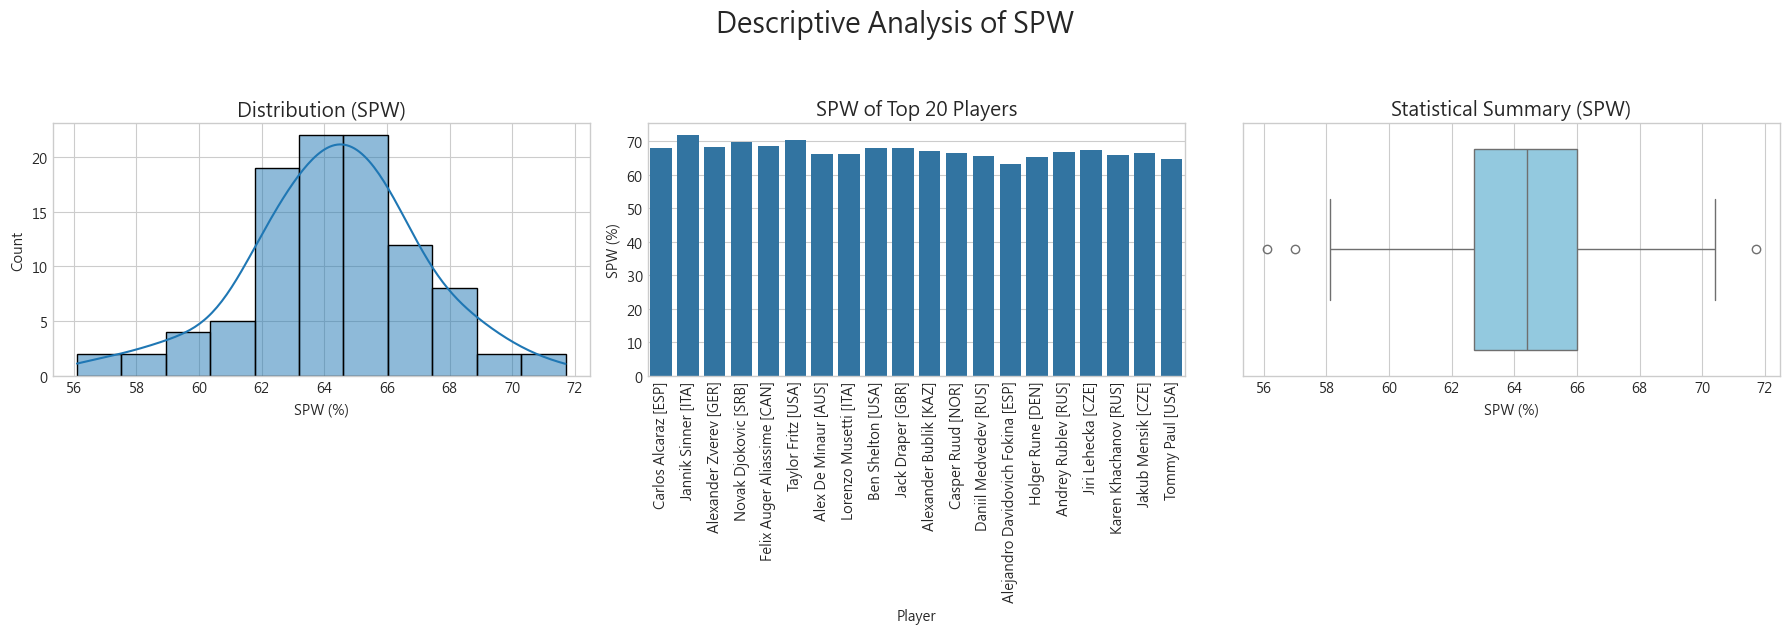

In [ ]:
plot_single_metric_analysis(df, 'SPW')

In [ ]:
df['SPW-InP'].describe()

count    100.000000
mean      63.676000
std        2.214695
min       57.900000
25%       62.400000
50%       63.600000
75%       65.100000
max       70.500000
Name: SPW-InP, dtype: float64

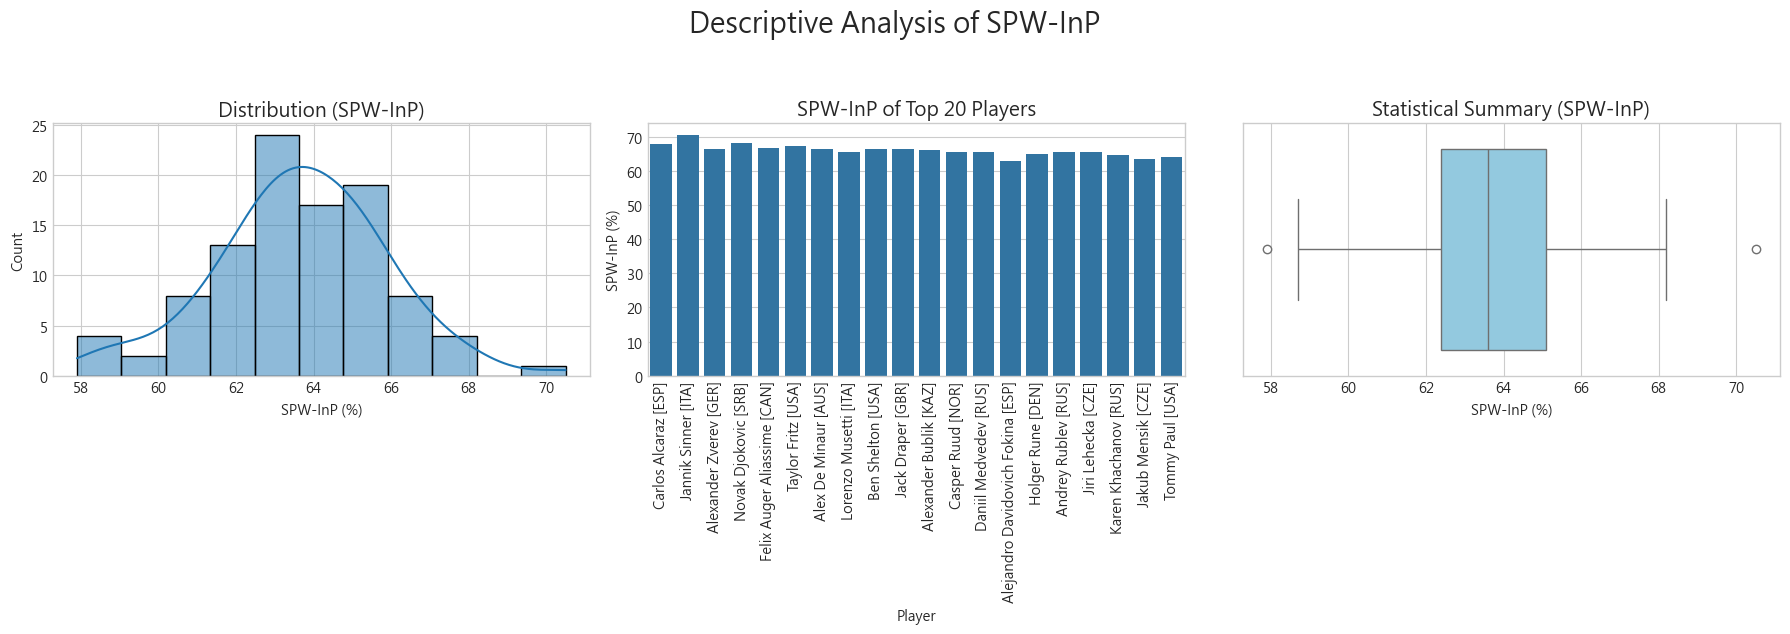

In [ ]:
plot_single_metric_analysis(df, 'SPW-InP')

In [ ]:
df['Ace%'].describe()

count    100.000000
mean       8.325000
std        3.381601
min        0.700000
25%        6.075000
50%        8.400000
75%       10.600000
max       19.400000
Name: Ace%, dtype: float64

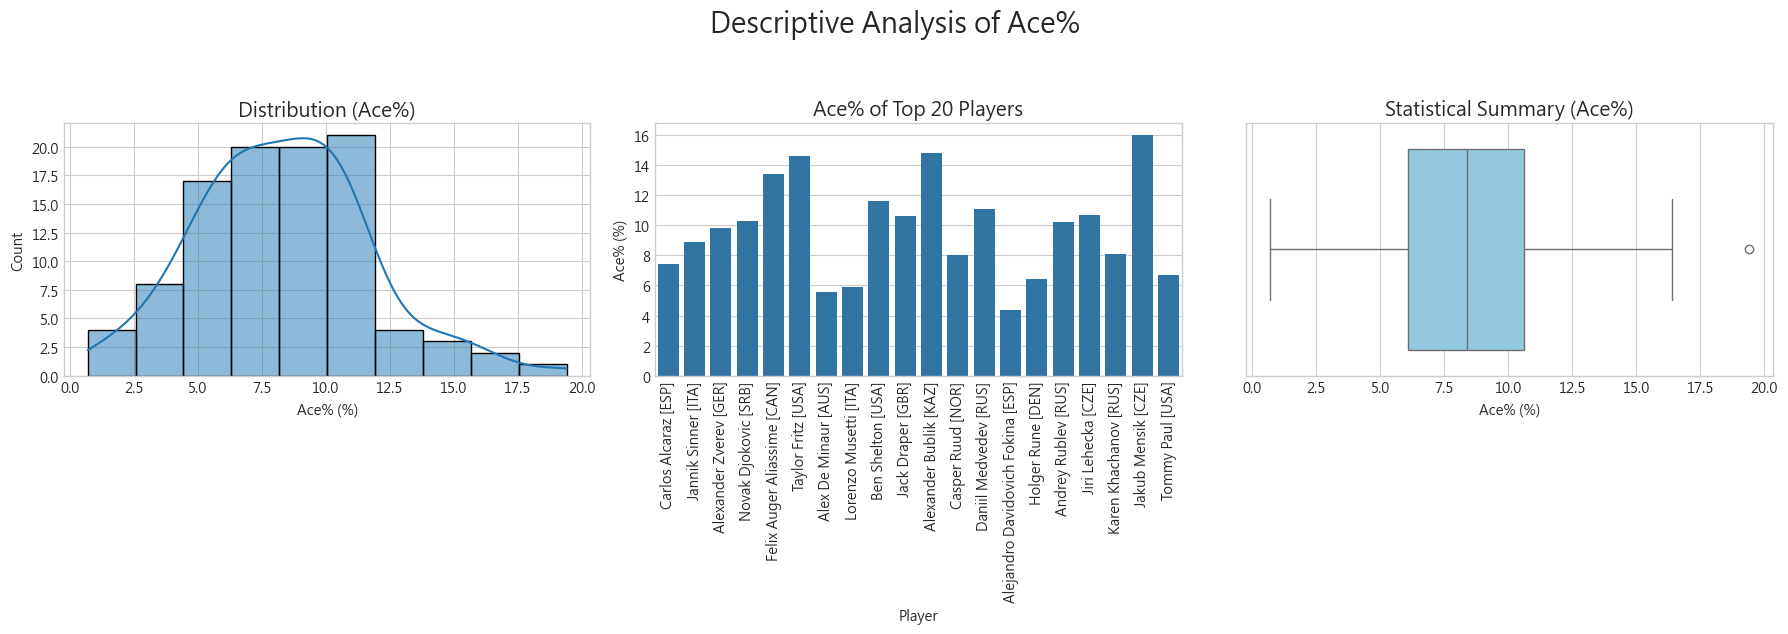

In [ ]:
plot_single_metric_analysis(df, 'Ace%')

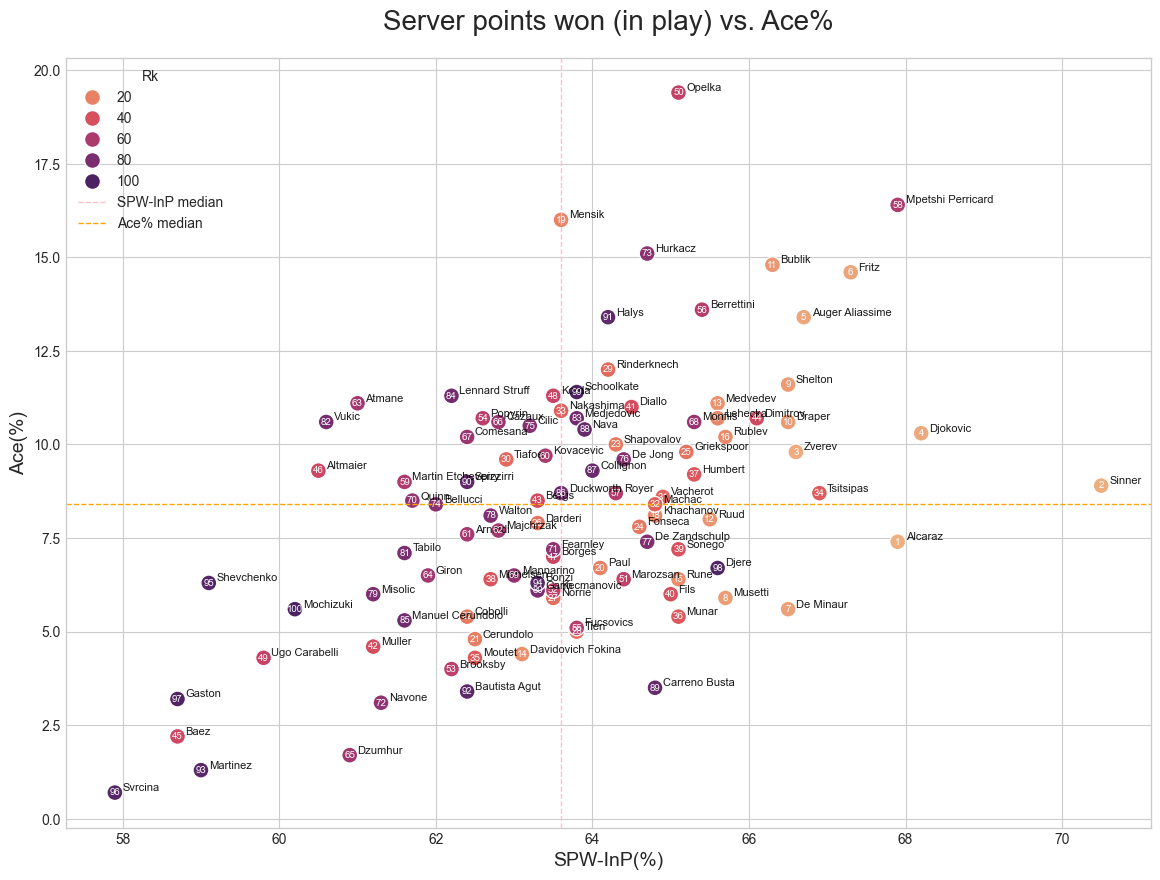

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

scatter_plot = sns.scatterplot(
    data=df,
    x='SPW-InP',
    y='Ace%',
    s=130,
    hue='Rk',
    palette='flare',
    legend=True
)

for i, row in df.iterrows():

    # 判斷名字長度並取得要顯示的文字
    if len(row['Player'].split(' ')) > 3:
        display_name = row['Player'].split(' ')[-3] + " " + row['Player'].split(' ')[-2]
    else:
        display_name = row['Player'].split(' ')[-2]
    plt.text(
        row['SPW-InP'] + 0.1,
        row['Ace%'] + 0.05,
        display_name,
        fontsize=8,
        alpha=0.9,
        color='black'
    )
    plt.text(
        row['SPW-InP'],
        row['Ace%'],
        str(int(row['Rk'])) if pd.notnull(row['Rk']) else '',
        fontsize=7,
        color='white',
        ha='center',
        va='center',
    )

# 添加中位數線
plt.axvline(x=df['SPW-InP'].median(), color='pink', linestyle='--', linewidth=1, label='SPW-InP median')
plt.axhline(y=df['Ace%'].median(), color='orange', linestyle='--', linewidth=1, label='Ace% median')

plt.title('Server points won (in play) vs. Ace%', fontsize=20, pad=20)
plt.xlabel('SPW-InP(%)', fontsize=14)
plt.ylabel('Ace(%)', fontsize=14)

# 顯示顏色圖例
plt.legend(title='Rk', loc='best')
plt.show()

In [ ]:
df['RPW'].describe()

count    100.000000
mean      36.097000
std        2.622223
min       26.100000
25%       34.875000
50%       36.050000
75%       37.500000
max       42.700000
Name: RPW, dtype: float64

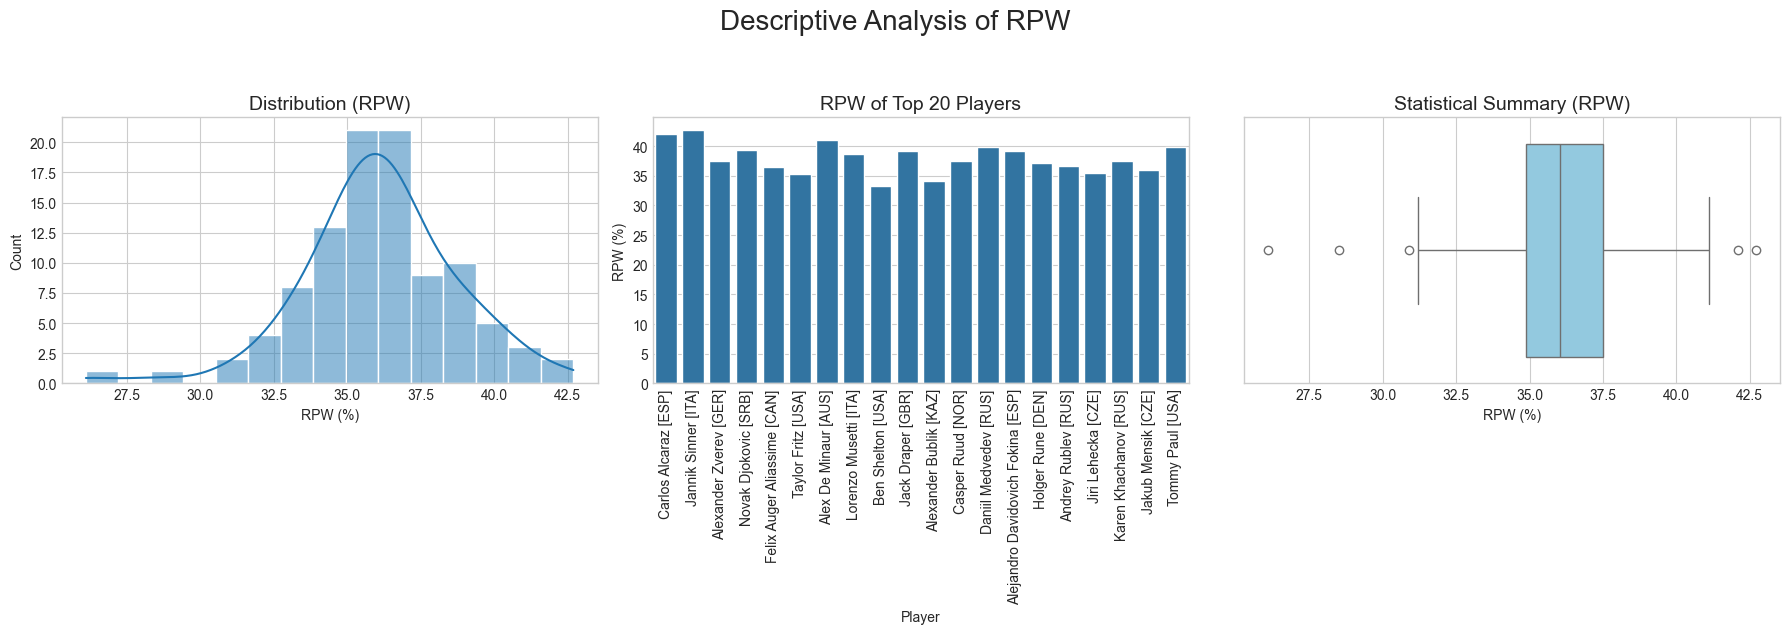

In [ ]:
plot_single_metric_analysis(df, 'RPW')

In [ ]:
df['Brk%'].describe()

count    100.000000
mean      20.135000
std        4.656794
min        7.700000
25%       17.550000
50%       19.850000
75%       22.750000
max       32.600000
Name: Brk%, dtype: float64

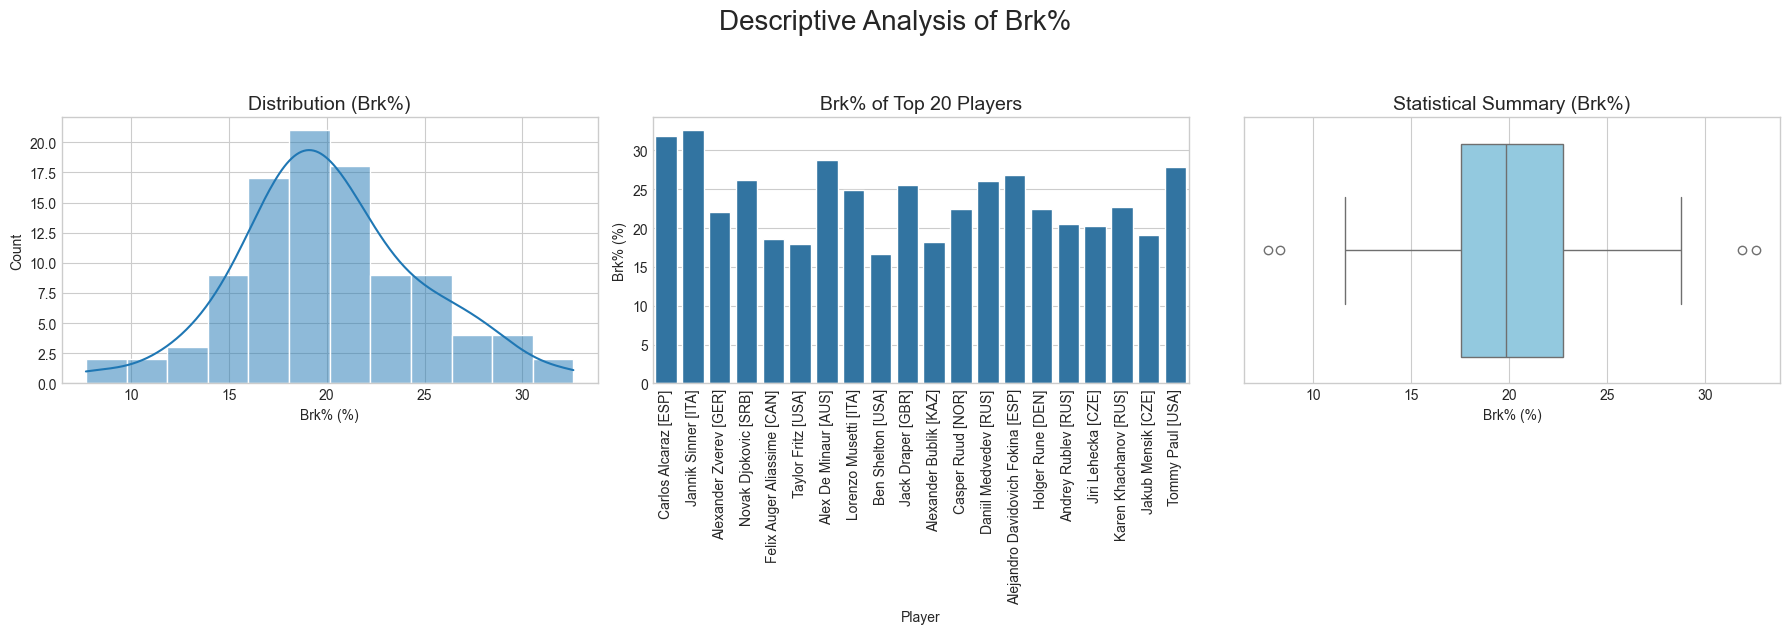

In [ ]:
plot_single_metric_analysis(df, 'Brk%')

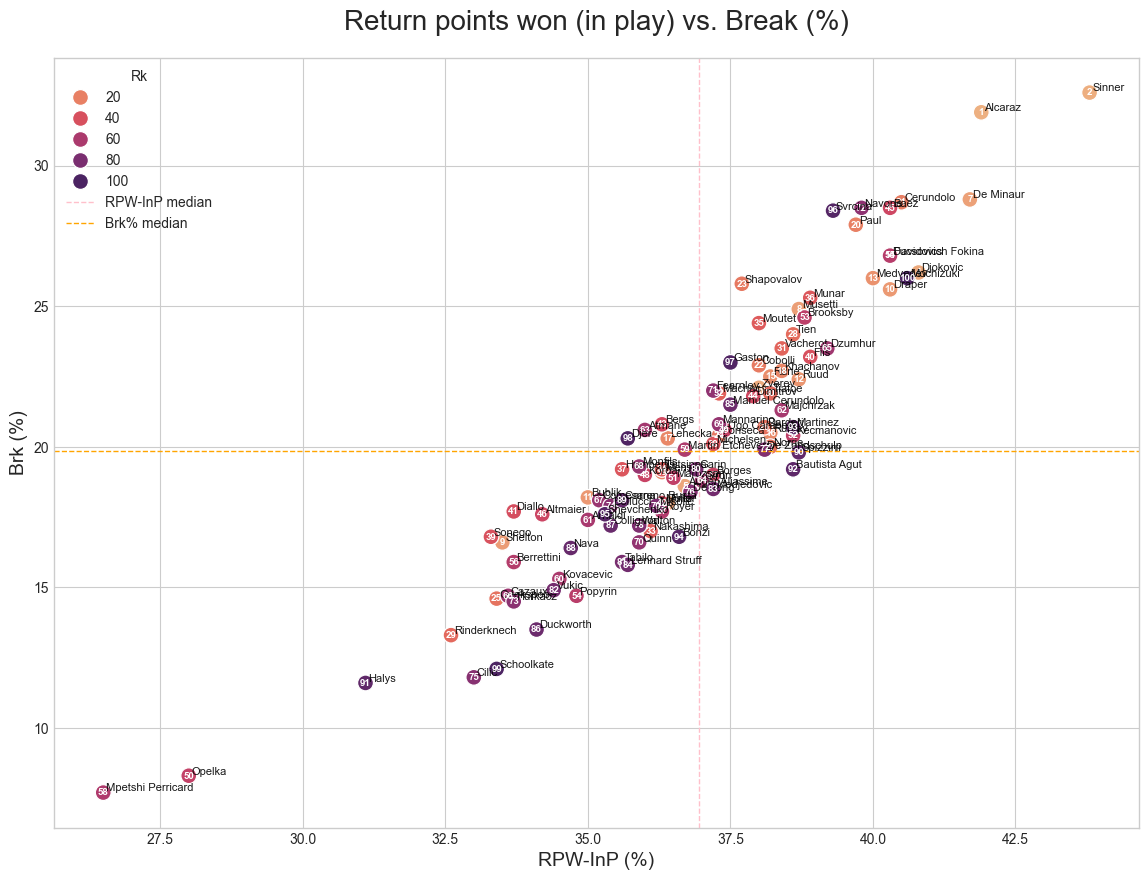

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

scatter_plot = sns.scatterplot(
    data=df,
    x='RPW-InP',
    y='Brk%',
    s=130,
    hue='Rk',
    palette='flare',
    legend=True
)

for i, row in df.iterrows():

    # 判斷名字長度並取得要顯示的文字
    if len(row['Player'].split(' ')) > 3:
        display_name = row['Player'].split(' ')[-3] + " " + row['Player'].split(' ')[-2]
    else:
        display_name = row['Player'].split(' ')[-2]
    plt.text(
        row['RPW-InP'] + 0.05,
        row['Brk%'] + 0.05,
        display_name,
        fontsize=8,
        alpha=0.9,
        color='black'
    )
    plt.text(
        row['RPW-InP'],
        row['Brk%'],
        str(int(row['Rk'])) if pd.notnull(row['Rk']) else '',
        fontsize=7,
        color='white',
        ha='center',
        va='center',
        fontweight='bold'
    )

# 添加中位數線
plt.axvline(x=df['RPW-InP'].median(), color='pink', linestyle='--', linewidth=1, label='RPW-InP median')
plt.axhline(y=df['Brk%'].median(), color='orange', linestyle='--', linewidth=1, label='Brk% median')

plt.title('Return points won (in play) vs. Break (%)', fontsize=20, pad=20)
plt.xlabel('RPW-InP (%)', fontsize=14)
plt.ylabel('Brk (%)', fontsize=14)

# 顯示顏色圖例
plt.legend(title='Rk', loc='best')
plt.show()

In [ ]:
df['M W%'].describe()

count    100.000000
mean      52.542000
std       11.639797
min       30.800000
25%       43.650000
50%       51.250000
75%       58.575000
max       90.600000
Name: M W%, dtype: float64

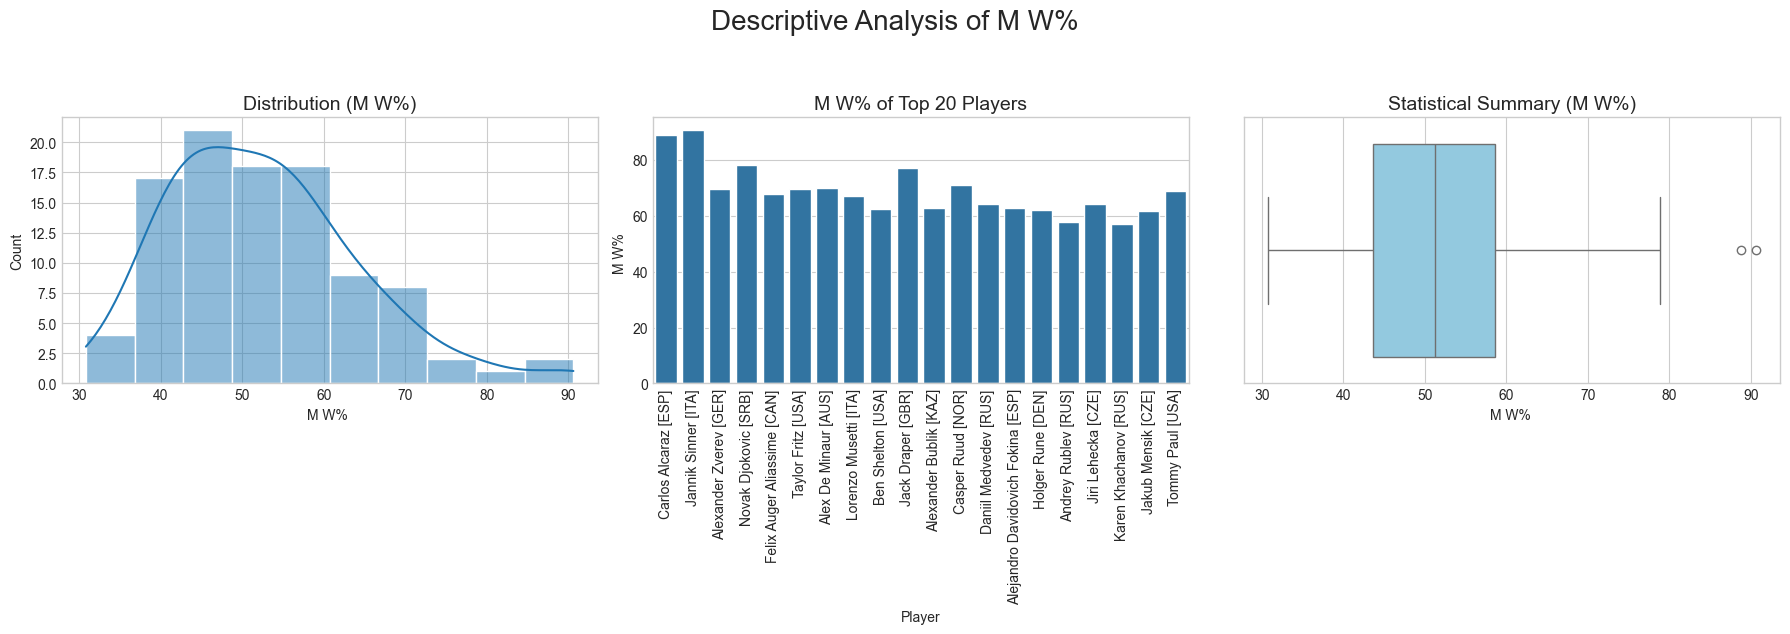

In [ ]:
plot_single_metric_analysis(df, 'M W%', False, 20)

In [ ]:
df['Gms'].describe()

count     100.000000
mean     1057.730000
std       430.184406
min       133.000000
25%       730.000000
50%      1040.500000
75%      1376.000000
max      2029.000000
Name: Gms, dtype: float64

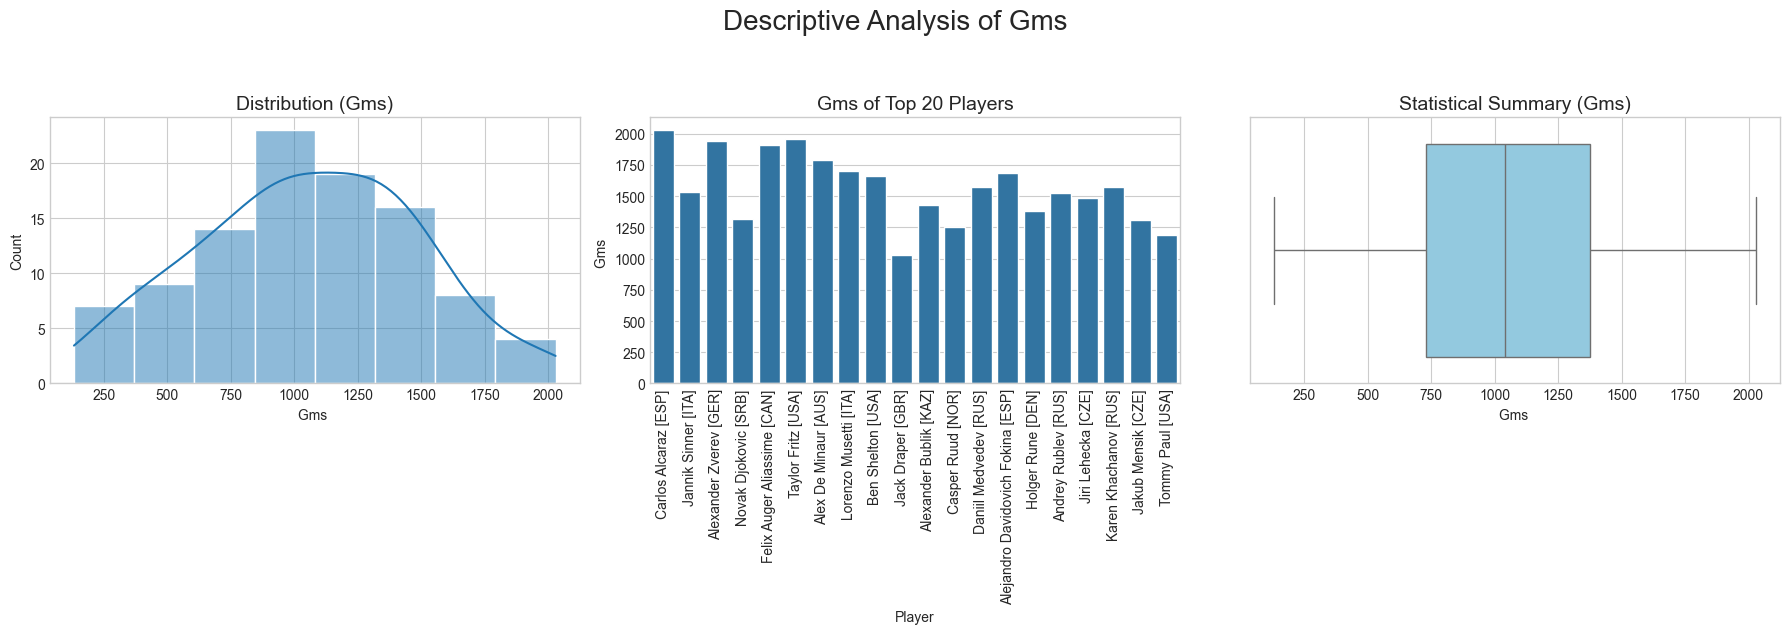

In [ ]:
plot_single_metric_analysis(df, 'Gms', False, 20)

In [ ]:
df['M'].describe()

count    100.000000
mean      43.030000
std       17.104819
min        8.000000
25%       31.750000
50%       42.000000
75%       56.000000
max       82.000000
Name: M, dtype: float64

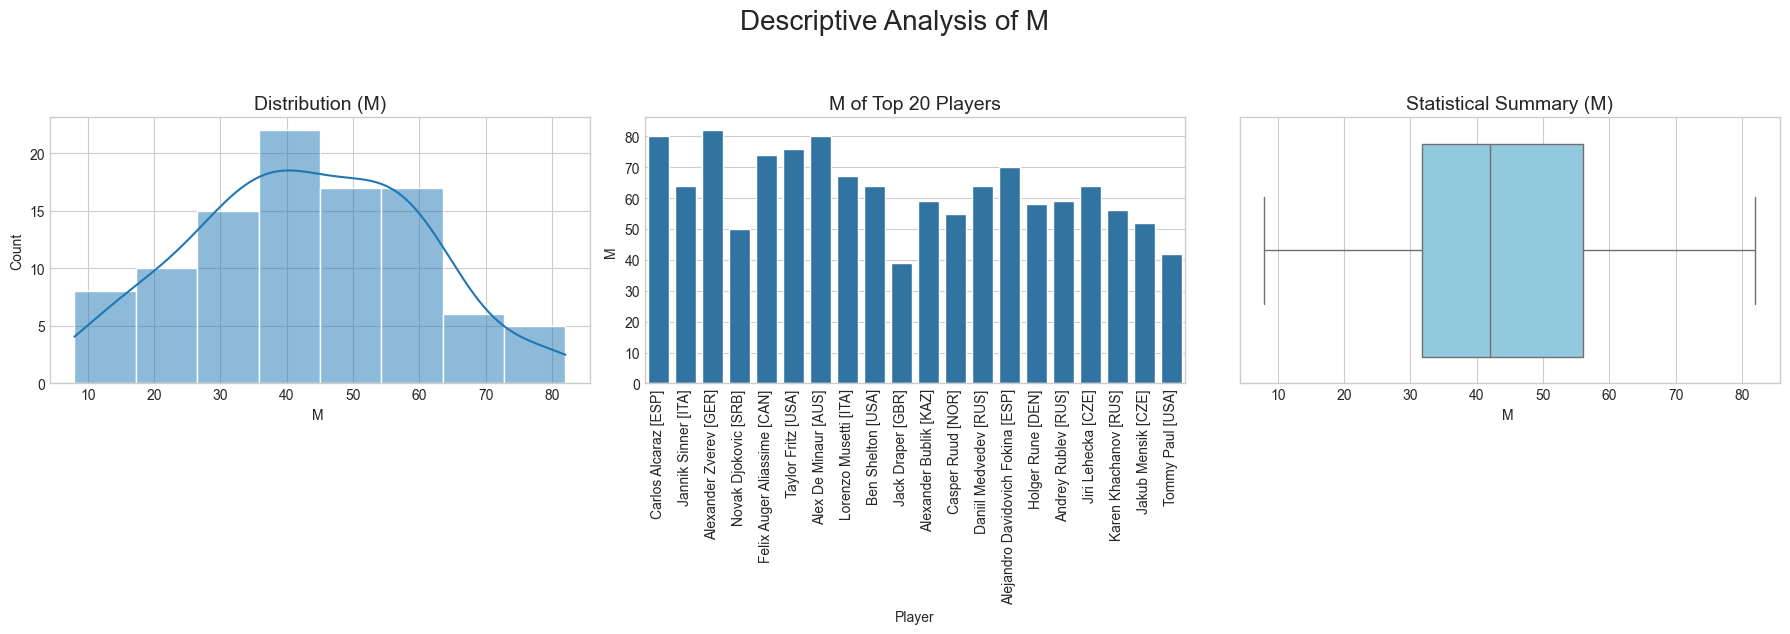

In [ ]:
plot_single_metric_analysis(df, 'M', False, 20)

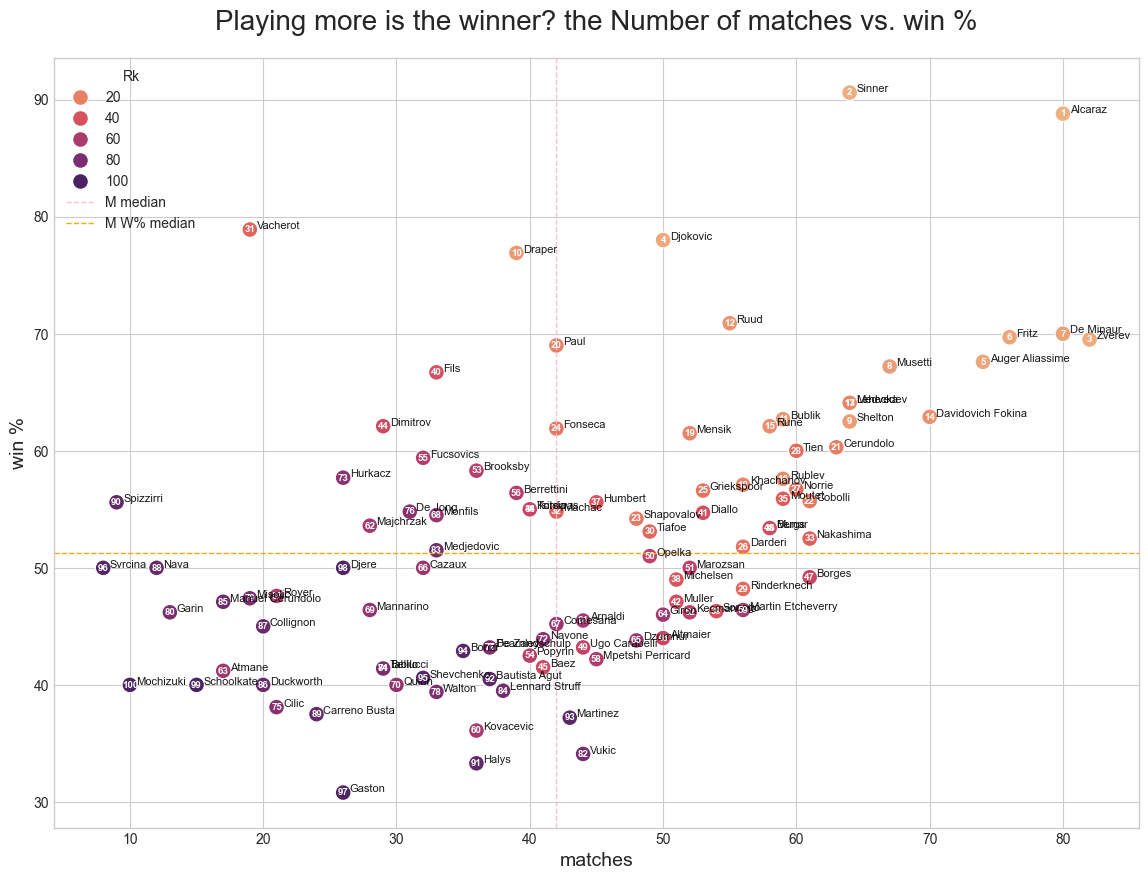

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

scatter_plot = sns.scatterplot(
    data=df,
    x='M',
    y='M W%',
    s=130,
    hue='Rk',
    palette='flare',
    legend=True
)

for i, row in df.iterrows():

    # 判斷名字長度並取得要顯示的文字
    if len(row['Player'].split(' ')) > 3:
        display_name = row['Player'].split(' ')[-3] + " " + row['Player'].split(' ')[-2]
    else:
        display_name = row['Player'].split(' ')[-2]

    plt.text(
        row['M'] + 0.5,
        row['M W%'] + 0.05,
        display_name,
        fontsize=8,
        alpha=0.9,
        color='black'
    )
    plt.text(
        row['M'],
        row['M W%'],
        str(int(row['Rk'])) if pd.notnull(row['Rk']) else '',
        fontsize=7,
        color='white',
        ha='center',
        va='center',
        fontweight='bold'
    )

# 添加中位數線
plt.axvline(x=df['M'].median(), color='pink', linestyle='--', linewidth=1, label='M median')
plt.axhline(y=df['M W%'].median(), color='orange', linestyle='--', linewidth=1, label='M W% median')

plt.title('Playing more is the winner? the Number of matches vs. win %', fontsize=20, pad=20)
plt.xlabel('matches', fontsize=14)
plt.ylabel('win %', fontsize=14)

# 顯示顏色圖例
plt.legend(title='Rk', loc='best')
plt.show()

## 觀察

* `SPW`與`Ace%`沒有絕對關係，發球得分率高的選手未必常發出Ace球
* 排名靠前的選手往往`SPW`及`RPW`有高於平均的表現
* 在`SPW`及`RPW`的數據中呈現，網球是對於發球者有利的比賽(發球局更容易取得分數)
* 排名靠前 -> 勝率越高 -> 打越多比賽

# 初步的EDA

## **1.** 選手能力分析：發球型、接發球型或全能型


### **思考脈絡**

這個分析的核心是透過比較選手的發球能力和接發球能力，來判斷他們的打球風格。將找出能夠代表這兩種能力的關鍵指標，並透過視覺化方式呈現它們之間的關係。

### **關鍵指標**

* **發球能力：**
    * **SPW** (Serve Points Won): 發球得分率。
    * **Ace%** (Ace Percentage): 發球直接得分率。
* **接發球能力：**
    * **RPW** (Return Points Won): 接發球得分率。
    * **Brk%** (Break Percentage): 破發成功率。

### **EDA 步驟**

1.  **計算衍生指標**
    * 創建一個新欄位 `Serve_vs_Return`，用來衡量發球能力與接發球能力的相對優勢。
    * **計算方式：** `Serve_vs_Return` = `SPW` - `RPW`。
    * 這個值的大小能直觀地反映選手的強項：值越大，代表發球能力越強；值越小，則代表接發球能力越強，但網球本來就是對發球者有利，因此這個數值僅能展現出選手接發球能力的平衡度。

2.  **散佈圖 (Scatter Plot)**
    * 繪製一張 `SPW` vs `RPW` 的散佈圖。這張圖能夠一目瞭然地將所有選手分成四個主要類型：
    * **右上象限：** `SPW` 和 `RPW` 都高，是 **全能型** 選手。
    * **左上象限：** `SPW` 高但 `RPW` 低，是典型的 **發球型** 選手。
    * **右下象限：** `RPW` 高但 `SPW` 低，是典型的 **接發球型** 選手。

3.  **箱型圖 (Box Plot)**
    * 繪製 `Ace%` 和 `Brk%` 的箱型圖。
    * 這能幫助視覺化這兩個關鍵數據的分布情況，並輕鬆識別出那些在發球或接發球方面表現極為突出的選手，也就是數據上的**離群點**。

In [ ]:
df_l['Serve_vs_Return'] = df_l['SPW'] - df_l['RPW']

In [ ]:
df_l['Serve_vs_Return'].mean()

np.float64(28.23400000000001)

In [ ]:
df = df_l.copy()

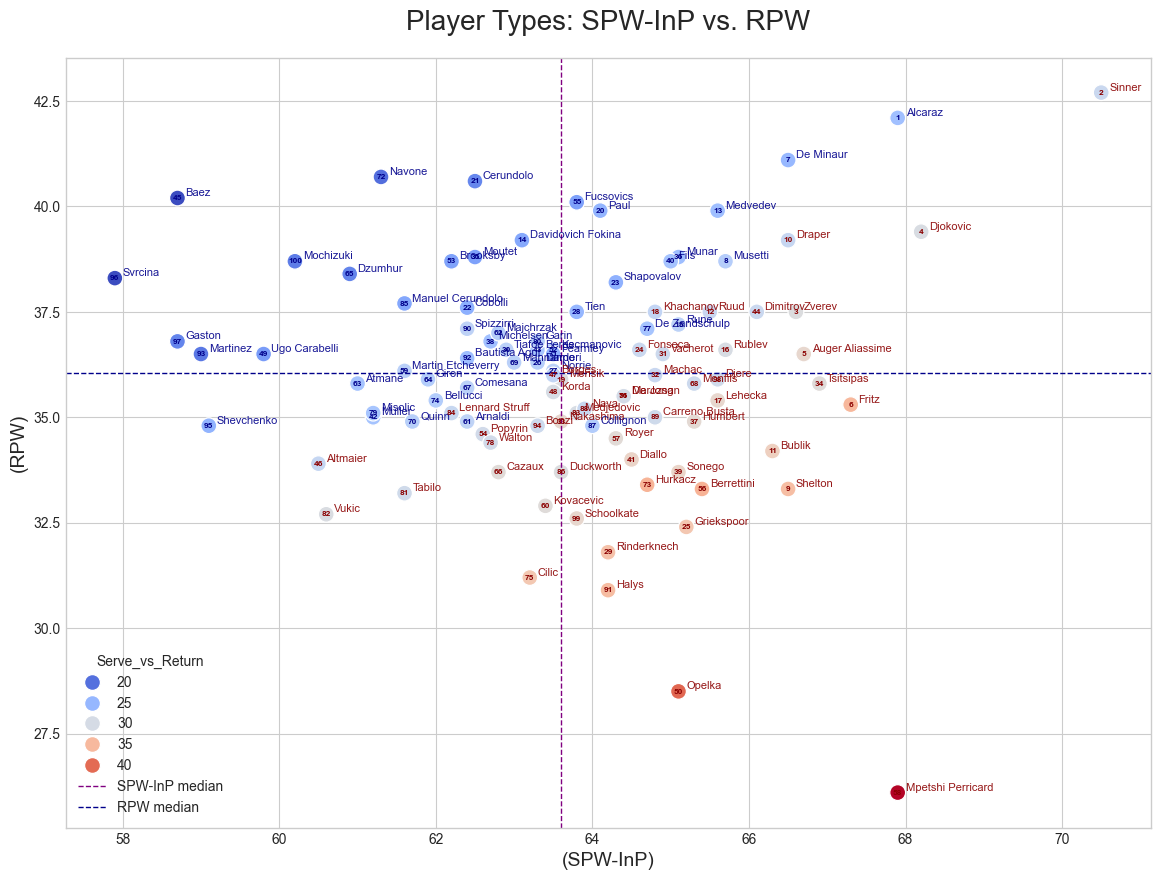

In [ ]:

sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# 繪製散佈圖，並用 'Serve_vs_Return' 作為顏色映射
scatter_plot = sns.scatterplot(
    data=df,
    x='SPW-InP',
    y='RPW',
    s=130,
    hue='Serve_vs_Return',
    palette='coolwarm',
    legend=True
)

# 為每個數據點添加標籤 (選手名字)
for i, row in df.iterrows():
    # 根據 Serve_vs_Return 的值決定標籤顏色
    label = df['Serve_vs_Return'].mean()
    if row['Serve_vs_Return'] > label:
        label_color = 'darkred'
    else:
        label_color = 'darkblue'

    # 判斷名字長度並取得要顯示的文字
    if len(row['Player'].split(' ')) > 3:
        display_name = row['Player'].split(' ')[-3] + " " + row['Player'].split(' ')[-2]
    else:
        display_name = row['Player'].split(' ')[-2]

    plt.text(
        row['SPW-InP'] + 0.1,
        row['RPW'] + 0.05,
        display_name,
        fontsize=8,
        alpha=0.9,
        color=label_color
    )
    plt.text(
        row['SPW-InP'],
        row['RPW'],
        str(int(row['Rk'])) if pd.notnull(row['Rk']) else '',
        fontsize=6,
        color=label_color,
        ha='center',
        va='center',
        fontweight='bold'
    )

# 添加中位數線
plt.axvline(x=df['SPW-InP'].median(), color='purple', linestyle='--', linewidth=1, label='SPW-InP median')
plt.axhline(y=df['RPW'].median(), color='darkblue', linestyle='--', linewidth=1, label='RPW median')

# 設定圖表標題與座標軸標籤
plt.title('Player Types: SPW-InP vs. RPW', fontsize=20, pad=20)
plt.xlabel('(SPW-InP)', fontsize=14)
plt.ylabel('(RPW)', fontsize=14)

# 顯示顏色圖例
plt.legend(title='Serve_vs_Return', loc='best')
plt.show()

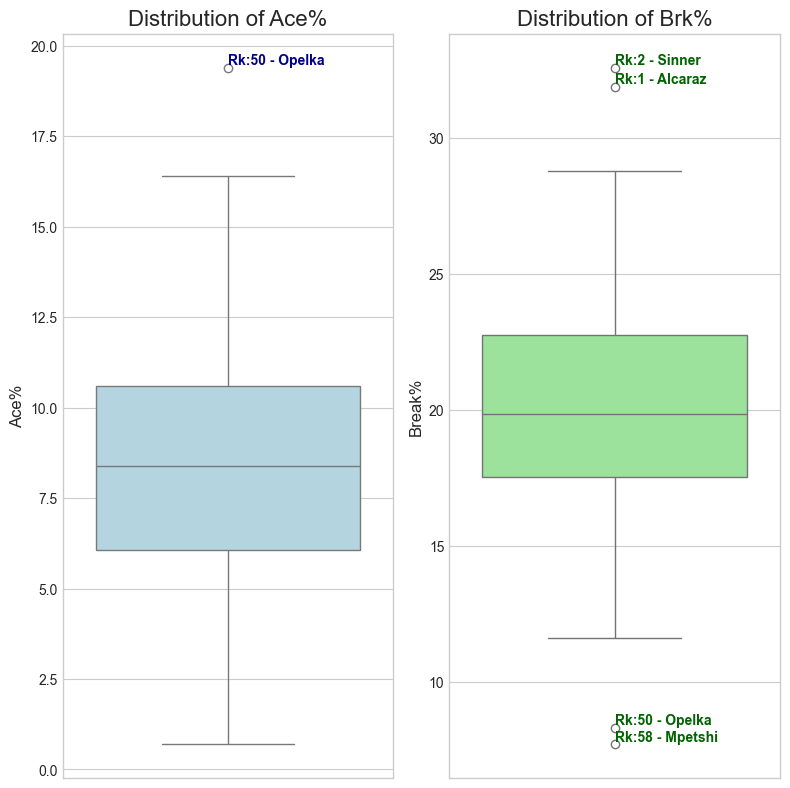

In [ ]:
# 尋找離群點的函式
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 篩選出離群點的資料
    outliers_data = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers_data


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))


# 繪製 Ace% 的箱型圖到第一個子圖 (ax1)
sns.boxplot(y='Ace%', data=df, ax=ax1, color='lightblue')
ax1.set_title('Distribution of Ace%', fontsize=16)
ax1.set_ylabel('Ace%', fontsize=12)

outliers_ace = find_outliers(df, 'Ace%')
for i, row in outliers_ace.iterrows():
    ax1.text(
        0,
        row['Ace%'],
        f"Rk:{int(row['Rk'])} - {row['Player'].split(' ')[1]}",
        ha='left',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='darkblue'
    )

# 繪製 Brk% 的箱型圖到第二個子圖 (ax2)
sns.boxplot(y='Brk%', data=df, ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Brk%', fontsize=16)
ax2.set_ylabel('Break%', fontsize=12)

outliers_brk = find_outliers(df, 'Brk%')
for i, row in outliers_brk.iterrows():
    ax2.text(
        0,
        row['Brk%'],
        f"Rk:{int(row['Rk'])} - {row['Player'].split(' ')[1]}",
        ha='left',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='darkgreen'
    )

# 調整子圖間距，防止標題重疊
plt.tight_layout()


plt.show()

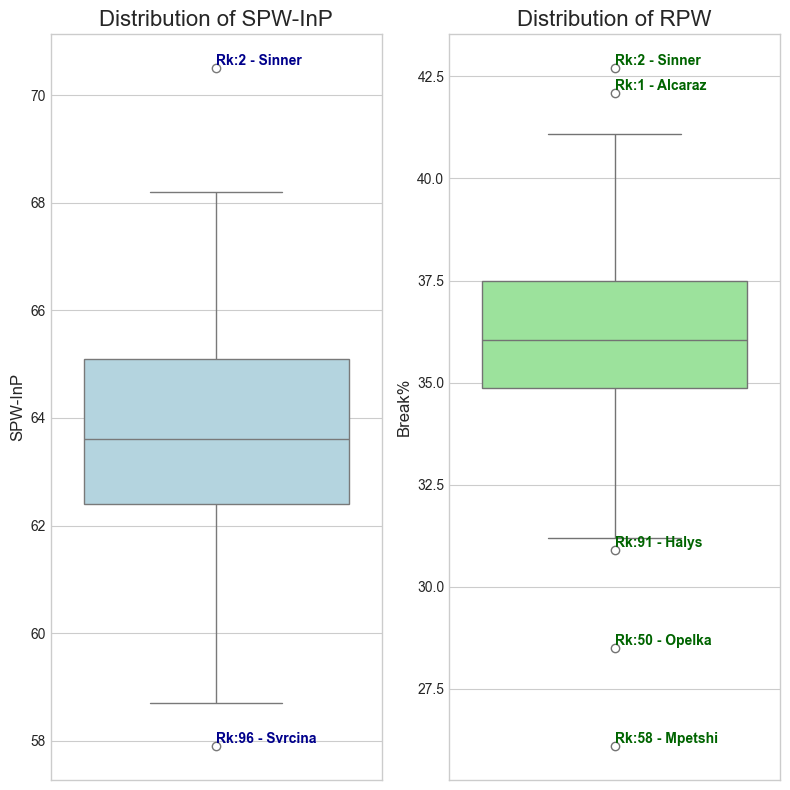

In [ ]:
# 尋找離群點的函式
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 篩選出離群點的資料
    outliers_data = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers_data


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))


# 繪製 Ace% 的箱型圖到第一個子圖 (ax1)
sns.boxplot(y='SPW-InP', data=df, ax=ax1, color='lightblue')
ax1.set_title('Distribution of SPW-InP', fontsize=16)
ax1.set_ylabel('SPW-InP', fontsize=12)

outliers_ace = find_outliers(df, 'SPW-InP')
for i, row in outliers_ace.iterrows():
    ax1.text(
        0,
        row['SPW-InP'],
        f"Rk:{int(row['Rk'])} - {row['Player'].split(' ')[1]}",
        ha='left',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='darkblue'
    )

# 繪製 Brk% 的箱型圖到第二個子圖 (ax2)
sns.boxplot(y='RPW', data=df, ax=ax2, color='lightgreen')
ax2.set_title('Distribution of RPW', fontsize=16)
ax2.set_ylabel('Break%', fontsize=12)

outliers_brk = find_outliers(df, 'RPW')
for i, row in outliers_brk.iterrows():
    ax2.text(
        0,
        row['RPW'],
        f"Rk:{int(row['Rk'])} - {row['Player'].split(' ')[1]}",
        ha='left',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='darkgreen'
    )

# 調整子圖間距，防止標題重疊
plt.tight_layout()


plt.show()

## **2.** 比賽表現分析：找出影響勝負的關鍵指標



### **思考脈絡**

這個分析的目標是找出哪些統計數據與選手的勝率 (`M W%`) 之間存在最強的關聯性。透過量化這些關係，我們可以理解在頂尖選手的對決中，究竟是哪些技術指標決定了最終的勝負。

### **關鍵指標**

* **目標變數：** `M W%` (Match Win Percentage): 總比賽勝率。
* **特徵變數：** 所有可以衡量選手技術表現的數值型欄位，例如 `SPW`、`RPW`、`Ace%`、`Brk%` 等。

### **EDA 步驟**

1.  **計算相關性矩陣 (Correlation Matrix)**
    * 計算 `M W%` 與所有特徵變數之間的相關係數。

2.  **熱力圖 (Heatmap)**
    * 將相關性矩陣視覺化為一張熱力圖。
    * 透過觀察圖中與 `M W%` 相關性最高的欄位，可以初步判斷出影響勝負的關鍵因素。

3.  **散佈圖**
    * 針對相關性最強的前幾名指標（例如 `SPW` 和 `RPW`），個別繪製它們與 `M W%` 的散佈圖。
    * 更仔細地觀察它們之間的關係，並確認相關性是線性、非線性還是有其他模式。



In [ ]:
numeric_df = df.select_dtypes(include='number').drop(columns=['Rk'])

# 計算相關性矩陣
correlation_matrix = numeric_df.corr()

# 顯示 M W% 與其他欄位的相關性
print("Correlation with 'M W%':")
print(correlation_matrix['M W%'].sort_values(ascending=False))

Correlation with 'M W%':
M W%               1.000000
S W%               0.968830
G W%               0.905439
DR                 0.882260
SPW-InP            0.690253
BPConv             0.651020
2nd%               0.622913
BPChnc             0.614209
SPW                0.600840
Bks/S              0.548319
Brk%               0.542521
Bks/M              0.537218
Sets               0.515130
RPW                0.513342
M                  0.508239
v1st%              0.499634
Gms                0.496968
PtsW/RG            0.496651
Points             0.487214
RPW-InP            0.482893
BP/S               0.478506
BP/G               0.469231
v2nd%              0.468058
BP/M               0.459472
Aces               0.397434
1st%               0.365554
Pts/RG             0.339103
BPSvd%             0.329584
TBs                0.322046
DFs                0.269733
BPSaved            0.239465
1stIn              0.205943
BPvs               0.192226
Ace%               0.163468
Sec/Pt             0.08

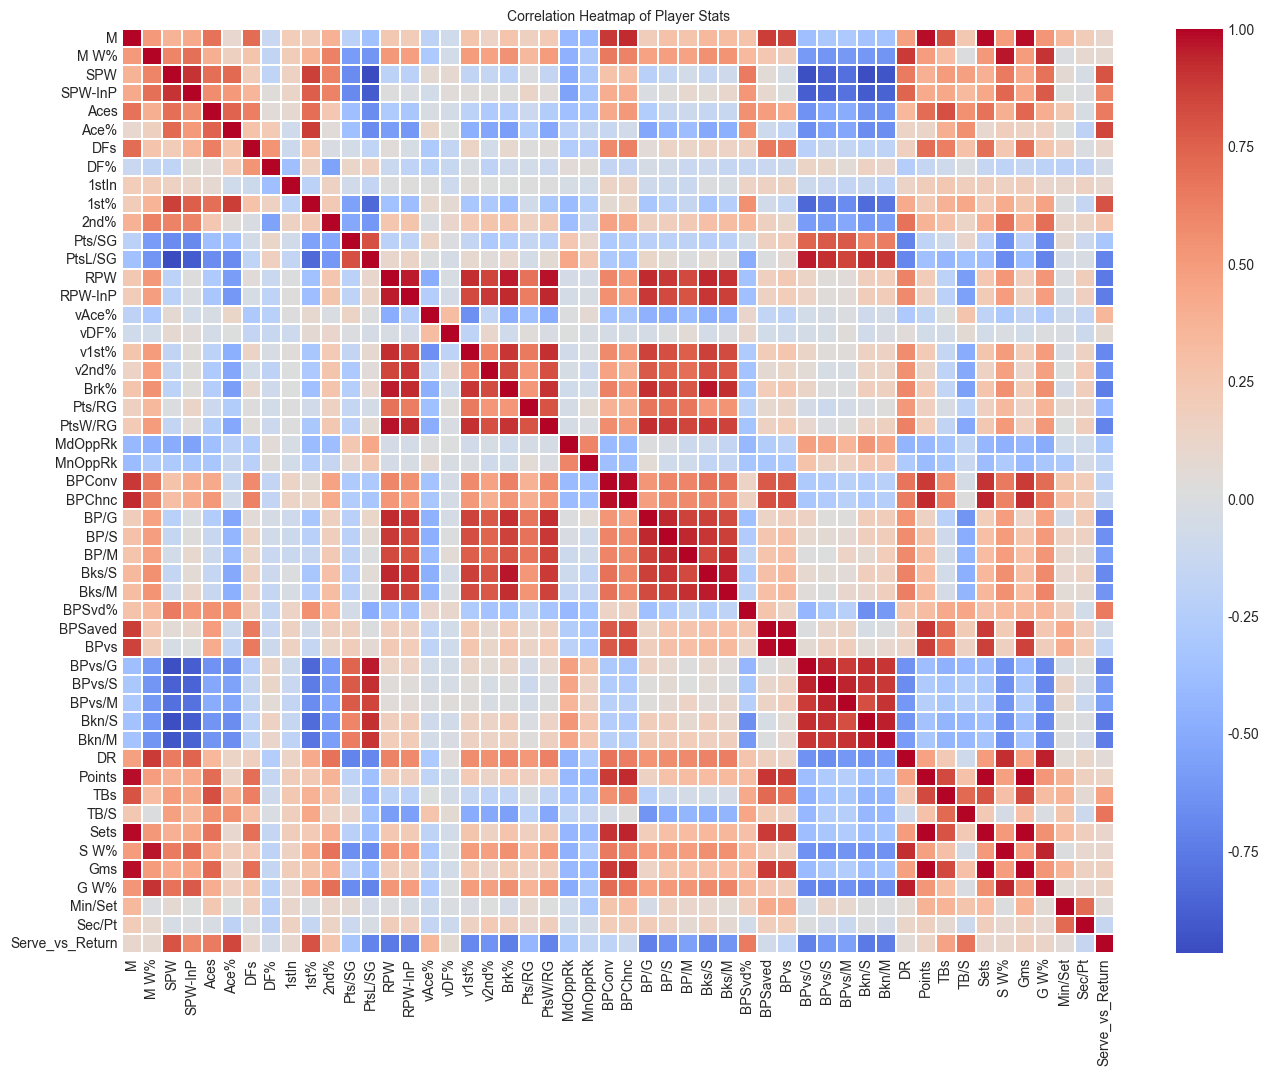

In [ ]:
# 熱力圖
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.1)
plt.title('Correlation Heatmap of Player Stats', fontsize=10)
plt.show()

* 為什麼是`SPW-InP`而不是`SPW`?

-> 從先前的描述性分析可以看出Ace球與發球局得分率並無直接相關性，而熱力圖中也展現出`SPW-InP`對`M W%`的相關性比`SPW`對`M W%`來的多

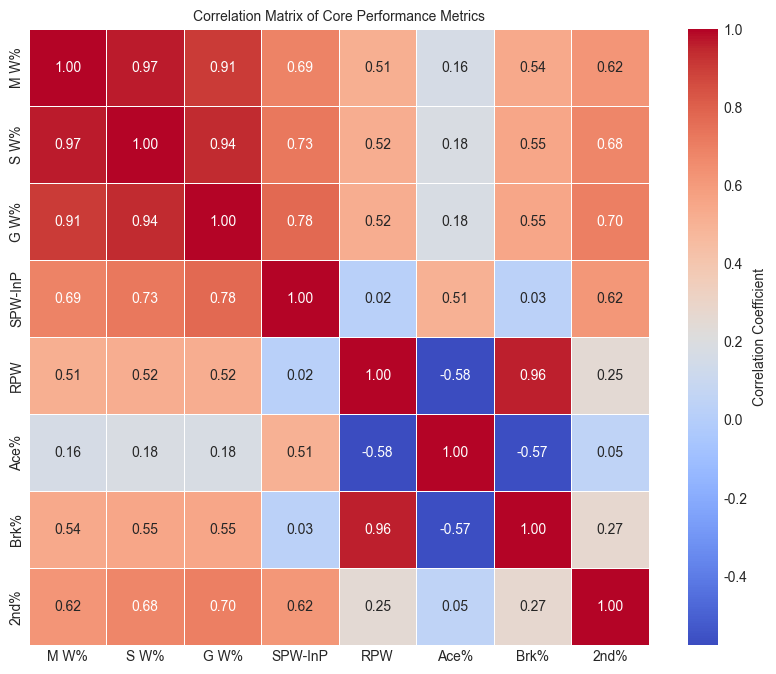

In [ ]:
# 根據大熱力圖選取重要的欄位，重新繪製熱力圖

core_metrics = [
    'M W%',         # 總比賽勝率 (目標)
    'S W%',         # 盤數勝率
    'G W%',         # 局數勝率
    'SPW-InP',      # 發球得分率 (不含 Ace)
    'RPW',          # 接發球得分率
    'Ace%',         # 發球直接得分率
    'Brk%',         # 破發成功率
    '2nd%'          # 二發得分率
]

core_df = df[core_metrics]
correlation_matrix = core_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Core Performance Metrics', fontsize=10)

plt.show()

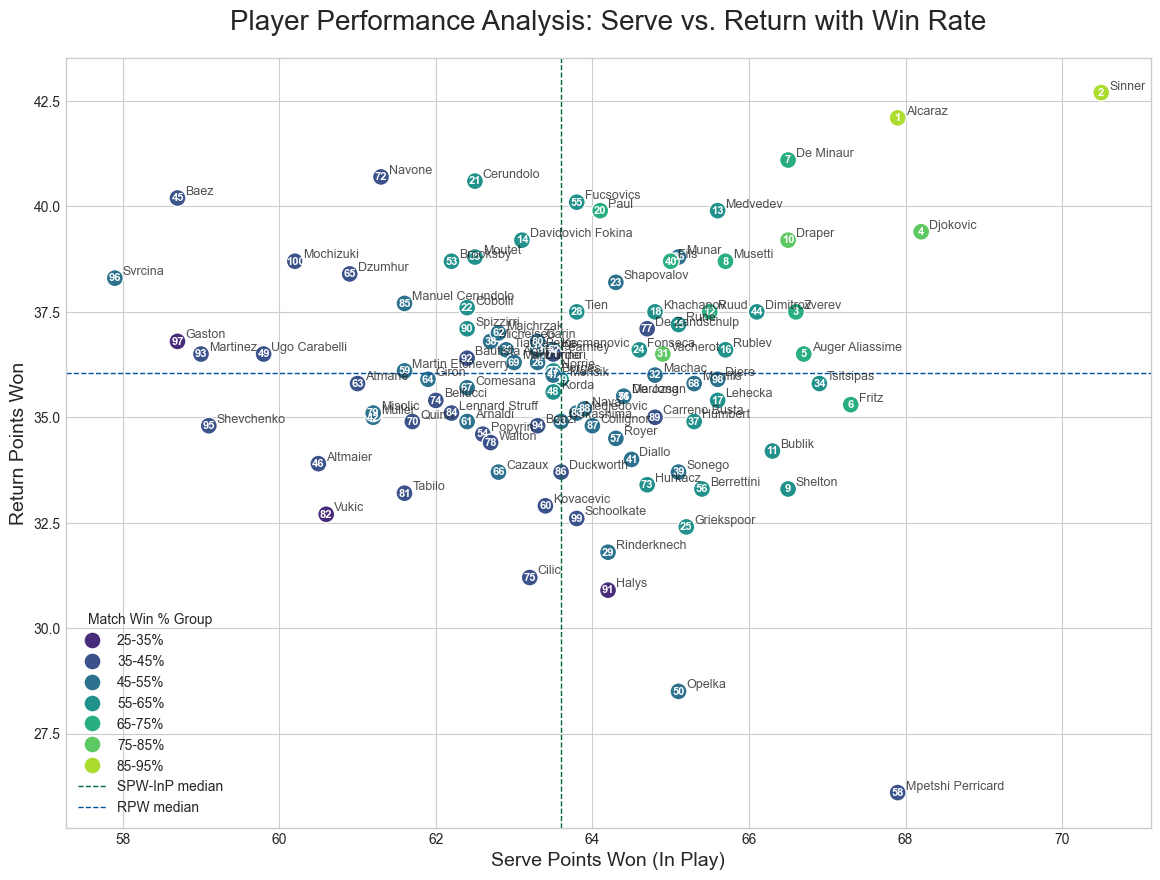

In [ ]:
# 繪製散佈圖
# X 軸： SPW-InP (發球得分率 - 不含 Ace)
# Y 軸： RPW (接發球得分率)
# 顏色： M W% (總比賽勝率)


# 創建分組欄位以簡化圖例
# 定義分組區間
bins = list(range(25, 96, 10))
# 為每個區間創建標籤
labels = [f"{i}-{i+10}%" for i in bins[:-1]]
# 使用 pd.cut() 進行分組
df['win_rate_group'] = pd.cut(df['M W%'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(14, 10))

scatter_plot = sns.scatterplot(
    data=df,
    x='SPW-InP',
    y='RPW',
    s=150,
    hue='win_rate_group', # 使用新的分組欄位來控制顏色
    palette='viridis',
    legend='full'
)

# 為每個點加上選手名稱標籤、RK
for i, row in df.iterrows():
    # 判斷名字長度並取得要顯示的文字
    if len(row['Player'].split(' ')) > 3:
        display_name = row['Player'].split(' ')[-3] + " " + row['Player'].split(' ')[-2]
    else:
        display_name = row['Player'].split(' ')[-2]

    plt.text(
        row['SPW-InP'] + 0.1,
        row['RPW'] + 0.08,
        display_name,
        fontsize=9,
        alpha=0.8
    )
    plt.text(
        row['SPW-InP'],
        row['RPW'],
        str(int(row['Rk'])) if pd.notnull(row['Rk']) else '',
        fontsize=8,
        color="white",
        ha='center',
        va='center',
        fontweight='bold'
    )

plt.axvline(x=df['SPW-InP'].median(), color='#006633', linestyle='--', linewidth=1, label='SPW-InP median')
plt.axhline(y=df['RPW'].median(), color='#004F9C', linestyle='--', linewidth=1, label='RPW median')

# 設定圖表標題與座標軸標籤
plt.title('Player Performance Analysis: Serve vs. Return with Win Rate', fontsize=20, pad=20)
plt.xlabel('Serve Points Won (In Play)', fontsize=14)
plt.ylabel('Return Points Won', fontsize=14)

# 調整圖例標題
plt.legend(title='Match Win % Group', loc='best')
plt.show()

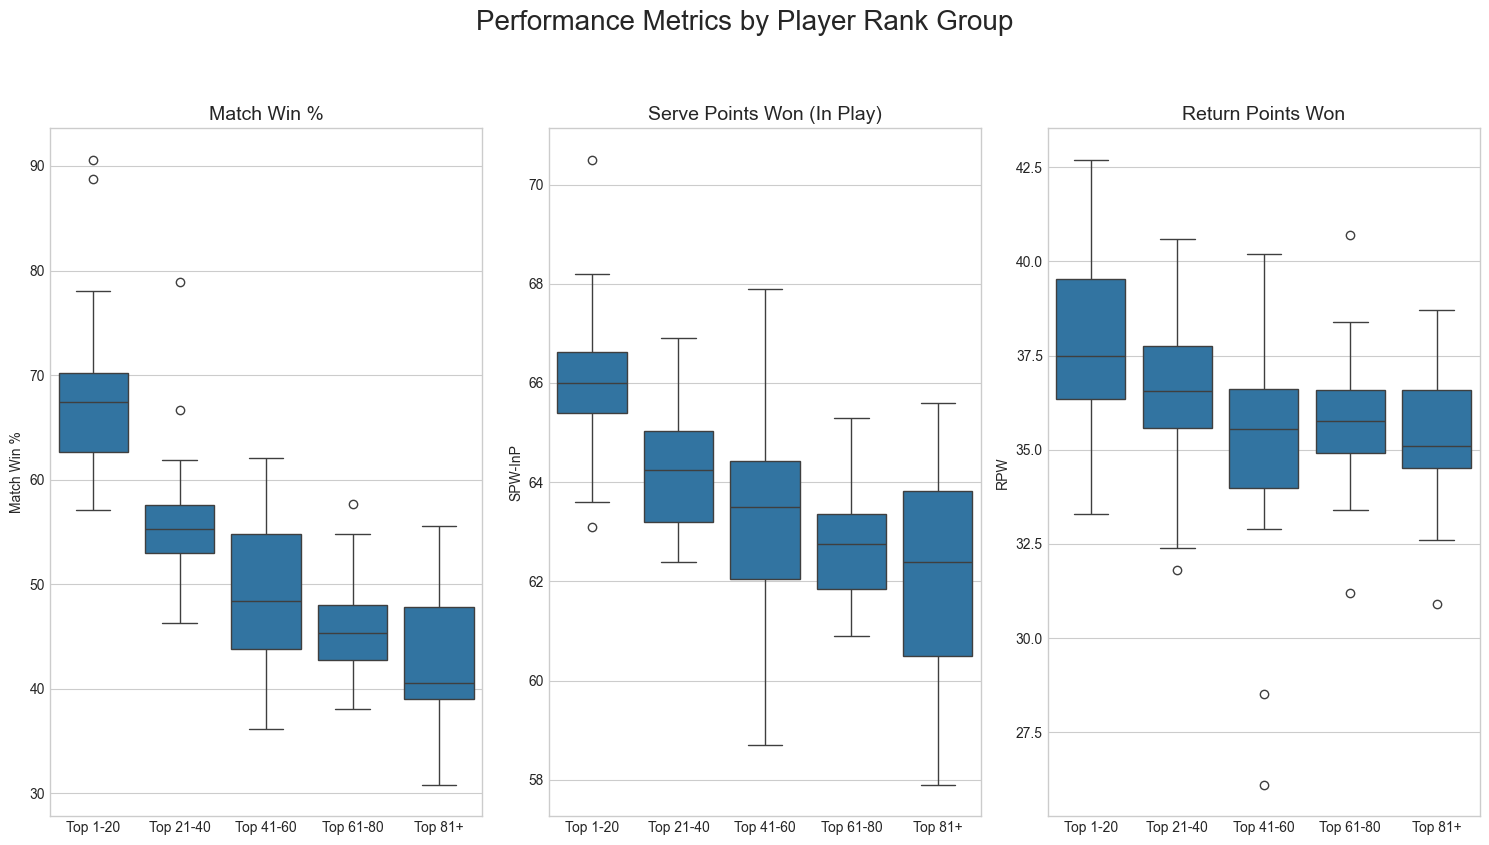

In [ ]:
# 根據排名分組


def get_rank_group(rank):
    if 1 <= rank <= 20:
        return 'Top 1-20'
    elif 21 <= rank <= 40:
        return 'Top 21-40'
    elif 41 <= rank <= 60:
        return 'Top 41-60'
    elif 61 <= rank <= 80:
        return 'Top 61-80'
    else:
        return 'Top 81+'

df['Rank Group'] = df['Rk'].apply(get_rank_group)

# 建立一個包含三張子圖的畫布
fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharey=False)

# 設定畫布標題
fig.suptitle('Performance Metrics by Player Rank Group', fontsize=20, y=1.05)

# 繪製 M W% 的箱型圖
sns.boxplot(x='Rank Group', y='M W%', data=df, ax=axes[0])
axes[0].set_title('Match Win %', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Match Win %')

# 繪製 SPW-InP 的箱型圖
sns.boxplot(x='Rank Group', y='SPW-InP', data=df, ax=axes[1])
axes[1].set_title('Serve Points Won (In Play)', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('SPW-InP')

# 繪製 RPW 的箱型圖
sns.boxplot(x='Rank Group', y='RPW', data=df, ax=axes[2])
axes[2].set_title('Return Points Won', fontsize=14)
axes[2].set_xlabel('')
axes[2].set_ylabel('RPW')

plt.tight_layout()
plt.show()

## **3.** 選手類型分類：將選手分組並找出特徵

### **思考脈絡**

這個分析的目標是根據選手的技術數據，將他們自動分成幾個類型相似的群組。這能夠幫助我們發現數據中潛在的、人眼難以察覺的模式，例如「發球強勁但失誤率高的攻擊型選手」或「全面但缺乏突出特點的穩定型選手」。

### **關鍵指標**

* **特徵變數：** 所有可以描述選手能力的數值型欄位。

### **EDA 步驟**

1.  **數據標準化 (Data Standardization)**
    * **這是進行聚類分析前最重要的步驟**。
    * 由於不同欄位的數值範圍差異巨大（例如 `Aces` 數百次，而 `Ace%` 只有 0.xx），直接使用原始數據會讓聚類演算法偏向數值較大的欄位。
    * 需要對所有特徵進行標準化，讓它們都處於相似的量綱，確保每個特徵對聚類結果的影響是公平的。

2.  **主成分分析 (PCA)**
    * 使用 **PCA** 將數據降維到 2 維或 3 維。
    * 將複雜的選手數據概括在一個簡單的散佈圖上，並從視覺上初步判斷選手是否自然形成了群組。
    * 用於確認 **K-Means** 的分群效果。

3.  **分群分析 (Clustering)**
    * 應用分群演算法，例如 **K-Means**，來將選手分組。
    * 尋找數據中的相似性，並將選手分配到不同的群組。
    * 分析每個群組的平均值，可以幫助歸納出每個選手類型的共同特徵，例如「群組 1 的平均 `Ace%` 最高，平均 `RPW` 最低，因此是典型的發球機器」。

In [ ]:
features = [
    'SPW-InP', 'Ace%', 'DF%',        # 發球相關 發球局得分率、Ace得分率、雙發失誤率
    'RPW', 'Brk%', 'vAce%',          # 接發球相關 接發球局分率、破發率、對手發球局Ace分率
    'Gms', 'M',                      # 經驗相關 局數、場數
    'Pts/RG', 'PtsW/RG'              # 效率相關 每場接發球局的得分數、每場接發球局的得分率
]

# 確保所有特徵欄位都是數值型
for col in features:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', ''), errors='coerce')

# 從 DataFrame 中篩選出我們需要的特徵
df_features = df[features]

# 刪除含有缺失值的行，以確保分析的準確性
df_features_clean = df_features.dropna()

In [ ]:
scaler = StandardScaler()

standardized_data = scaler.fit_transform(df_features_clean)
df_standardized = pd.DataFrame(standardized_data, columns=features)

print("標準化後的數據前五行：")
print(df_standardized.head())

標準化後的數據前五行：
    SPW-InP      Ace%       DF%       RPW      Brk%     vAce%       Gms  \
0  1.916869 -0.274917 -0.118119  2.300812  2.539144 -1.466253  2.269174   
1  3.096760  0.170894 -1.253875  2.530779  2.690219 -0.194118  1.105698   
2  1.326924  0.438381 -0.799572  0.537738  0.424090 -0.759511  2.061243   
3  2.053010  0.586985 -0.875290  1.265964  1.308959 -0.052770  0.610404   
4  1.372304  1.508329  0.260467  0.154461 -0.331286 -0.712395  1.993491   

          M    Pts/RG   PtsW/RG  
0  2.172268  1.202115  2.286789  
1  1.232146  1.815439  2.286789  
2  2.289783  0.588791  0.866423  
3  0.409540  0.588791  1.339879  
4  1.819722  1.202115  0.392968  


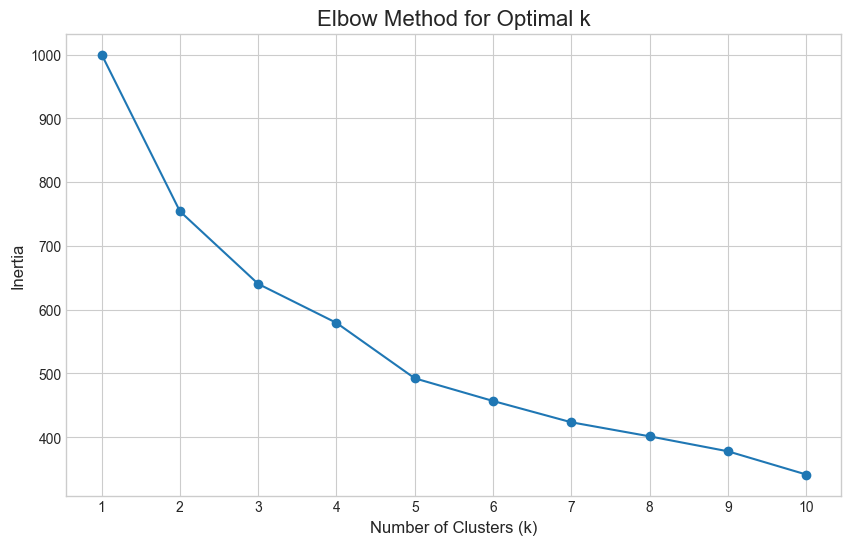

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    # 建立 KMeans 模型
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)

# 繪製手肘圖
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_range)
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

clusters = kmeans.fit_predict(df_standardized)

# 將聚類結果加回原始 DataFrame
df_features_clean['Cluster'] = clusters

print(f"分群結果已新增到 'Cluster' 欄位。")
print(df_features_clean.head())

分群結果已新增到 'Cluster' 欄位。
   SPW-InP  Ace%  DF%   RPW  Brk%  vAce%     Gms     M  Pts/RG  PtsW/RG  \
0     67.9   7.4  3.5  42.1  31.9    5.0  2029.0  80.0     6.6      2.8   
1     70.5   8.9  2.0  42.7  32.6    7.7  1531.0  64.0     6.7      2.8   
2     66.6   9.8  2.6  37.5  22.1    6.5  1940.0  82.0     6.5      2.5   
3     68.2  10.3  2.5  39.4  26.2    8.0  1319.0  50.0     6.5      2.6   
4     66.7  13.4  4.0  36.5  18.6    6.6  1911.0  74.0     6.6      2.4   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [ ]:
clustered_df = df_features_clean.copy()
clustered_df['Cluster'] = clusters

# 計算每個群組在所有特徵上的平均值
cluster_summary = clustered_df.groupby('Cluster')[features].mean()

# 計算每個群組的選手數量
cluster_counts = clustered_df.groupby('Cluster').size().reset_index(name='Count')
cluster_summary = pd.merge(cluster_summary, cluster_counts, on='Cluster')

# 為了更容易比較，將數值四捨五入
cluster_summary = cluster_summary.round(2)

print("每個群組的平均特徵值與選手數量：")
print(cluster_summary)

每個群組的平均特徵值與選手數量：
   Cluster  SPW-InP   Ace%   DF%    RPW   Brk%  vAce%      Gms      M  Pts/RG  \
0        0    63.58   7.14  3.76  37.18  21.80   7.31  1162.79  47.33    6.48   
1        1    64.50  12.03  3.72  33.12  15.61   8.79  1152.04  45.70    6.22   
2        2    66.33   8.16  3.25  39.77  26.66   6.42  1690.50  69.40    6.58   
3        3    62.18   7.00  3.61  35.73  19.20   9.28   607.93  25.43    6.38   

   PtsW/RG  Count  
0     2.41     39  
1     2.07     23  
2     2.62     10  
3     2.29     28  


In [ ]:
def map_clusters_by_score(cluster_df):
    """
    根據群組間的指標排名分數，自動將 K-Means 的編號對應到選手類型標籤。

    參數:
    cluster_df (pd.DataFrame): 包含 'Cluster' 編號及各種技術指標平均值的 DataFrame。

    回傳:
    dict: 包含 Cluster 編號到選手類型標籤的映射。
    """
    # 初始化一個空的映射字典
    cluster_mapping = {}

    # 確保所有欄位都存在
    required_cols = ['Cluster', 'SPW-InP', 'Ace%', 'RPW', 'Brk%', 'M']
    if not all(col in cluster_df.columns for col in required_cols):
        raise ValueError(f"DataFrame 必須包含所有必需的欄位: {required_cols}")

    # 複製 DataFrame 以免修改原始資料
    df_temp = cluster_df.copy()

    # 計算各個指標的排名
    df_temp['rank_ace'] = df_temp['Ace%'].rank(ascending=False)
    df_temp['rank_spw'] = df_temp['SPW-InP'].rank(ascending=False)
    df_temp['rank_rpw'] = df_temp['RPW'].rank(ascending=False)
    df_temp['rank_brk'] = df_temp['Brk%'].rank(ascending=False)
    df_temp['rank_m'] = df_temp['M'].rank(ascending=False)

    # -----------------------------
    # 1. 評分並識別「發球機器」
    # -----------------------------
    # 發球機器分數：Ace% 和 SPW 排名分數越高，RPW 排名分數越低（倒數）
    df_temp['score_service'] = (4 - df_temp['rank_ace']) + (4 - df_temp['rank_spw']) + df_temp['rank_rpw']

    # 找到分數最高的群組
    service_machine_cluster = df_temp.loc[df_temp['score_service'].idxmax()]['Cluster']
    cluster_mapping[service_machine_cluster] = 'Service Machines'

    # -----------------------------
    # 2. 評分並識別「全能型統治者」
    # -----------------------------
    # 全能型統治者分數：RPW、Brk% 和 M 排名分數越高
    df_temp['score_all_court'] = (4 - df_temp['rank_rpw']) + (4 - df_temp['rank_brk']) + (4 - df_temp['rank_m'])

    # 找到分數最高的群組，但要排除已經被標記的「發球機器」
    remaining_clusters = df_temp[df_temp['Cluster'] != service_machine_cluster]
    all_court_dominators_cluster = remaining_clusters.loc[remaining_clusters['score_all_court'].idxmax()]['Cluster']
    cluster_mapping[all_court_dominators_cluster] = 'All-Court Dominators'

    # -----------------------------
    # 3. 評分並識別「底線防守者」
    # -----------------------------
    # 底線防守者分數：M 和 SPW 排名分數越低（倒數）
    df_temp['score_baseline'] = df_temp['rank_m'] + df_temp['rank_spw']

    remaining_clusters_2 = df_temp[~df_temp['Cluster'].isin(cluster_mapping.keys())]
    baseline_defender_cluster = remaining_clusters_2.loc[remaining_clusters_2['score_baseline'].idxmax()]['Cluster']
    cluster_mapping[baseline_defender_cluster] = 'Baseline Defenders'

    # -----------------------------
    # 4. 剩下的就是「均衡型中堅」
    # -----------------------------
    final_cluster = df_temp.loc[~df_temp['Cluster'].isin(cluster_mapping.keys())]['Cluster'].iloc[0]
    cluster_mapping[final_cluster] = 'Balanced Professionals'

    return cluster_mapping

## 分群


### **群組 ：均衡型中堅**

* **特徵洞見：** 這個群組的各項指標都非常平衡，沒有特別突出，也沒有明顯短板。他們的 `SPW` 和 `RPW` 都在中等水平。
* **數據趨勢：** 這是選手人數最多 (`Count`) 的群組。他們平均比賽場數 (`M` ) 相當高，顯示他們是巡迴賽中穩定且可靠的中堅力量。
* **命名：** **均衡型中堅 (Balanced Professionals)**

### **群組 ：發球機器**

* **特徵洞見：** 這個群組的 `Ace%` 和 `SPW` 在所有群組中都遙遙領先，但 `RPW` 和 `Brk%` 卻是最低的。
* **數據趨勢：** 他們極度依賴強勢的發球來贏得比賽，並且在接發球方面表現掙扎。儘管如此，他們的比賽場數依然很高，證明這種風格在職業網壇仍然非常有效。
* **命名：** **發球機器 (Service Machines)**

### **群組 ：全能型統治者**

* **特徵洞見：** 這個群組的 `RPW` 和 `Brk%` 都是所有群組中最高的，同時 `SPW` 也表現優異。他們的 `PtsW/RG` 顯示了極高的效率。
* **數據趨勢：** 他們在發球和接發球兩方面都極具統治力。雖然選手數量不多 (`Count`)，但他們的平均比賽場數 (`M`) 是最高的，強烈暗示他們是那些在大型賽事中走得最遠的頂尖選手。
* **命名：** **全能型統治者 (All-Court Dominators)**

### **群組 ：底線防守者**

* **特徵洞見：** 這個群組的 `RPW` 和 `Brk%` 較高，但 `SPW` 和 `Ace%` 較低。他們的雙誤率 (`DF%`) 是所有群組中最高的。
* **數據趨勢：** 他們是典型的底線型選手，擅長利用接發球來尋找機會。他們平均比賽場數 (`M`) 最少，可能代表他們在面對頂尖發球手時，會比較難以持續贏球。
* **命名：** **底線防守者 (Baseline Defenders)**。

In [ ]:
df = df_l.copy()

In [ ]:
df = df.reset_index(drop=True)
clustered_df = clustered_df.reset_index(drop=True)
df = df.merge(clustered_df[['Cluster']], left_index=True, right_index=True, how='left')

In [ ]:
df.head(10)

Rk                       Player     M  M W-L  M W%   SPW  SPW-InP   Aces  \
0   1         Carlos Alcaraz [ESP]  80.0   71-9  88.8  67.9     67.9  463.0   
1   2          Jannik Sinner [ITA]  64.0   58-6  90.6  71.7     70.5  405.0   
2   3       Alexander Zverev [GER]  82.0  57-25  69.5  68.1     66.6  577.0   
3   4         Novak Djokovic [SRB]  50.0  39-11  78.0  69.7     68.2  413.0   
4   5  Felix Auger Aliassime [CAN]  74.0  50-24  67.6  68.4     66.7  783.0   
5   6           Taylor Fritz [USA]  76.0  53-23  69.7  70.4     67.3  871.0   
6   7         Alex De Minaur [AUS]  80.0  56-24  70.0  66.2     66.5  309.0   
7   8        Lorenzo Musetti [ITA]  67.0  45-22  67.2  66.0     65.7  310.0   
8   9            Ben Shelton [USA]  64.0  40-24  62.5  67.9     66.5  607.0   
9  10            Jack Draper [GBR]  39.0   30-9  76.9  67.9     66.5  325.0   

   Ace%    DFs  ...  Set W-L  S W%     Gms  Game W-L  G W% Time/Mt Min/Set  \
0   7.4  219.0  ...   170-47  78.3  2029.0  1215-814  59.9    1:48    39.9   
1   8.9   91.0  ...   144-24  85.7  1531.0   958-573  62.6    1:45    40.0   
2   9.8  152.0  ...   137-68  66.8  1940.0  1051-889  54.2    1:49    43.6   
3  10.3  102.0  ...    99-39  71.7  1319.0   764-555  57.9    1:52    40.5   
4  13.4  234.0  ...   118-74  61.5  1911.0   997-914  52.2    2:04    47.9   
5  14.6  146.0  ...   126-71  64.0  1959.0  1061-898  54.2    1:51    42.9   
6   5.6  185.0  ...   135-62  68.5  1786.0  1014-772  56.8    1:45    42.8   
7   5.9  134.0  ...   114-65  63.7  1704.0   922-782  54.1    1:49    40.8   
8  11.6  198.0  ...   100-65  60.6  1659.0   864-795  52.1    1:48    42.1   
9  10.6   99.0  ...    73-35  67.6  1026.0   571-455  55.7    1:46    38.1   

   Sec/Pt  Serve_vs_Return  Cluster  
0    40.1             25.8        2  
1    42.0             29.0        2  
2    43.7             30.6        2  
3    40.7             30.3        2  
4    45.2             31.9        2  
5    41.5             35.1        1  
6    44.2             25.1        2  
7    40.7             27.3        2  
8    40.3             34.6        1  
9    38.1             28.7        0  

[10 rows x 64 columns]

# 繪製前 20 名選手類型分布圖

In [ ]:
cluster_names = map_clusters_by_score(cluster_summary)
print(cluster_names)

{np.float64(1.0): 'Service Machines', np.float64(2.0): 'All-Court Dominators', np.float64(3.0): 'Baseline Defenders', np.int32(0): 'Balanced Professionals'}


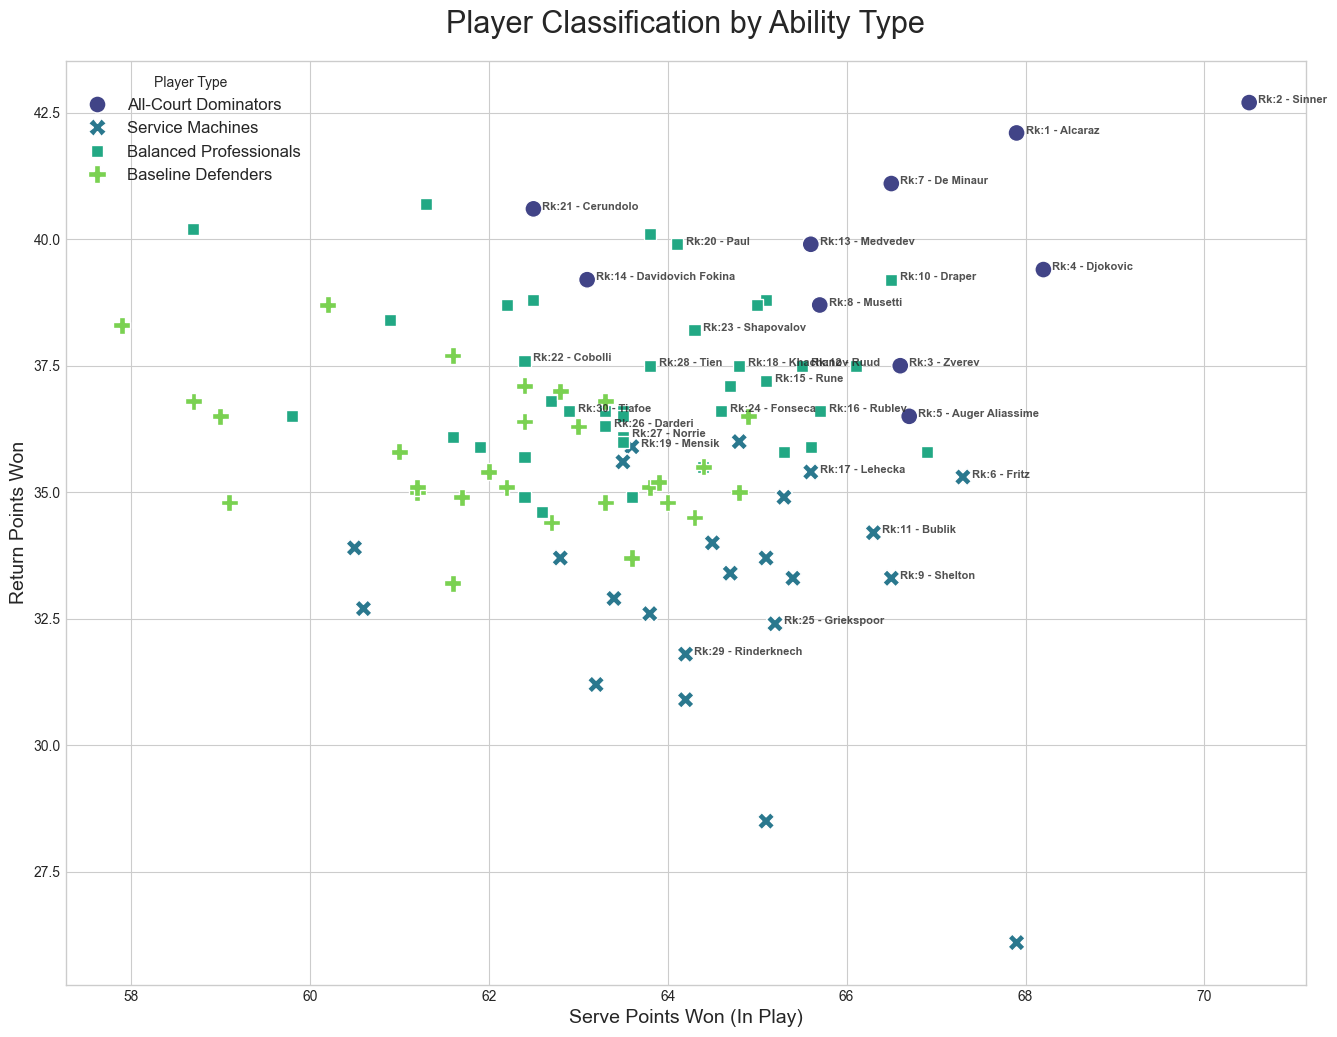

In [ ]:
# 替換 Cluster 數字為具體名稱

df['Player Type'] = df['Cluster'].map(cluster_names)

#  繪製散佈圖
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

scatterplot = sns.scatterplot(
    data=df,
    x='SPW-InP',
    y='RPW',
    hue='Player Type',
    palette='viridis',
    s=150,
    style='Player Type',
    legend='full'
)

#  加選手名稱與排名標籤
top_players = df[df['Rk'] <= 30]

for i, row in top_players.iterrows():
    if pd.notnull(row['Rk']) and pd.notnull(row['Player Type']):


      # 判斷名字長度並取得要顯示的文字
      if len(row['Player'].split(' ')) > 3:
          display_name = row['Player'].split(' ')[-3] + " " + row['Player'].split(' ')[-2]
      else:
          display_name = row['Player'].split(' ')[-2]


      plt.text(
          row['SPW-InP'] + 0.1,
          row['RPW'] + 0.05,
          f"Rk:{int(row['Rk'])} - {display_name}",
          fontsize=8,
          va='center',
          alpha=0.8,
          fontweight='bold'
      )


#  設定圖表標題與座標軸標籤
plt.title('Player Classification by Ability Type', fontsize=22, pad=20)
plt.xlabel('Serve Points Won (In Play)', fontsize=14)
plt.ylabel('Return Points Won', fontsize=14)
plt.legend(title='Player Type', loc='best', fontsize=12)

plt.show()

C:\Users\wang6\AppData\Local\Temp\ipykernel_100580\432815225.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experienced_balanced['Sum_Abilities'] = experienced_balanced['SPW-InP'] + experienced_balanced['RPW']


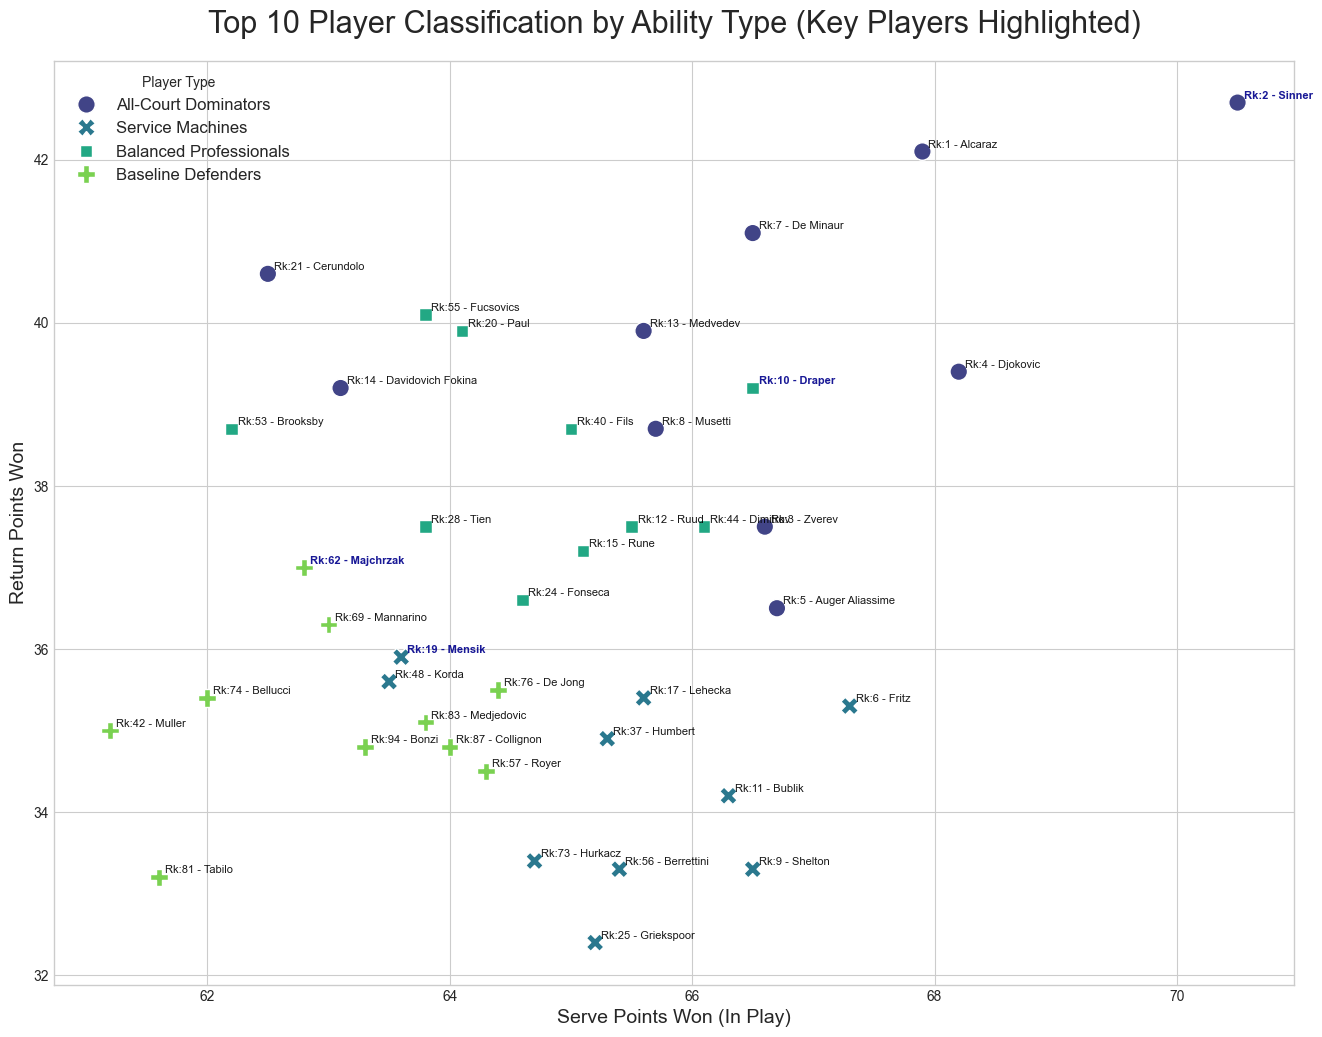

In [ ]:
# -----------------------------
# 1. 確保關鍵欄位為數值型，並合併聚類結果
# -----------------------------
df['SPW-InP'] = pd.to_numeric(df['SPW-InP'].astype(str).str.replace('%', ''), errors='coerce')
df['RPW'] = pd.to_numeric(df['RPW'].astype(str).str.replace('%', ''), errors='coerce')
df['Rk'] = pd.to_numeric(df['Rk'], errors='coerce')
df['M W%'] = pd.to_numeric(df['M W%'].astype(str).str.replace('%', ''), errors='coerce')
df['Ace%'] = pd.to_numeric(df['Ace%'].astype(str).str.replace('%', ''), errors='coerce')
df['Brk%'] = pd.to_numeric(df['Brk%'].astype(str).str.replace('%', ''), errors='coerce')

# df = df.merge(clustered_df[['Cluster']], left_index=True, right_index=True, how='left')
# cluster_names = {0: 'Experienced & Balanced', 1: 'Defensive Baseline', 2: 'Elite All-Court', 3: 'Powerful Server'}
# df['Player Type'] = df['Cluster'].map(cluster_names)


# -----------------------------
# 2. 篩選每個群組中勝率 (M W%) 最高的前 10 名，且比賽一定場數以上的選手
# -----------------------------
min_matches = 20
df_filtered = df[df['M'] >= min_matches]

top_players_per_type = pd.DataFrame()
for player_type in df_filtered['Player Type'].unique():
    # 對篩選後的數據進行操作
    top_10 = df_filtered[df_filtered['Player Type'] == player_type].sort_values(by='M W%', ascending=False).head(10)
    top_players_per_type = pd.concat([top_players_per_type, top_10])

# -----------------------------
# 3. 找出每個群組中數據特別突出的那一個選手 (進行特殊標註)
# -----------------------------
special_highlight_players = []


# cluster_names = {
#     2: 'All-Court Dominators',
#     1: 'Service Machines',
#     3: 'Baseline Defenders',
#     0: 'Balanced Professionals'
# }


# All-Court Dominators: 找出 RPW 或 SPW-InP 最高的 (或 M W% 最高)
if 'All-Court Dominators' in top_players_per_type['Player Type'].unique():
    elite_all_court = top_players_per_type[top_players_per_type['Player Type'] == 'All-Court Dominators']
    special_highlight_players.append(elite_all_court.sort_values(by='M W%', ascending=False).iloc[0])

# Service Machines: 找出 Ace% 最高的
if 'Service Machines' in top_players_per_type['Player Type'].unique():
    powerful_server = top_players_per_type[top_players_per_type['Player Type'] == 'Service Machines']
    special_highlight_players.append(powerful_server.sort_values(by='Ace%', ascending=False).iloc[0])

# Balanced Professionals: 找出 SPW-InP 和 RPW 總和最高的 (代表最均衡)
if 'Balanced Professionals' in top_players_per_type['Player Type'].unique():
    experienced_balanced = top_players_per_type[top_players_per_type['Player Type'] == 'Balanced Professionals']
    experienced_balanced['Sum_Abilities'] = experienced_balanced['SPW-InP'] + experienced_balanced['RPW']
    special_highlight_players.append(experienced_balanced.sort_values(by='Sum_Abilities', ascending=False).iloc[0])

# Baseline Defenders: 找出 Brk% 最高的 (代表最擅長破發)
if 'Baseline Defenders' in top_players_per_type['Player Type'].unique():
    defensive_baseline = top_players_per_type[top_players_per_type['Player Type'] == 'Baseline Defenders']
    special_highlight_players.append(defensive_baseline.sort_values(by='Brk%', ascending=False).iloc[0])

special_highlight_df = pd.DataFrame(special_highlight_players)


# -----------------------------
# 4. 繪製散佈圖
# -----------------------------
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

# 繪製所有前 10 名選手的點
scatterplot = sns.scatterplot(
    data=top_players_per_type, # 只使用篩選過的前 10 名選手數據
    x='SPW-InP',
    y='RPW',
    hue='Player Type',
    palette='viridis',
    s=160,
    style='Player Type',
    legend='full'
)

# -----------------------------
# 5. 添加選手名稱與排名標籤 (只標註所有前 10 名選手)
# -----------------------------
for i, row in top_players_per_type.iterrows():
    if pd.notnull(row['Rk']) and pd.notnull(row['Player Type']):


        # 判斷名字長度並取得要顯示的文字
        if len(row['Player'].split(' ')) > 3:
            display_name = row['Player'].split(' ')[-3] + " " + row['Player'].split(' ')[-2]
        else:
            display_name = row['Player'].split(' ')[-2]


        # 如果是特別標註的選手，則使用不同的顏色和粗體
        if row['Player'] in special_highlight_df['Player'].values:
            text_color = 'darkblue'
            font_weight = 'bold'
            font_size = 8

        # 其他選手
        else:
            text_color = 'black'
            font_weight = 'normal'
            font_size = 8


        plt.text(
            row['SPW-InP'] + 0.05,
            row['RPW'] + 0.05,
            f"Rk:{int(row['Rk'])} - {display_name}",
            fontsize=font_size,
            alpha=0.9,
            color=text_color,
            fontweight=font_weight
        )


# -----------------------------
# 6. 設定圖表標題與座標軸標籤
# -----------------------------
plt.title('Top 10 Player Classification by Ability Type (Key Players Highlighted)', fontsize=22, pad=20)
plt.xlabel('Serve Points Won (In Play)', fontsize=14)
plt.ylabel('Return Points Won', fontsize=14)
plt.legend(title='Player Type', loc='best', fontsize=12)

plt.show()


PCA 結果前五行：
        PC1       PC2  SPW-InP  Ace%  DF%   RPW  Brk%  vAce%     Gms     M  \
0  5.109961  2.679155     67.9   7.4  3.5  42.1  31.9    5.0  2029.0  80.0   
1  4.786231  2.183742     70.5   8.9  2.0  42.7  32.6    7.7  1531.0  64.0   
2  2.055984  3.051528     66.6   9.8  2.6  37.5  22.1    6.5  1940.0  82.0   
3  2.214954  1.440812     68.2  10.3  2.5  39.4  26.2    8.0  1319.0  50.0   
4  1.065791  3.303295     66.7  13.4  4.0  36.5  18.6    6.6  1911.0  74.0   

   Pts/RG  PtsW/RG  Cluster                       Player  Rk  \
0     6.6      2.8        2         Carlos Alcaraz [ESP]   1   
1     6.7      2.8        2          Jannik Sinner [ITA]   2   
2     6.5      2.5        2       Alexander Zverev [GER]   3   
3     6.5      2.6        2         Novak Djokovic [SRB]   4   
4     6.6      2.4        2  Felix Auger Aliassime [CAN]   5   

            Player Type  
0  All-Court Dominators  
1  All-Court Dominators  
2  All-Court Dominators  
3  All-Court Dominators  
4  Al

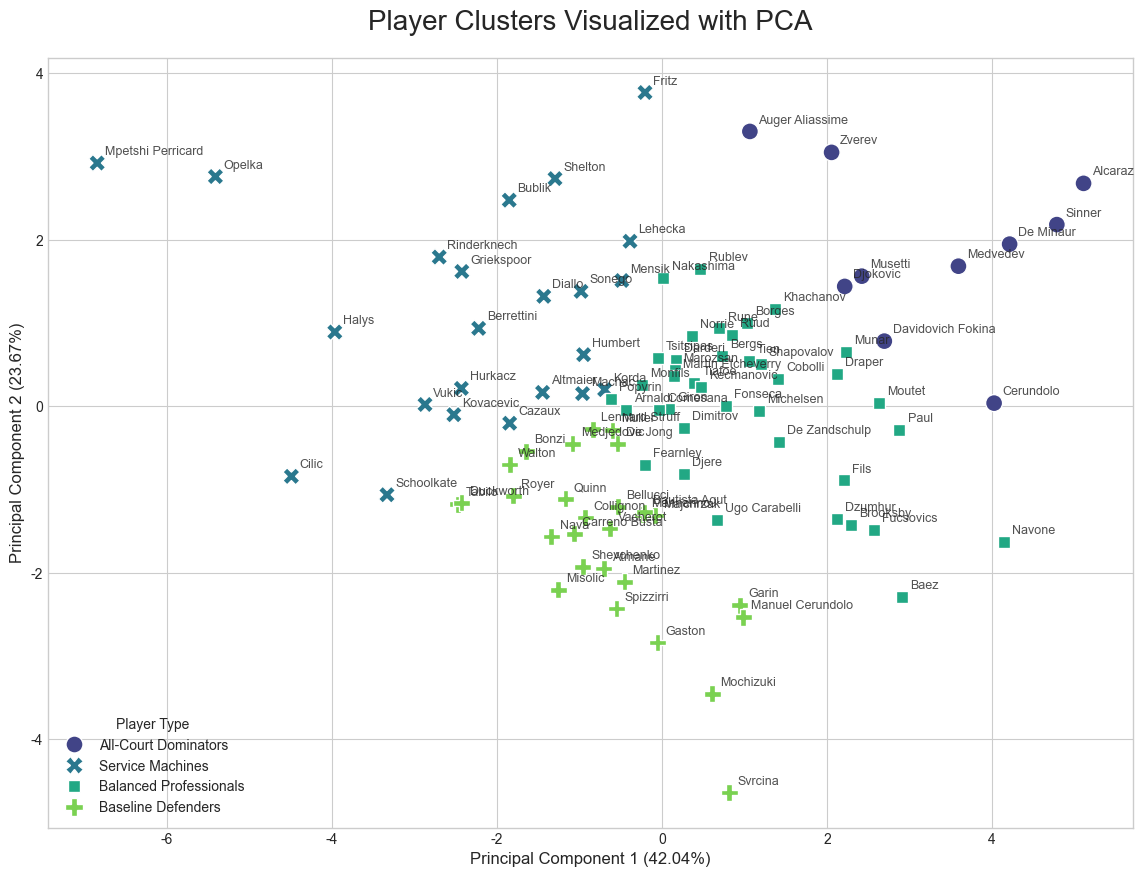

In [ ]:
from sklearn.decomposition import PCA

# -----------------------------
# 1. 執行 PCA 降維
# -----------------------------
# 建立 PCA 模型，將數據降至 2 個主成分
pca = PCA(n_components=2)
# 對標準化後的數據進行降維
pca_result = pca.fit_transform(df_standardized)

# 將降維結果轉換為 DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# 將聚類結果和原始選手名字、排名等資料加回 PCA 結果
df_pca = pd.merge(df_pca, df_features_clean, left_index=True, right_index=True)
df_pca['Player'] = df['Player']
df_pca['Rk'] = df['Rk']
df_pca['Player Type'] = df['Player Type']

print("PCA 結果前五行：")
print(df_pca.head())

# -----------------------------
# 2. 繪製 PCA 散佈圖
# -----------------------------
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# 使用 seaborn 繪製散佈圖，以 PC1 和 PC2 為軸
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Player Type',
    palette='viridis',
    s=150,
    style='Player Type',
    data=df_pca,
    legend='full'
)

# 為每個點添加標籤 (選手名字)
for i, row in df_pca.iterrows():
    # 判斷名字長度並取得要顯示的文字
    if len(row['Player'].split(' ')) > 3:
        display_name = row['Player'].split(' ')[-3] + " " + row['Player'].split(' ')[-2]
    else:
        display_name = row['Player'].split(' ')[-2]
    plt.text(
        row['PC1'] + 0.1,
        row['PC2'] + 0.1,
        display_name,
        fontsize=9,
        alpha=0.8
    )

# 設定圖表標題與座標軸標籤
plt.title('Player Clusters Visualized with PCA', fontsize=20, pad=20)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
plt.legend(title='Player Type', loc='best')

# 顯示圖表
plt.show()

# 觀察分群中的選手資料

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. 定義雷達圖所需的核心特徵
# -----------------------------
# 注意：DF% 是唯一需要取倒數的指標
radar_features = ['SPW', 'Ace%', 'DF%', 'RPW', 'Brk%', 'M']

# 確保所有欄位都是數值型
for col in radar_features:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', ''), errors='coerce')

# 創建一個用於分析的 DataFrame，並執行必要的修正
df_radar = df.copy().dropna(subset=radar_features + ['Player Type'])

# --- 關鍵修正：將 DF% 轉換為 Control Score ---
# DF% 越低越好，所以我們將其取倒數，讓它變成越高越好
# 我們可以使用 100 - DF% 來代表控制力
df_radar['Control Score'] = 100 - df_radar['DF%']

# 最終用於標準化的特徵列表 (用 Control Score 取代 DF%)
final_features = ['SPW', 'Ace%', 'RPW', 'Brk%', 'M', 'Control Score']

# -----------------------------
# 2. 數據標準化 (MinMaxScaler)
# -----------------------------
scaler = MinMaxScaler()
# 對選定的特徵進行 0 到 1 的標準化
standardized_data = scaler.fit_transform(df_radar[final_features])

# 將結果轉換為 DataFrame
df_scaled = pd.DataFrame(standardized_data, columns=final_features)
df_scaled['Player'] = df_radar['Player'].values
df_scaled['Player Type'] = df_radar['Player Type'].values
df_scaled['Rk'] = df_radar['Rk'].values

print("標準化後的數據前五行（0-1 評分）：")
print(df_scaled.head())

標準化後的數據前五行（0-1 評分）：
        SPW      Ace%       RPW      Brk%         M  Control Score  \
0  0.756410  0.358289  0.963855  0.971888  0.972973       0.675676   
1  1.000000  0.438503  1.000000  1.000000  0.756757       0.878378   
2  0.769231  0.486631  0.686747  0.578313  1.000000       0.797297   
3  0.871795  0.513369  0.801205  0.742972  0.567568       0.810811   
4  0.788462  0.679144  0.626506  0.437751  0.891892       0.608108   

                        Player           Player Type  Rk  
0         Carlos Alcaraz [ESP]  All-Court Dominators   1  
1          Jannik Sinner [ITA]  All-Court Dominators   2  
2       Alexander Zverev [GER]  All-Court Dominators   3  
3         Novak Djokovic [SRB]  All-Court Dominators   4  
4  Felix Auger Aliassime [CAN]  All-Court Dominators   5  


In [ ]:
# -----------------------------
# 1. 選擇每個群組中最具代表性的選手
# -----------------------------
# 為了避免複雜的排序，我們假設這四個選手是代表性最高的選手：
# 請根據你原始 df 數據中的 M W% 最高者來篩選，這裡我使用手動篩選來作為範例。

# 假設這是四個群組中 M W% 最高的四位選手
representative_players = df_scaled.groupby('Player Type').head(1)

# 確保我們有四個選手
players_to_plot = representative_players['Player'].tolist()
print("選定的四位代表選手：", players_to_plot)

# -----------------------------
# 2. 設定雷達圖的軸（Features）
# -----------------------------
# 這是雷達圖的六個軸
categories = [
    'Serve Stability (SPW)',
    'Serve Power (Ace%)',
    'Return Efficiency (RPW)',
    'Break Threat (Brk%)',
    'Match Experience (M)',
    'Serve Control (100-DF%)'
]

# 將選定選手的數據轉換成適合繪圖的格式
plot_data = representative_players[final_features].values.tolist()
player_types = representative_players['Player Type'].tolist()

選定的四位代表選手： ['Carlos Alcaraz [ESP]', 'Taylor Fritz [USA]', 'Jack Draper [GBR]', 'Valentin Vacherot [MON]']


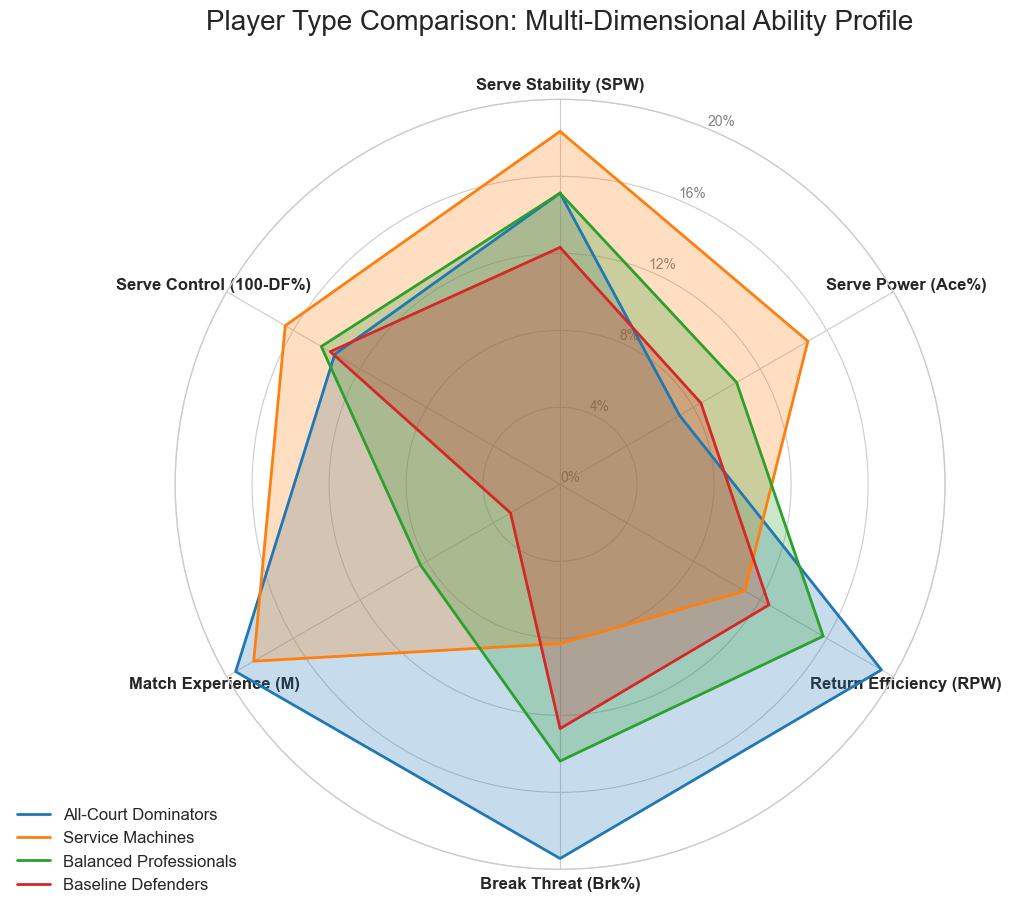

In [ ]:
# -----------------------------
# 3. 繪製雷達圖
# -----------------------------

def create_radar_chart(data, player_types, categories):
    """繪製多選手的雷達圖"""

    N = len(categories)
    # 設置每個軸的角度
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # 設定軸的標籤和方向
    ax.set_theta_zero_location("N") # 設定 0 度在上方
    ax.set_theta_direction(-1)      # 順時針繪製

    # 設定軸的標籤
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

    # 設定 Y 軸的標籤範圍 (0.0 到 1.0)
    ax.set_yticks(np.linspace(0, 1, 6))
    ax.set_yticklabels([f'{i*20:.0f}%' for i in np.linspace(0, 1, 6)], color="gray", size=10)
    ax.set_ylim(0, 1)

    # 繪製每個選手的線條
    for i, player_data in enumerate(data):
        # 數據要加上第一個點，讓圖形閉合
        values = list(player_data)
        values.append(values[0])

        # 繪製線條
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=player_types[i])
        # 填充顏色
        ax.fill(angles, values, alpha=0.25)

    # 設定圖表標題與圖例
    plt.title('Player Type Comparison: Multi-Dimensional Ability Profile', size=20, y=1.08)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    plt.show()

# 執行繪圖
create_radar_chart(plot_data, player_types, categories)

每個分群的平均標準化分數：
              Player Type       SPW      Ace%       RPW      Brk%         M  \
0    All-Court Dominators  0.689744  0.398930  0.823494  0.761446  0.829730   
1  Balanced Professionals  0.491289  0.344166  0.667285  0.566368  0.531532   
2      Baseline Defenders  0.413919  0.336898  0.580034  0.461704  0.235521   
3        Service Machines  0.657191  0.605673  0.422734  0.317793  0.509401   

   Control Score  
0       0.709459  
1       0.641026  
2       0.660714  
3       0.646298  


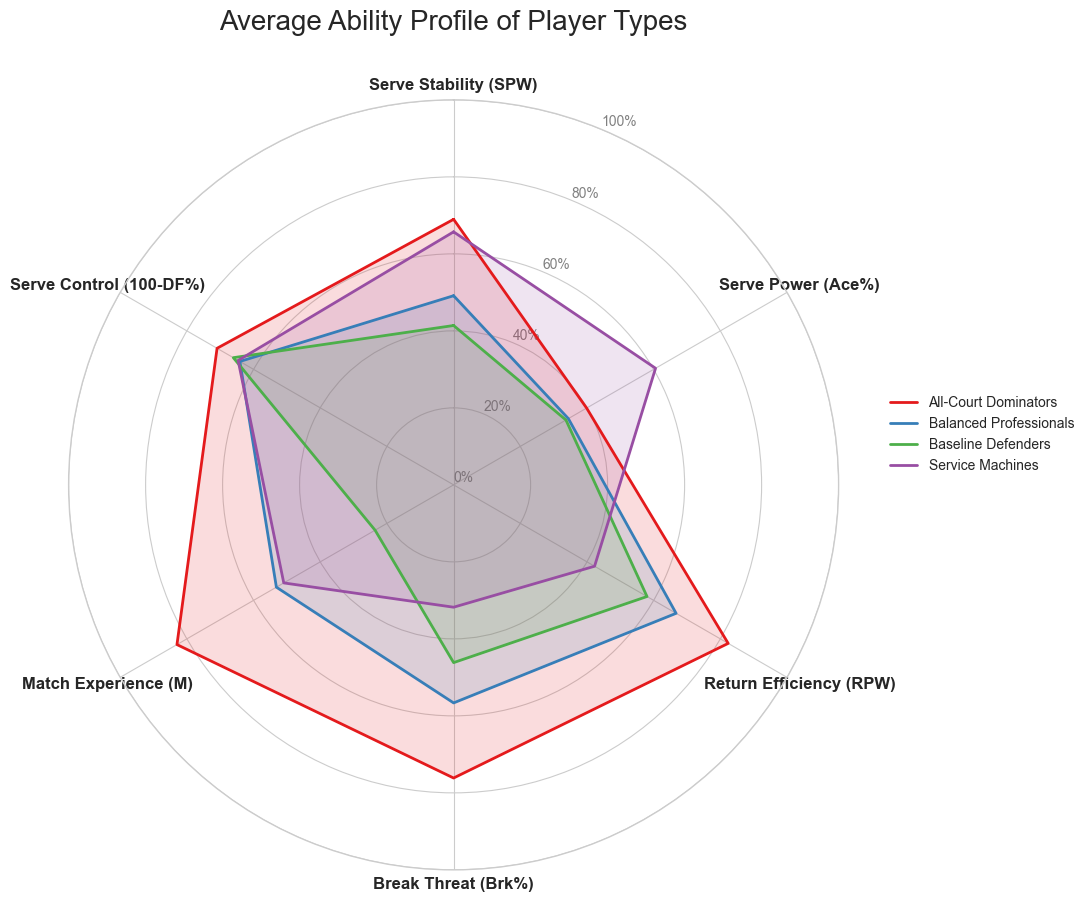

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# -----------------------------
# 1. 確保數據準備和標準化已完成 (與之前相同)
# -----------------------------
# 假設 df_scaled 已經存在，且包含了 'Player Type' 和所有標準化後的 features

# 最終用於標準化的特徵列表 (雷達圖的軸)
final_features = ['SPW', 'Ace%', 'RPW', 'Brk%', 'M', 'Control Score']
categories = [
    'Serve Stability (SPW)',
    'Serve Power (Ace%)',
    'Return Efficiency (RPW)',
    'Break Threat (Brk%)',
    'Match Experience (M)',
    'Serve Control (100-DF%)'
]

# -----------------------------
# 2. 計算每個群組的平均標準化分數
# -----------------------------
# 根據 'Player Type' 分組，並計算每個標準化特徵的平均值
group_averages = df_scaled.groupby('Player Type')[final_features].mean().reset_index()

# 將數據轉換成適合繪圖的格式
plot_data = group_averages[final_features].values.tolist()
player_types = group_averages['Player Type'].tolist()

print("每個分群的平均標準化分數：")
print(group_averages)


# -----------------------------
# 3. 繪製雷達圖 (使用你之前定義的函式，但略作簡化)
# -----------------------------
def create_group_radar_chart(data, player_types, categories):
    """繪製四個群組平均數值的雷達圖"""

    N = len(categories)
    # 設置每個軸的角度
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1] # 閉合圖形

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # 設定軸的標籤和方向
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    # 設定軸的標籤
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

    # 設定 Y 軸的標籤範圍 (0.0 到 1.0)
    ax.set_yticks(np.linspace(0, 1, 6))
    ax.set_yticklabels([f'{int(j*100)}%' for j in np.linspace(0, 1, 6)], color="gray", size=10)
    ax.set_ylim(0, 1)

    # 繪製每個群組的線條
    colors = sns.color_palette("Set1", len(player_types)) # 使用 Set1 調色板

    for i, player_type in enumerate(player_types):
        # 數據要加上第一個點，讓圖形閉合
        values = list(data[i])
        values.append(values[0])

        # 繪製線條
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=player_type, color=colors[i])
        # 填充顏色
        ax.fill(angles, values, color=colors[i], alpha=0.15)

    # 設定圖表標題與圖例
    plt.title('Average Ability Profile of Player Types', size=20, y=1.08)
    ax.legend(loc='lower left', bbox_to_anchor=(1.05, 0.5), fontsize=10) # 將圖例移到右下方
    plt.show()

# 執行繪圖
create_group_radar_chart(plot_data, player_types, categories)

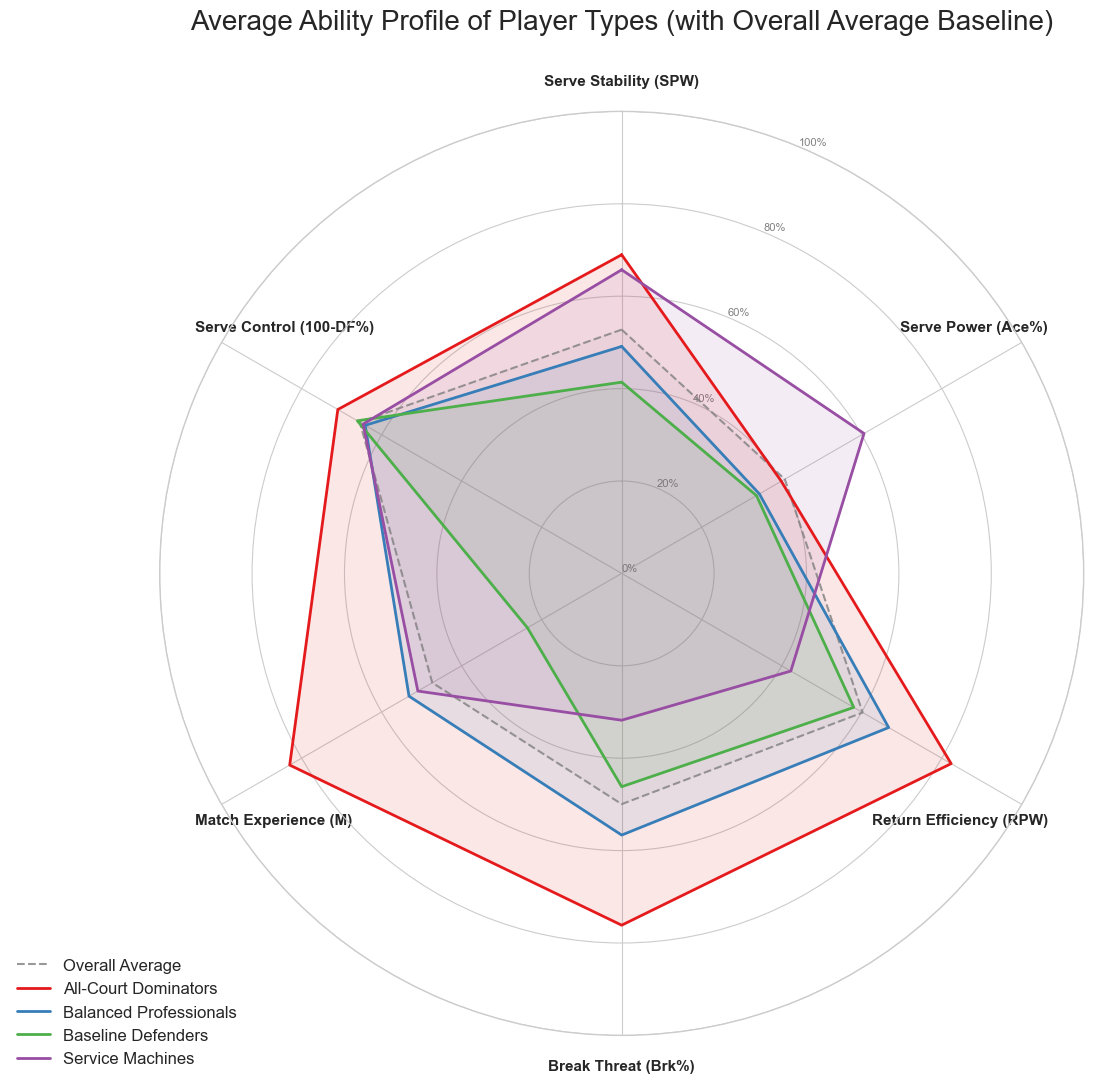

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 df_scaled 已經存在

# -----------------------------
# 1. 計算所有選手的整體平均標準化分數
# -----------------------------
# 這是 df_scaled 中所有數值型欄位的平均值
overall_avg_scores = df_scaled[final_features].mean().tolist()

def create_group_radar_chart_optimized(data, player_types, categories, overall_avg_scores):
    """
    繪製四個群組平均數值的雷達圖，並加入整體平均線作為基準。
    """

    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1] # 閉合圖形

    # 準備整體平均數據，用於閉合圖形
    avg_values = overall_avg_scores[:]
    avg_values.append(avg_values[0])

    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

    # --- 視覺設定 ---
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    # 設定 Y 軸範圍和標籤
    ax.set_yticks(np.linspace(0, 1, 6))
    ax.set_yticklabels([f'{int(j*100)}%' for j in np.linspace(0, 1, 6)], color="gray", size=8)
    ax.set_ylim(0, 1)

    # --- 繪製基準線 (整體平均) ---
    ax.plot(angles, avg_values, linewidth=1.5, linestyle='--', color='gray', label='Overall Average', alpha=0.8)
    ax.fill(angles, avg_values, color='gray', alpha=0.05) # 輕微填充

    # --- 繪製每個群組的線條 ---
    colors = sns.color_palette("Set1", len(player_types))

    for i, player_type in enumerate(player_types):
        values = list(data[i])
        values.append(values[0])

        # 繪製線條 (保持原線條粗細)
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=player_type, color=colors[i])
        # 填充顏色 (略微降低透明度，防止遮擋基準線)
        ax.fill(angles, values, color=colors[i], alpha=0.10)

    # --- 設置 X 軸標籤 (關鍵優化：旋轉標籤) ---
    ax.set_xticks(angles[:-1])
    # 這裡使用 radians to degrees 換算，並給予 rotation 角度
    ax.set_xticklabels(categories, fontsize=11, fontweight='bold')

    # 手動調整標籤位置和旋轉角度，讓它們貼合圓周
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi): # 頂部和底部標籤不旋轉
            label.set_ha('center')
        elif 0 < angle < np.pi: # 左側標籤右對齊
            label.set_ha('right')
        else: # 右側標籤左對齊
            label.set_ha('left')

        # 調整標籤的旋轉角度
        angle_in_degrees = angle * 180 / np.pi
        ax.tick_params(axis='x', pad=15) # 增加標籤和圖表之間的間距

    # 設定圖表標題與圖例
    plt.title('Average Ability Profile of Player Types (with Overall Average Baseline)', size=20, y=1.08)
    ax.legend(loc='best', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    plt.show()

# -----------------------------
# 3. 執行繪圖
# -----------------------------
# 假設你已經有了 plot_data, player_types 和 categories 變數
create_group_radar_chart_optimized(plot_data, player_types, categories, overall_avg_scores)

標準化後的數據前五行：
        SPW      Ace%       RPW      Brk%         M  Control Score  \
0  0.756410  0.358289  0.963855  0.971888  0.972973       0.675676   
1  1.000000  0.438503  1.000000  1.000000  0.756757       0.878378   
2  0.769231  0.486631  0.686747  0.578313  1.000000       0.797297   
3  0.871795  0.513369  0.801205  0.742972  0.567568       0.810811   
4  0.788462  0.679144  0.626506  0.437751  0.891892       0.608108   

                        Player           Player Type  Rk  M W%  
0         Carlos Alcaraz [ESP]  All-Court Dominators   1  88.8  
1          Jannik Sinner [ITA]  All-Court Dominators   2  90.6  
2       Alexander Zverev [GER]  All-Court Dominators   3  69.5  
3         Novak Djokovic [SRB]  All-Court Dominators   4  78.0  
4  Felix Auger Aliassime [CAN]  All-Court Dominators   5  67.6  


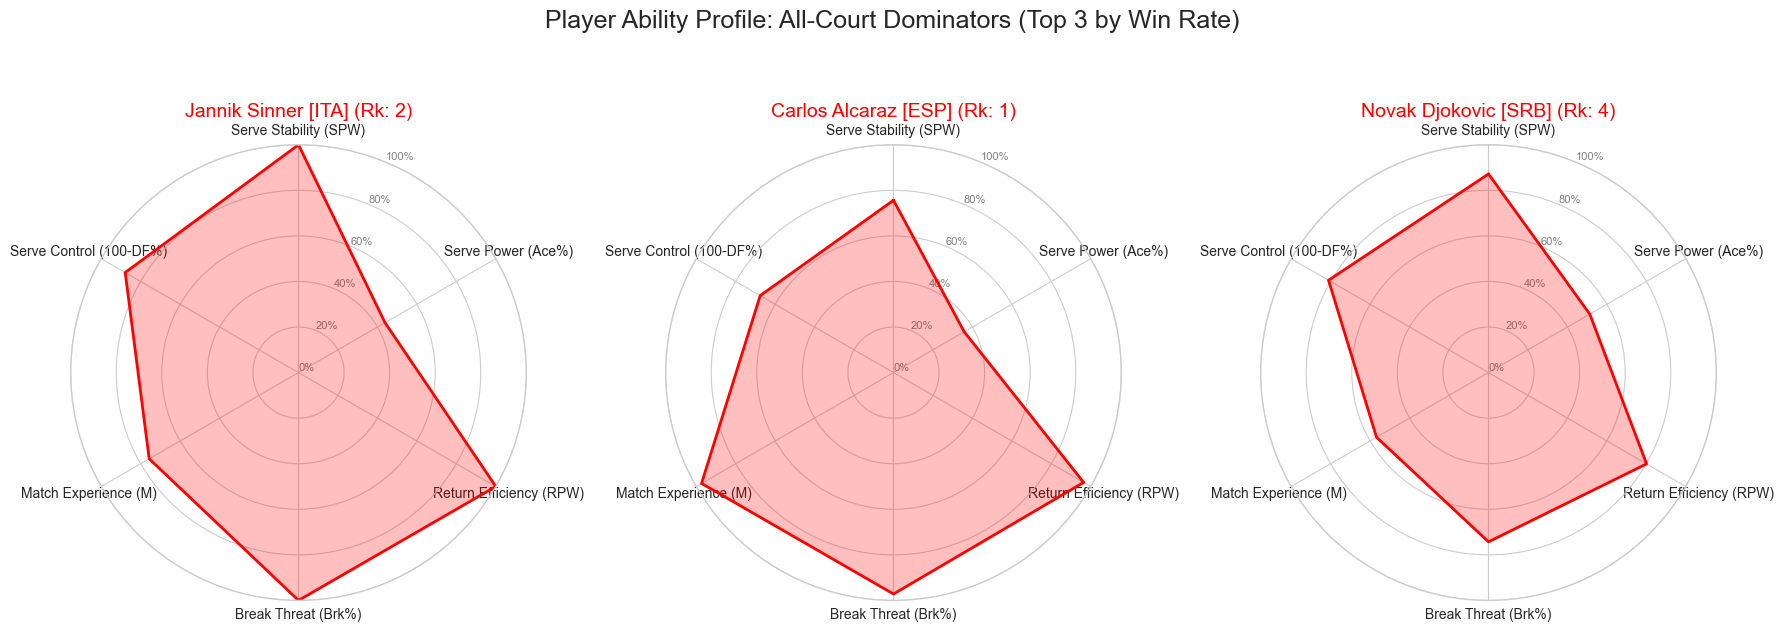

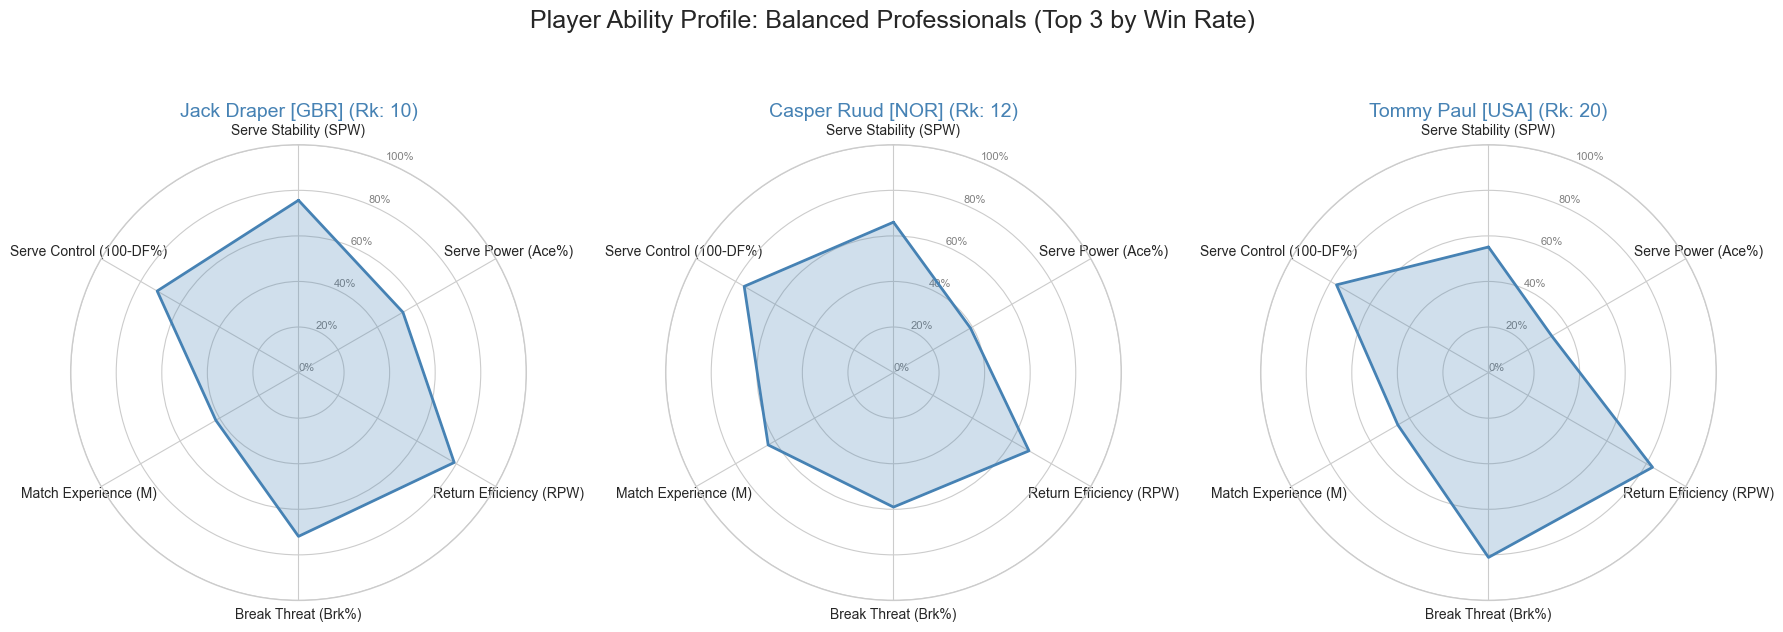

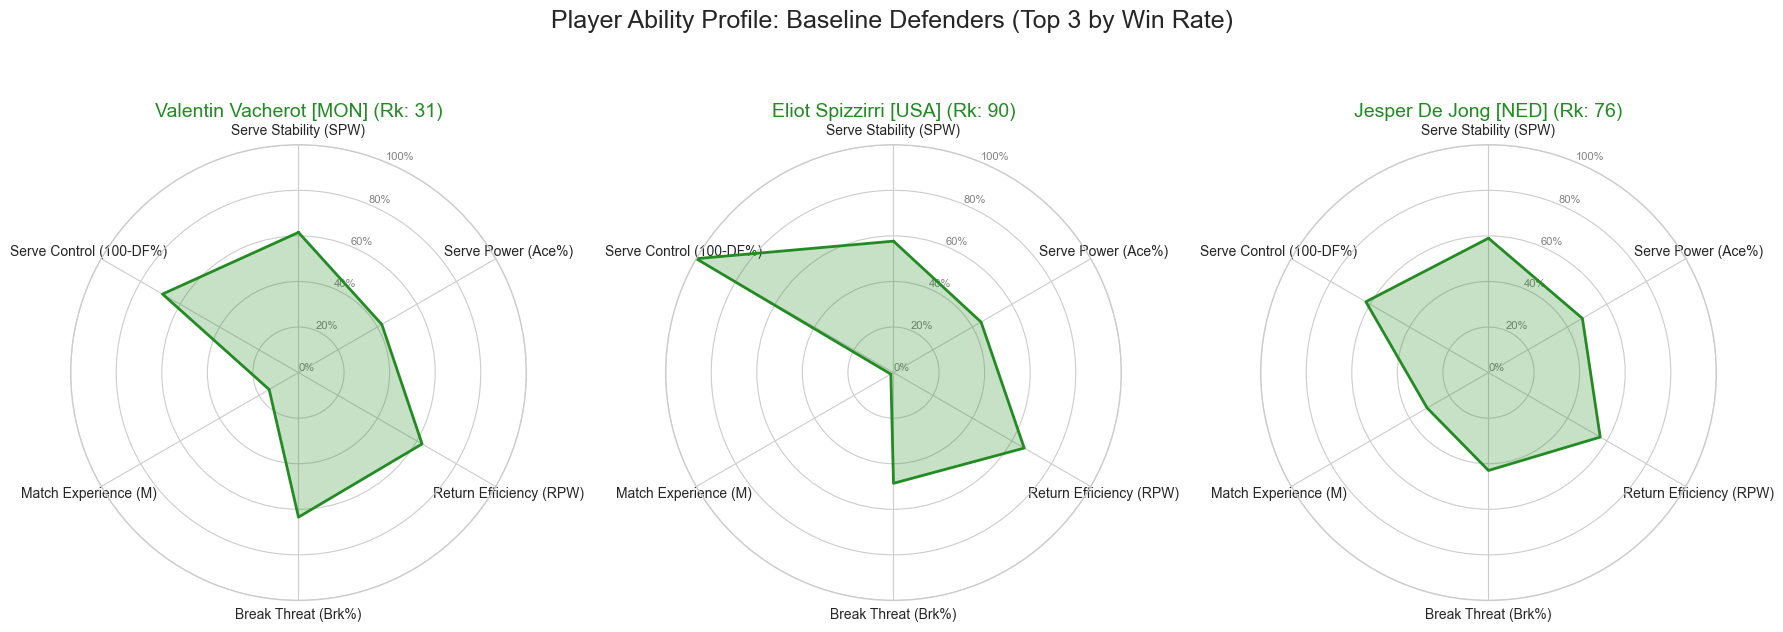

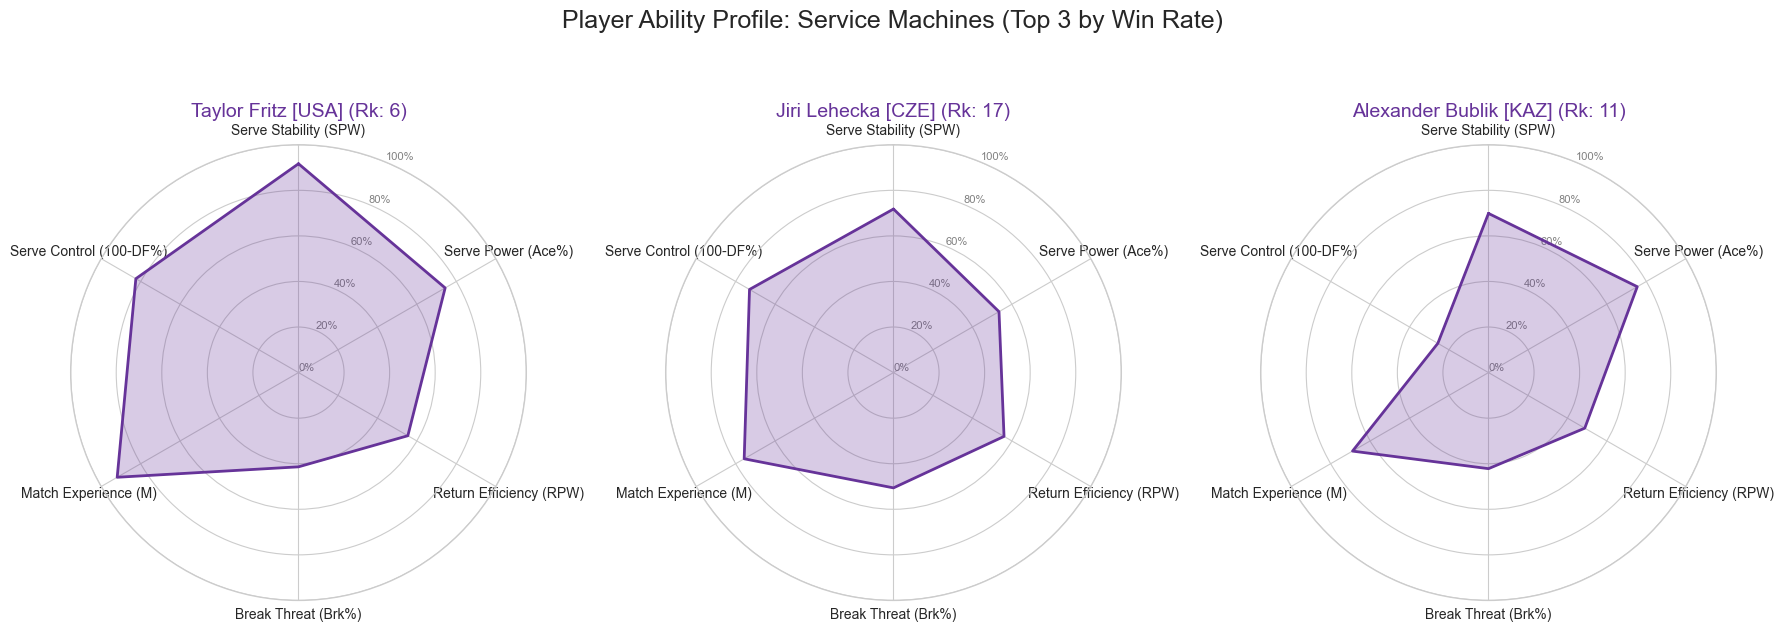

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # 為了配色方案

# 假設 df 已經載入並包含所有原始數據，且 Player Type 已經存在
# -----------------------------
# 1. 定義雷達圖所需的核心特徵與數據準備 (與之前相同)
# -----------------------------
radar_features = ['SPW', 'Ace%', 'DF%', 'RPW', 'Brk%', 'M']

for col in radar_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', ''), errors='coerce')
    else:
        print(f"警告: 原始 DataFrame 中缺少欄位 '{col}'，請檢查。")

df_radar = df.copy().dropna(subset=radar_features + ['Player Type', 'Rk', 'Player'])

df_radar['Control Score'] = 100 - df_radar['DF%']

final_features = ['SPW', 'Ace%', 'RPW', 'Brk%', 'M', 'Control Score']

scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(df_radar[final_features])

df_scaled = pd.DataFrame(standardized_data, columns=final_features)
df_scaled['Player'] = df_radar['Player'].values
df_scaled['Player Type'] = df_radar['Player Type'].values
df_scaled['Rk'] = df_radar['Rk'].values
df_scaled['M W%'] = df_radar['M W%'].values

print("標準化後的數據前五行：")
print(df_scaled.head())

# -----------------------------
# 2. 選定每個分類中勝率最高的 TOP 3 選手 (與之前相同)
# -----------------------------
top_3_players_by_type = df_scaled.groupby('Player Type').apply(
    lambda x: x.nlargest(3, 'M W%')
).reset_index(drop=True)

# -----------------------------
# 3. 定義群組的統一顏色映射 (參考平均數值雷達圖的顏色)
# -----------------------------
# 這裡根據你提供的平均雷達圖，手動定義每個 Player Type 的顏色
# 確保這個順序和你的 `player_types` 列表順序一致，或使用字典
player_type_colors = {
    'All-Court Dominators': 'red',       # 平均圖中的紅色
    'Balanced Professionals': 'steelblue', # 平均圖中的藍色
    'Baseline Defenders': 'forestgreen', # 平均圖中的綠色
    'Service Machines': 'rebeccapurple' # 平均圖中的紫色
}

# -----------------------------
# 4. 修正繪圖函式，繪製並列雷達圖 (使用統一顏色)
# -----------------------------
def create_multi_radar_charts_themed(df_players, categories, player_type_name, player_count=3, color_map={}):
    """
    為指定分類的選手繪製並列雷達圖，並使用統一顏色主題。

    參數:
    df_players (pd.DataFrame): 包含要繪製選手的數據（已標準化）。
    categories (list): 雷達圖的軸標籤列表。
    player_type_name (str): 當前繪製的選手類型名稱。
    player_count (int): 每個類別要繪製的選手數量。
    color_map (dict): 儲存 Player Type 到顏色的映射字典。
    """
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # 獲取當前選手類型的統一顏色
    current_type_color = color_map.get(player_type_name, 'gray') # 如果沒有找到則默認灰色

    fig, axes = plt.subplots(1, player_count, figsize=(player_count * 6, 6), subplot_kw=dict(polar=True))

    if player_count == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        if i >= len(df_players):
            ax.set_visible(False)
            continue

        player_data = df_players.iloc[i]

        values = player_data[final_features].tolist()
        values.append(values[0])

        # --- 修正處：使用統一顏色 ---
        ax.plot(angles, values, linewidth=2, linestyle='solid', color=current_type_color)
        ax.fill(angles, values, color=current_type_color, alpha=0.25)

        ax.set_theta_zero_location("N")
        ax.set_theta_direction(-1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=10)

        ax.set_yticks(np.linspace(0, 1, 6))
        ax.set_yticklabels([f'{int(j*100)}%' for j in np.linspace(0, 1, 6)], color="gray", size=8)
        ax.set_ylim(0, 1)

        player_name = player_data['Player']
        player_rank = int(player_data['Rk'])
        ax.set_title(f"{player_name} (Rk: {player_rank})", fontsize=14, pad=20, color=current_type_color) # 標題也用該顏色

    fig.suptitle(f'Player Ability Profile: {player_type_name} (Top {player_count} by Win Rate)', fontsize=18, y=1.05)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# -----------------------------
# 5. 為每個分類繪製圖表 (呼叫新函式)
# -----------------------------
categories_radar_labels = [
    'Serve Stability (SPW)',
    'Serve Power (Ace%)',
    'Return Efficiency (RPW)',
    'Break Threat (Brk%)',
    'Match Experience (M)',
    'Serve Control (100-DF%)'
]

for player_type in top_3_players_by_type['Player Type'].unique():
    df_players_in_type = top_3_players_by_type[top_3_players_by_type['Player Type'] == player_type]
    create_multi_radar_charts_themed(
        df_players_in_type,
        categories_radar_labels,
        player_type,
        player_count=3,
        color_map=player_type_colors # 傳入顏色映射
    )

## DIG 是否發球得分率高到一個程度之後，勝率就會大幅提升?

In [ ]:
# -----------------------------
# 1. 確保相關欄位是數值型
# -----------------------------
df['SPW'] = pd.to_numeric(df['SPW'].astype(str).str.replace('%', ''), errors='coerce')
df['M W%'] = pd.to_numeric(df['M W%'].astype(str).str.replace('%', ''), errors='coerce')
df['M'] = pd.to_numeric(df['M'], errors='coerce')

# 篩選出比賽場數超過一定門檻的選手，確保數據代表性
min_matches = 20
df_filtered = df[df['M'] >= min_matches].dropna(subset=['SPW', 'M W%'])

# -----------------------------
# 2. 數據分箱
# -----------------------------
# 定義 SPW 的區間
spw_bins = list(range(50, 77, 3))  # 從 50% 到 74%，每 2% 一個區間
spw_labels = [f'{i}-{i+2}%' for i in spw_bins[:-1]]

# 使用 pd.cut() 函數將 SPW 數據分箱
df_filtered['SPW Group'] = pd.cut(df_filtered['SPW'], bins=spw_bins, labels=spw_labels, right=False)

# -----------------------------
# 3. 計算每個分組的平均勝率
# -----------------------------
spw_win_rate = df_filtered.groupby('SPW Group', observed=True)['M W%'].mean().reset_index()
spw_count = df_filtered.groupby('SPW Group', observed=True).size().reset_index(name='Count')
spw_win_rate = pd.merge(spw_win_rate, spw_count, on='SPW Group')

print("每個 SPW 區間的平均勝率：")
print(spw_win_rate)

每個 SPW 區間的平均勝率：
  SPW Group       M W%  Count
0    56-58%  36.500000      3
1    59-61%  43.828571      7
2    62-64%  48.897619     42
3    65-67%  58.796552     29
4    68-70%  61.512500      8
5    71-73%  90.600000      1


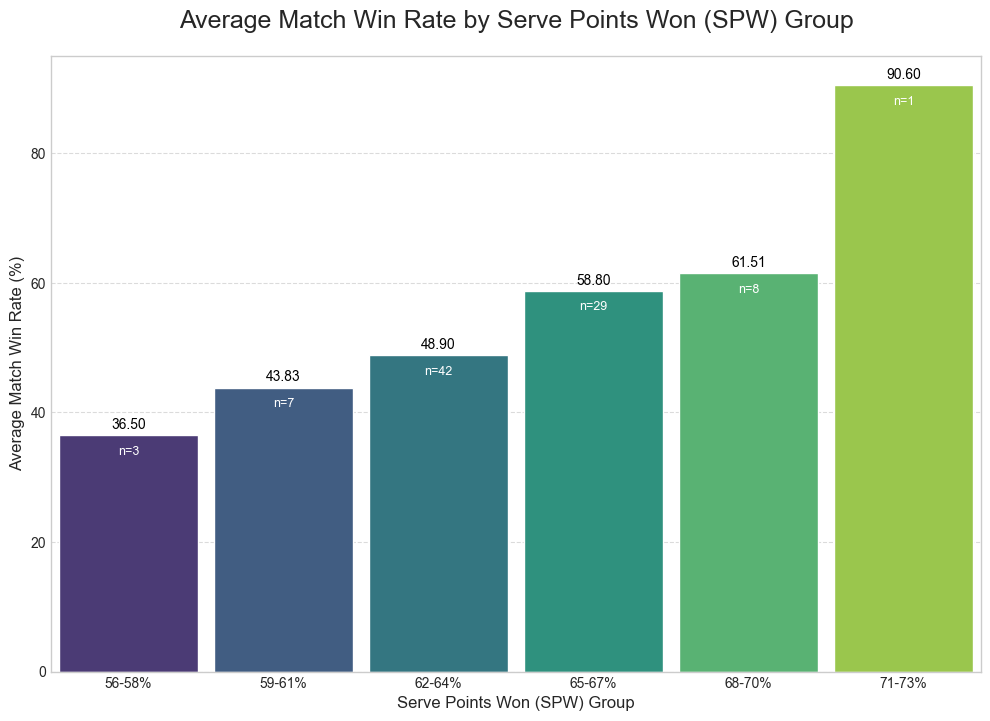

In [ ]:
# -----------------------------
# 繪製條形圖
# -----------------------------
plt.figure(figsize=(12, 8))

spw_win_rate['SPW Group'] = pd.Categorical(
    spw_win_rate['SPW Group'],
    categories=spw_win_rate['SPW Group'].tolist(),
    ordered=True
)

# 繪製條形圖，X軸為SPW分組，Y軸為平均勝率
barplot = sns.barplot(
    x='SPW Group',
    y='M W%',
    data=spw_win_rate,
    hue='SPW Group',
    palette='viridis',
    width=0.9
)

# barplot = sns.barplot(x='SPW Group', y='M W%', data=spw_win_rate, hue='SPW Group', palette='viridis', legend=False)

# -----------------------------
# 加上數據標籤
# -----------------------------
for index, row in spw_win_rate.iterrows():
    barplot.text(index, row['M W%'] + 1, f'{row["M W%"]:.2f}', color='black', ha='center', fontsize=10)
    barplot.text(index, row['M W%'] - 3, f'n={row["Count"]}', color='white', ha="center", fontsize=9)

# -----------------------------
# 設定圖表標題與座標軸標籤
# -----------------------------
plt.title('Average Match Win Rate by Serve Points Won (SPW) Group', fontsize=18, pad=20)
plt.xlabel('Serve Points Won (SPW) Group', fontsize=12)
plt.ylabel('Average Match Win Rate (%)', fontsize=12)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7) # 添加水平網格線

plt.show()


1.  **穩步上升的趨勢**：在 `58-60%` 到 `61-63%` 的區間內，隨著 `SPW` 的提升，選手的平均勝率呈現穩定的上升趨勢。這證實了在發球局的得分能力越強，贏得比賽的可能性就越高的基本假設。

2.  **重要的「臨界點」**：在 `67-69%` 的區間，圖表出現了顯著的跳躍。該區間的平均勝率達到 **64.54%**，比前一個區間增加了約 **9%**。這是一個關鍵的洞見：當在發球局的得分率超過 **66%** 時，選手的勝率會進入一個更高的層次。

3.  **頂尖選手的統治力**：在 `67-69%` 和 `70-72%` 的區間，平均勝率持續攀升。特別值得注意的是，`70-72%` 的區間雖然只有三名選手（`n=3`），但他們的平均勝率高達 **69.67%**。

 **結論**

這張圖表的核心價值在於，它將抽象的數據關聯性轉化為一個具體且可執行的目標。對於選手和教練來說，數據顯示 **66%** 是一個重要的「魔法數字」。如果一位選手在發球局的得分能力得分率能夠從 66% 以下提升到 66% 以上，將會對其比賽勝率帶來巨大的正面影響。


## DIG 接發球得分率到什麼程度之後就會大幅影響勝率?

In [ ]:
# -----------------------------
# 1. 確保相關欄位是數值型
# -----------------------------
df['RPW'] = pd.to_numeric(df['RPW'].astype(str).str.replace('%', ''), errors='coerce')
df['M W%'] = pd.to_numeric(df['M W%'].astype(str).str.replace('%', ''), errors='coerce')
df['M'] = pd.to_numeric(df['M'], errors='coerce')

# 篩選出比賽場數超過一定門檻的選手，確保數據代表性
min_matches = 20
df_filtered = df[df['M'] >= min_matches].dropna(subset=['RPW', 'M W%'])

# -----------------------------
# 2. 數據分箱
# -----------------------------
# 定義 SPW 的區間
rpw_bins = list(range(24, 50, 4))  # 從 50% 到 74%，每 2% 一個區間
rpw_labels = [f'{i}-{i+3}%' for i in rpw_bins[:-1]]

# 使用 pd.cut() 函數將 SPW 數據分箱
df_filtered['RPW Group'] = pd.cut(df_filtered['RPW'], bins=rpw_bins, labels=rpw_labels, right=False)

# -----------------------------
# 3. 計算每個分組的平均勝率
# -----------------------------
rpw_win_rate = df_filtered.groupby('RPW Group', observed=True)['M W%'].mean().reset_index()
rpw_count = df_filtered.groupby('RPW Group', observed=True).size().reset_index(name='Count')
rpw_win_rate = pd.merge(rpw_win_rate, rpw_count, on='RPW Group')

print("每個 RPW 區間的平均勝率：")
print(rpw_win_rate)

每個 RPW 區間的平均勝率：
  RPW Group       M W%  Count
0    24-27%  42.200000      1
1    28-31%  42.650000      4
2    32-35%  49.151282     39
3    36-39%  55.733333     39
4    40-43%  64.928571      7


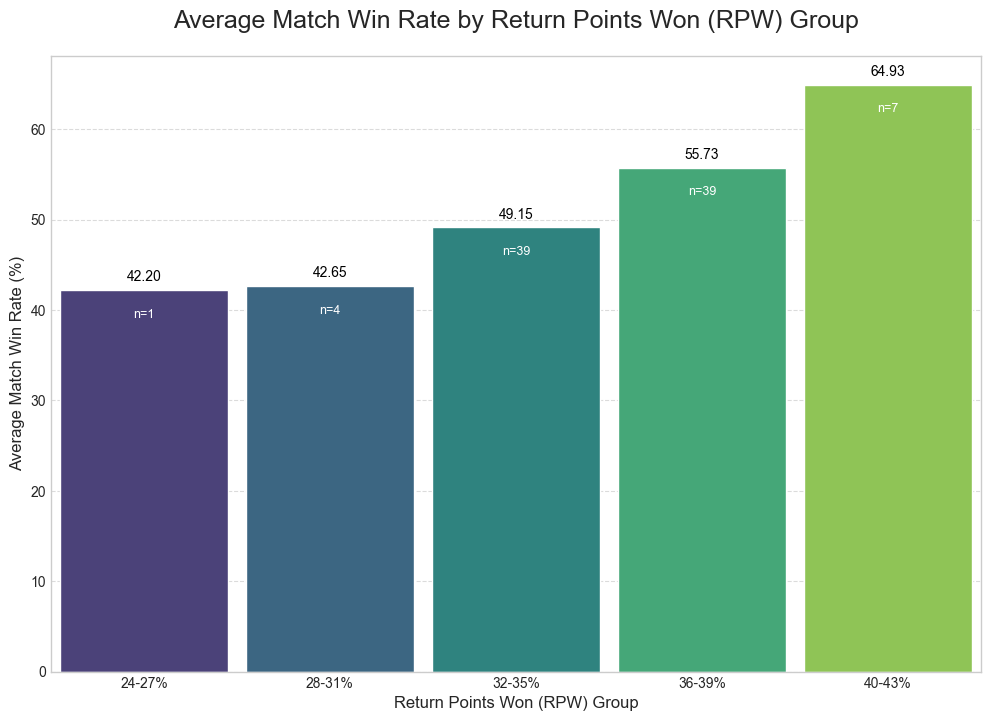

In [ ]:
# -----------------------------
# 繪製條形圖
# -----------------------------
plt.figure(figsize=(12, 8))

rpw_win_rate['RPW Group'] = pd.Categorical(
    rpw_win_rate['RPW Group'],
    categories=rpw_win_rate['RPW Group'].tolist(),
    ordered=True
)

# 繪製條形圖，X軸為SPW分組，Y軸為平均勝率
barplot = sns.barplot(
    x='RPW Group',
    y='M W%',
    data=rpw_win_rate,
    hue='RPW Group',
    palette='viridis',
    width=0.9
)

# -----------------------------
# 加上數據標籤
# -----------------------------
for index, row in rpw_win_rate.iterrows():
    barplot.text(index, row['M W%'] + 1, f'{row["M W%"]:.2f}', color='black', ha='center', fontsize=10)
    barplot.text(index, row['M W%'] - 3, f'n={row["Count"]}', color='white', ha="center", fontsize=9)

# -----------------------------
# 設定圖表標題與座標軸標籤
# -----------------------------
plt.title('Average Match Win Rate by Return Points Won (RPW) Group', fontsize=18, pad=20)
plt.xlabel('Return Points Won (RPW) Group', fontsize=12)
plt.ylabel('Average Match Win Rate (%)', fontsize=12)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7) # 添加水平網格線

plt.show()

## DIG 選手的一發和二發能力，對其整體發球表現的貢獻，是否存在顯著差異？

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# -----------------------------
# 1. 確保所有相關欄位都是數值型
# -----------------------------
df['SPW'] = pd.to_numeric(df['SPW'].astype(str).str.replace('%', ''), errors='coerce')
df['1st%'] = pd.to_numeric(df['1st%'].astype(str).str.replace('%', ''), errors='coerce')
df['2nd%'] = pd.to_numeric(df['2nd%'].astype(str).str.replace('%', ''), errors='coerce')
df['M'] = pd.to_numeric(df['M'], errors='coerce')

# 篩選掉比賽場數過少的選手
min_matches = 20
df_filtered = df[df['M'] >= min_matches].dropna(subset=['SPW', '1st%', '2nd%'])

# -----------------------------
# 2. 建立多元線性迴歸模型
# -----------------------------

# 公式為：因變數 ~ 自變數1 + 自變數2
model_formula = 'SPW ~ Q("1st%") + Q("2nd%")'
model = smf.ols(formula=model_formula, data=df_filtered)

# 擬合模型
results = model.fit()

# -----------------------------
# 3. 輸出模型摘要
# -----------------------------
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPW   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     648.8
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           5.28e-53
Time:                        22:10:00   Log-Likelihood:                -93.320
No. Observations:                  90   AIC:                             192.6
Df Residuals:                      87   BIC:                             200.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7257      1.805      0.402      0.6


**模型表現**

* **R-squared：** R平方值高達 **0.941**，這是一個非常優秀的數字。這表示我們的模型，僅用一發得分率 (`1st%`) 和二發得分率 (`2nd%`) 這兩個變數，就能解釋總發球得分率 (`SPW`) **94.1% 的變異**。這是一個解釋力極強的模型。

**核心發現：一發 vs. 二發**

| 變數       | 係數 (`coef`) | P值 (`P>|t|`) |

| :------------ | :------ | :------ |

| **`Q("1st%")`** | **0.5771** | **0.000** |

| **`Q("2nd%")`** | **0.4461** | **0.000** |


* **係數 (`coef`)**：係數代表了自變數每增加 1 單位，對因變數所帶來的影響。
    * 選手的**一發得分率 (`1st%`) 每提高 1%**，其總發球得分率 (`SPW`) 預期會**增加 0.5771%**。
    * 選手的**二發得分率 (`2nd%`) 每提高 1%**，其總發球得分率 (`SPW`) 預期會**增加 0.4461%**。
* **統計顯著性 (`P值`)**：兩個變數的 P值都為 **0.000**，遠低於 0.05 的標準顯著水準。這證明一發和二發對 `SPW` 的影響都**具有統計學上的顯著性**。

---

**結論與策略應用**

模型結果清晰地顯示，在影響總發球表現上，**提高一發得分率的貢獻大於提高二發得分率**。具體來說，一發的影響力是二發的 **1.3 倍** (0.5771 / 0.4461 ≈ 1.29)。

這為教練和選手提供了至關重要的策略洞見：
* **優先發展一發**：數據表明，將訓練重心放在提升一發的效率，將能為選手帶來最大的發球表現回報。
* **量化訓練目標**：儘管一發和二發都重要，但這個模型量化了它們的相對貢獻，讓訓練規劃可以更加精準。例如，與其平均分配訓練時間，不如將更多的精力放在提升一發的準度和力量上。


In [ ]:
# 確保相關欄位是數值型
df['1st%'] = pd.to_numeric(df['1st%'].astype(str).str.replace('%', ''), errors='coerce')
df['2nd%'] = pd.to_numeric(df['2nd%'].astype(str).str.replace('%', ''), errors='coerce')
df['M'] = pd.to_numeric(df['M'], errors='coerce')

# 篩選掉比賽場數過少的選手
min_matches = 20
df_filtered = df[df['M'] >= min_matches].dropna(subset=['1st%', '2nd%'])

# -----------------------------
# 1. 定義迴歸模型的係數
# -----------------------------
# 根據我們之前的迴歸分析結果
coef_1st = 0.5771
coef_2nd = 0.4461

# -----------------------------
# 2. 計算發球能力綜合評分
# -----------------------------
# 使用加權平均的方式計算評分
df_filtered['Serve Rating'] = (df_filtered['1st%'] * coef_1st) + (df_filtered['2nd%'] * coef_2nd)

# -----------------------------
# 3. 輸出結果：排名最高的選手與發球評分
# -----------------------------
# 按發球評分降序排列，顯示排名前 15 的選手
top_rated_servers = df_filtered.sort_values(by='Serve Rating', ascending=False).head(15)

print("發球能力綜合評分最高的選手 (前15名)：")
print(top_rated_servers[['Rk', 'Player', '1st%', '2nd%', 'SPW', 'Serve Rating']])


發球能力綜合評分最高的選手 (前15名)：
    Rk                            Player  1st%  2nd%   SPW  Serve Rating
1    2               Jannik Sinner [ITA]  79.4  59.1  71.7      72.18625
5    6                Taylor Fritz [USA]  79.4  54.5  70.4      70.13419
3    4              Novak Djokovic [SRB]  76.7  55.7  69.7      69.11134
57  58  Giovanni Mpetshi Perricard [FRA]  78.2  53.0  69.9      68.77252
49  50               Reilly Opelka [USA]  79.0  51.3  68.7      68.47583
72  73              Hubert Hurkacz [POL]  77.5  52.9  68.8      68.32394
0    1              Carlos Alcaraz [ESP]  74.0  56.8  67.9      68.04388
9   10                 Jack Draper [GBR]  75.6  54.7  67.9      68.03043
6    7              Alex De Minaur [AUS]  73.4  57.2  66.2      67.87606
33  34          Stefanos Tsitsipas [GRE]  76.4  53.2  66.9      67.82296
8    9                 Ben Shelton [USA]  75.3  54.6  67.9      67.81269
55  56           Matteo Berrettini [ITA]  75.9  53.6  68.8      67.71285
16  17                Jiri Le

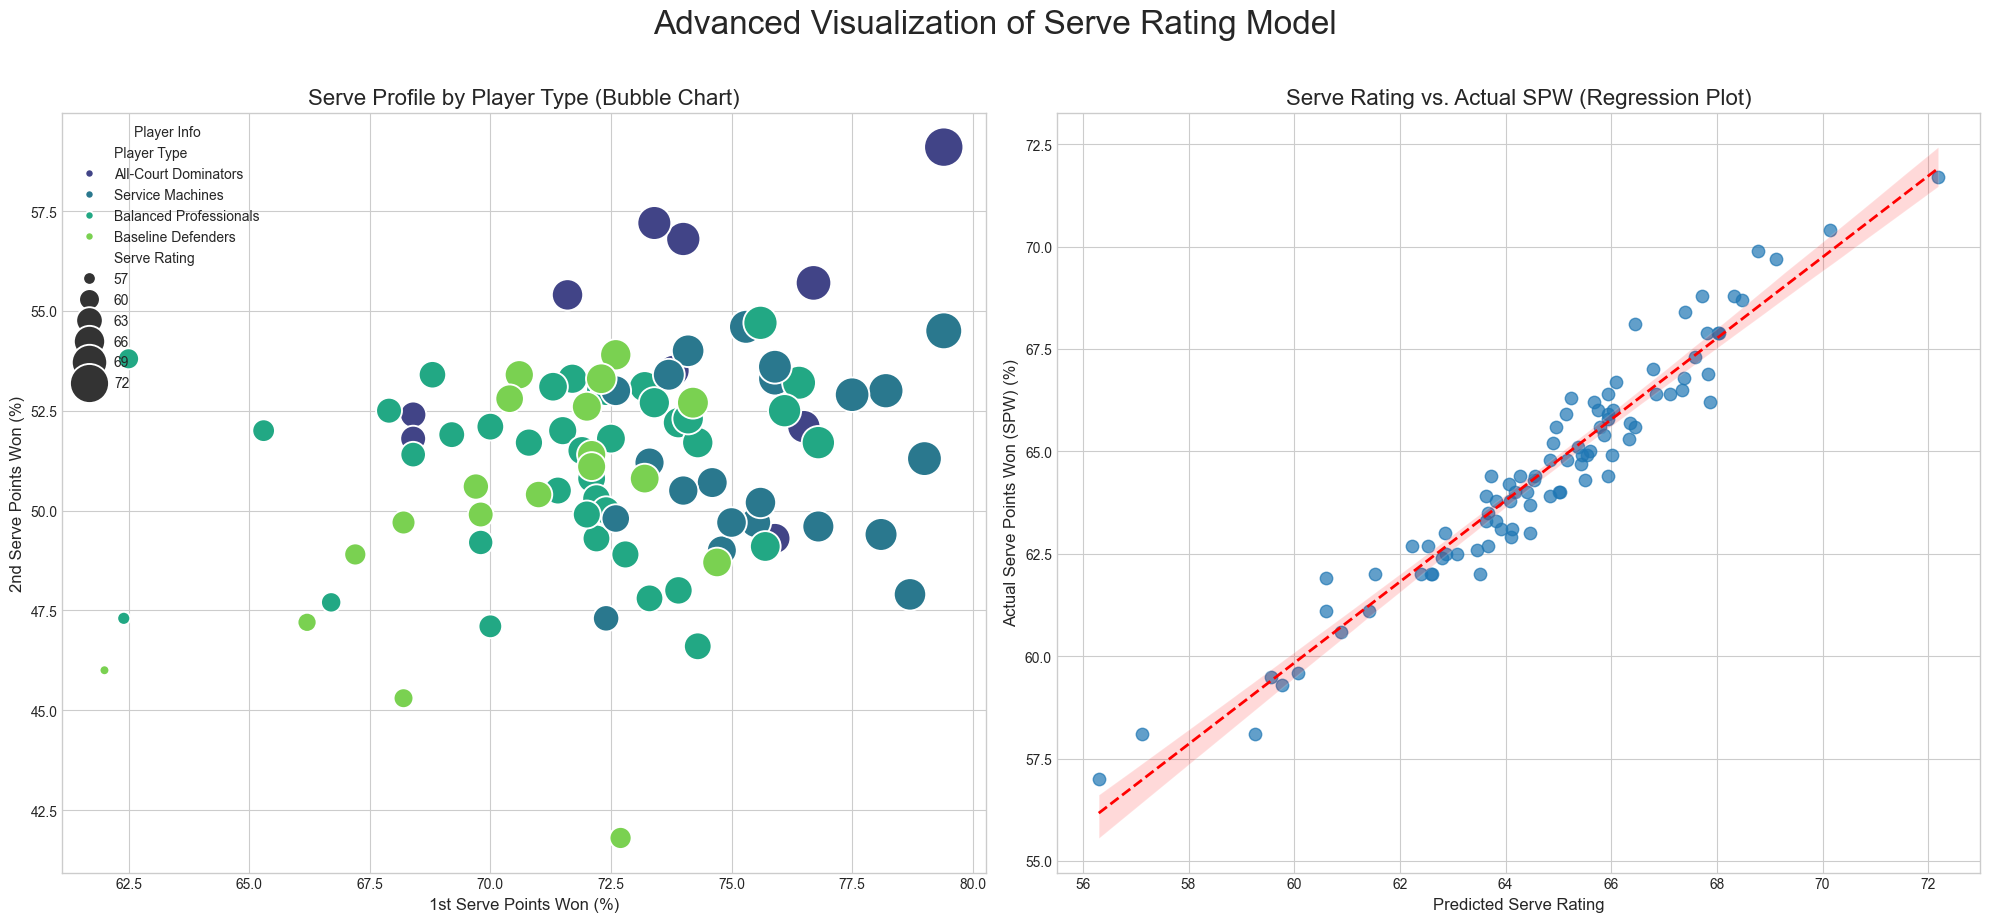

In [ ]:
# -----------------------------
# 1. 確保相關欄位是數值型並篩選數據
# -----------------------------

df['SPW'] = pd.to_numeric(df['SPW'].astype(str).str.replace('%', ''), errors='coerce')
df['1st%'] = pd.to_numeric(df['1st%'].astype(str).str.replace('%', ''), errors='coerce')
df['2nd%'] = pd.to_numeric(df['2nd%'].astype(str).str.replace('%', ''), errors='coerce')
df['M'] = pd.to_numeric(df['M'], errors='coerce')
min_matches = 20
df_filtered = df[df['M'] >= min_matches].dropna(subset=['SPW', '1st%', '2nd%', 'Player Type'])

# 'Serve Rating'
coef_1st = 0.5771
coef_2nd = 0.4461
df_filtered['Serve Rating'] = (df_filtered['1st%'] * coef_1st) + (df_filtered['2nd%'] * coef_2nd)

# -----------------------------
# 2. 建立畫布與兩張子圖
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle('Advanced Visualization of Serve Rating Model', fontsize=24, y=1.02)


# --- 子圖 1: 氣泡圖 ---
sns.scatterplot(
    x='1st%',
    y='2nd%',
    hue='Player Type',
    size='Serve Rating',
    sizes=(50, 800), # 設定氣泡大小範圍
    data=df_filtered,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Serve Profile by Player Type (Bubble Chart)', fontsize=16)
axes[0].set_xlabel('1st Serve Points Won (%)', fontsize=12)
axes[0].set_ylabel('2nd Serve Points Won (%)', fontsize=12)
axes[0].legend(title='Player Info', fontsize=10)


# --- 子圖 2: 帶迴歸線的散點圖 ---
sns.regplot(
    x='Serve Rating',
    y='SPW',
    data=df_filtered,
    ax=axes[1],
    scatter_kws={'s': 80, 'alpha': 0.7}, # 設定散點大小和透明度
    line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2} # 設定迴歸線樣式
)
axes[1].set_title('Serve Rating vs. Actual SPW (Regression Plot)', fontsize=16)
axes[1].set_xlabel('Predicted Serve Rating', fontsize=12)
axes[1].set_ylabel('Actual Serve Points Won (SPW) (%)', fontsize=12)


# 調整佈局
plt.tight_layout()
plt.show()